# Pupil vs Training session Figure 3a

Charlie median pupil size for days [1, 2, 3, 4, 5, 6, 7, 8, 9] is [0.80777074 0.82133847 0.55621956 0.81846165 0.78829806 0.78038397
 0.8154735  0.75455869 0.59155929]
Conner median pupil size for days [1, 2, 3, 4, 5, 6, 7, 8, 9] is [0.87138968 0.80504307 0.75833004 0.76486095 0.76393218 0.67481588
 0.68723547 0.78996925 0.68020208]
Clive median pupil size for days [1, 2, 3, 4, 5, 6, 7, 8, 9] is [0.82798575 0.76127393 0.74514209 0.78286993 0.79891176 0.8346297
 0.72563813 0.78579838 0.83215815]
Cole median pupil size for days [1, 2, 3, 4, 5, 6, 7, 8, 9] is [0.78013669 0.78133917 0.74756229 0.69802809 0.75615571 0.7724834
 0.72743536 0.81221647 0.74170883]
Cooper median pupil size for days [1, 2, 3, 4, 5, 6, 7, 8, 9] is [0.79410082 0.80442515 0.77724837 0.73961767 0.74424294 0.75453969
 0.76099892 0.71282804 0.81062644]
Calvin median pupil size for days [1, 2, 3, 4, 5, 6, 7, 8, 9] is [0.72315345 0.80520508 0.80714588 0.7088654  0.80324675 0.80768914
 0.78296736 0.73016594 0.57671775]
Ch

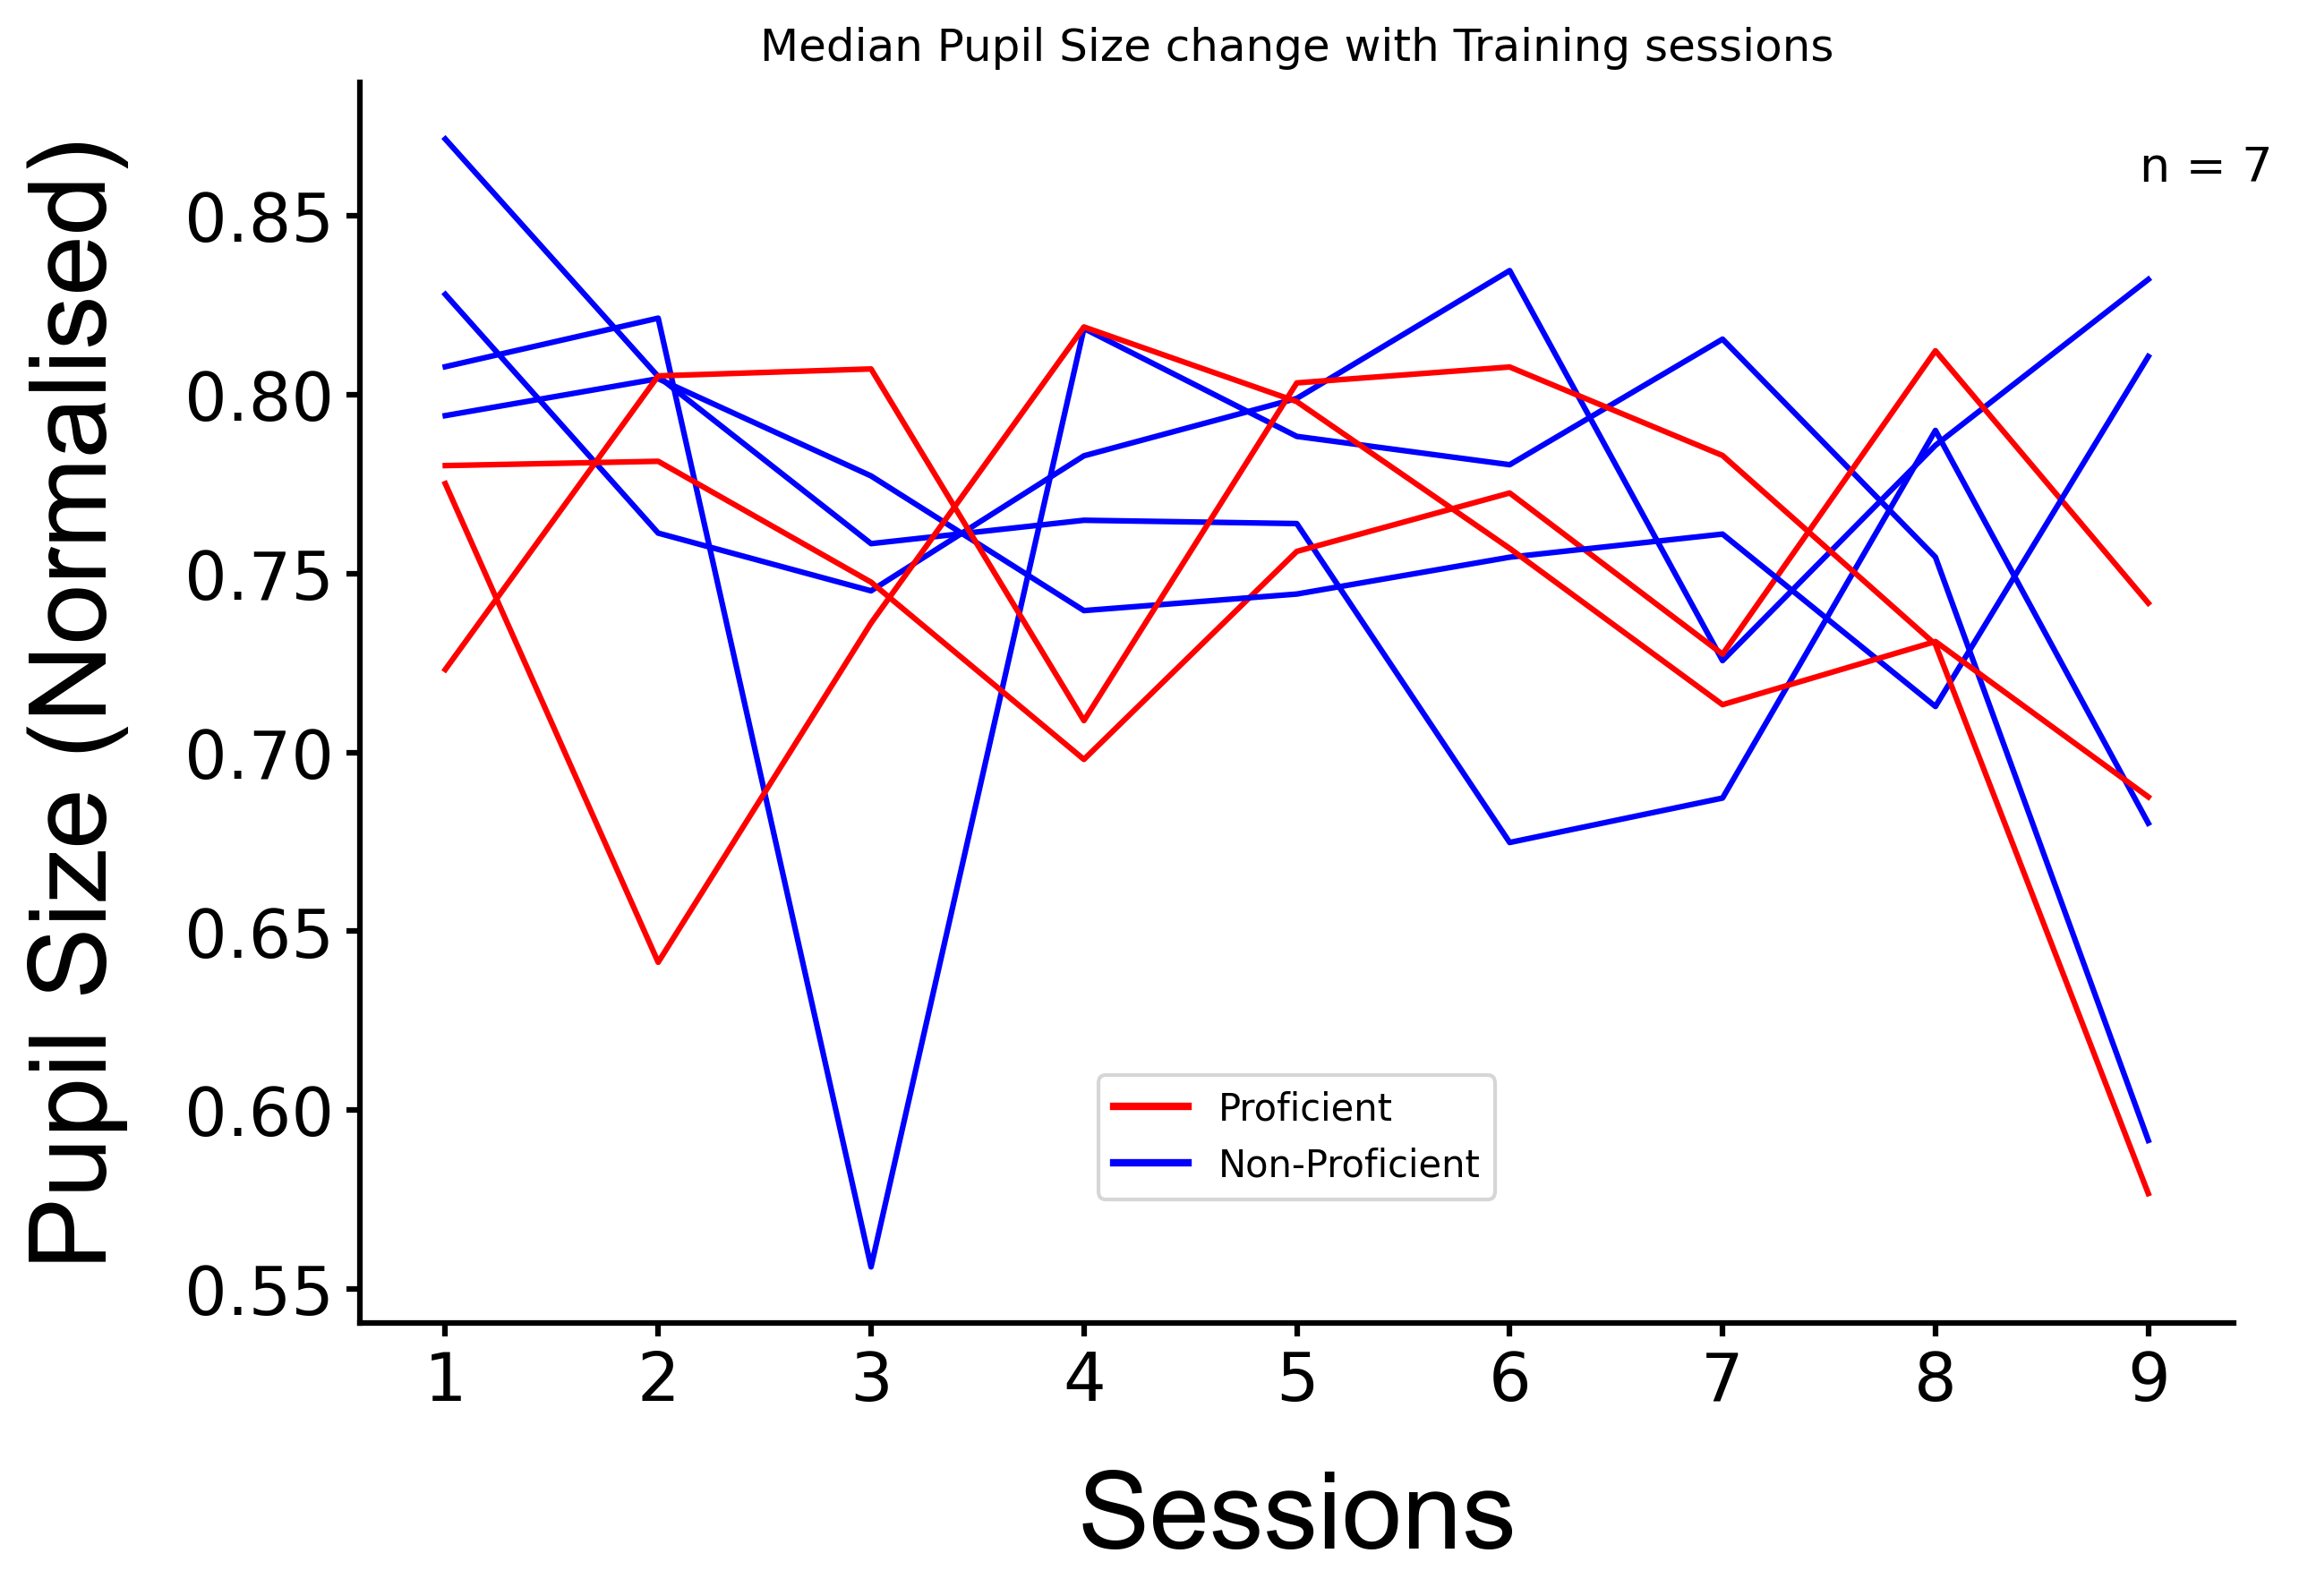

In [27]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

names = ['Charlie', 'Conner','Clive','Cole', 'Cooper', 'Calvin', 'Chase']
days = [1,2,3,4,5,6,7,8,9]

base_dir = '/Users/zhangpan/MasterProject'

fig, ax = plt.subplots(dpi=300)
fig.set_size_inches(9, 6)

for name in names:
    individual_pupil = []
    for day in days:
        cohort_dir = os.path.join(base_dir, name, 'Training_Data_New_Cohort1')
        
        # Find the correct subdirectory for the training day
        subdirectory = None
        for subdir in os.listdir(cohort_dir):
            if subdir.startswith(f'New_TrainingDay{day}'):
                subdirectory = os.path.join(cohort_dir, subdir)
                break
        
        # List all files in the found subdirectory
        files = os.listdir(subdirectory)
        
        # Find the file that starts with 'Pupil_Data'
        pupil_file = None
        for file in files:
            if file.startswith('Pupil_Data'):
                pupil_file = file
                break
        
        if pupil_file:
            file_path = os.path.join(subdirectory, pupil_file)
            try:
                pupil_df = pd.read_csv(file_path)

                # Read the first column of the DataFrame and clean the data
                pupil_size = pd.to_numeric(pupil_df.iloc[:, 0], errors='coerce').dropna()

                # Normalised
                single_day_max_pupil = np.max(pupil_size)
                normalised_day_pupil = pupil_size / single_day_max_pupil

                # Calculate the median pupil size
                median_pupil_size = np.median(normalised_day_pupil)

                # Append the median pupil size to the list
                individual_pupil.append(median_pupil_size)

            except Exception as e:
                print(f'Error loading data for {name}, Day {day}: {e}')

    # Convert the list to a NumPy array after collecting all days' data
    individual_pupil = np.array(individual_pupil)

    # Set color based on the name
    color = 'red' if name in ['Cole', 'Calvin', 'Chase'] else 'blue'
    # label = 'Proficient' if name in ['Cole', 'Calvin', 'Chase'] else 'Non-Proficient'
    ax.plot(days, individual_pupil, '-',  color=color)
    
    # Print the median pupil sizes
    print(f'{name} median pupil size for days {days} is {individual_pupil}')

# Custom legends for 'Proficient' and 'Non-Proficient'
custom_lines = [Line2D([0], [0], color='red', lw=2, label='Proficient'),
                Line2D([0], [0], color='blue', lw=2, label='Non-Proficient')]


ax.set_ylabel('Pupil Size (Normalised)', labelpad=15, size=29, fontweight=1.5, family='Arial')
ax.set_xlabel('Sessions', labelpad=15, size=29, fontweight=1.5, family='Arial')
ax.set_title('Median Pupil Size change with Training sessions')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)  # Adjust the width as needed
ax.spines['left'].set_linewidth(1.5)

ax.tick_params(axis='x', labelsize=18, width=1.5)
ax.tick_params(axis='y', labelsize=18, width=1.5)

ax.text(0.95, 0.95, f'n = 7', fontsize=13, ha='left', va='top', transform=ax.transAxes)
ax.legend(handles=custom_lines, loc='center', bbox_to_anchor=(0.5, 0.15))

Charlie median pupil size for days [1, 2, 3, 4, 5, 6, 7, 8, 9] is [0.80777074 0.82133847 0.55621956 0.81846165 0.78829806 0.78038397
 0.8154735  0.75455869 0.59155929]
Conner median pupil size for days [1, 2, 3, 4, 5, 6, 7, 8, 9] is [0.87138968 0.80504307 0.75833004 0.76486095 0.76393218 0.67481588
 0.68723547 0.78996925 0.68020208]
Clive median pupil size for days [1, 2, 3, 4, 5, 6, 7, 8, 9] is [0.82798575 0.76127393 0.74514209 0.78286993 0.79891176 0.8346297
 0.72563813 0.78579838 0.83215815]
Cole median pupil size for days [1, 2, 3, 4, 5, 6, 7, 8, 9] is [0.78013669 0.78133917 0.74756229 0.69802809 0.75615571 0.7724834
 0.72743536 0.81221647 0.74170883]
Cooper median pupil size for days [1, 2, 3, 4, 5, 6, 7, 8, 9] is [0.79410082 0.80442515 0.77724837 0.73961767 0.74424294 0.75453969
 0.76099892 0.71282804 0.81062644]
Calvin median pupil size for days [1, 2, 3, 4, 5, 6, 7, 8, 9] is [0.72315345 0.80520508 0.80714588 0.7088654  0.80324675 0.80768914
 0.78296736 0.73016594 0.57671775]
Ch

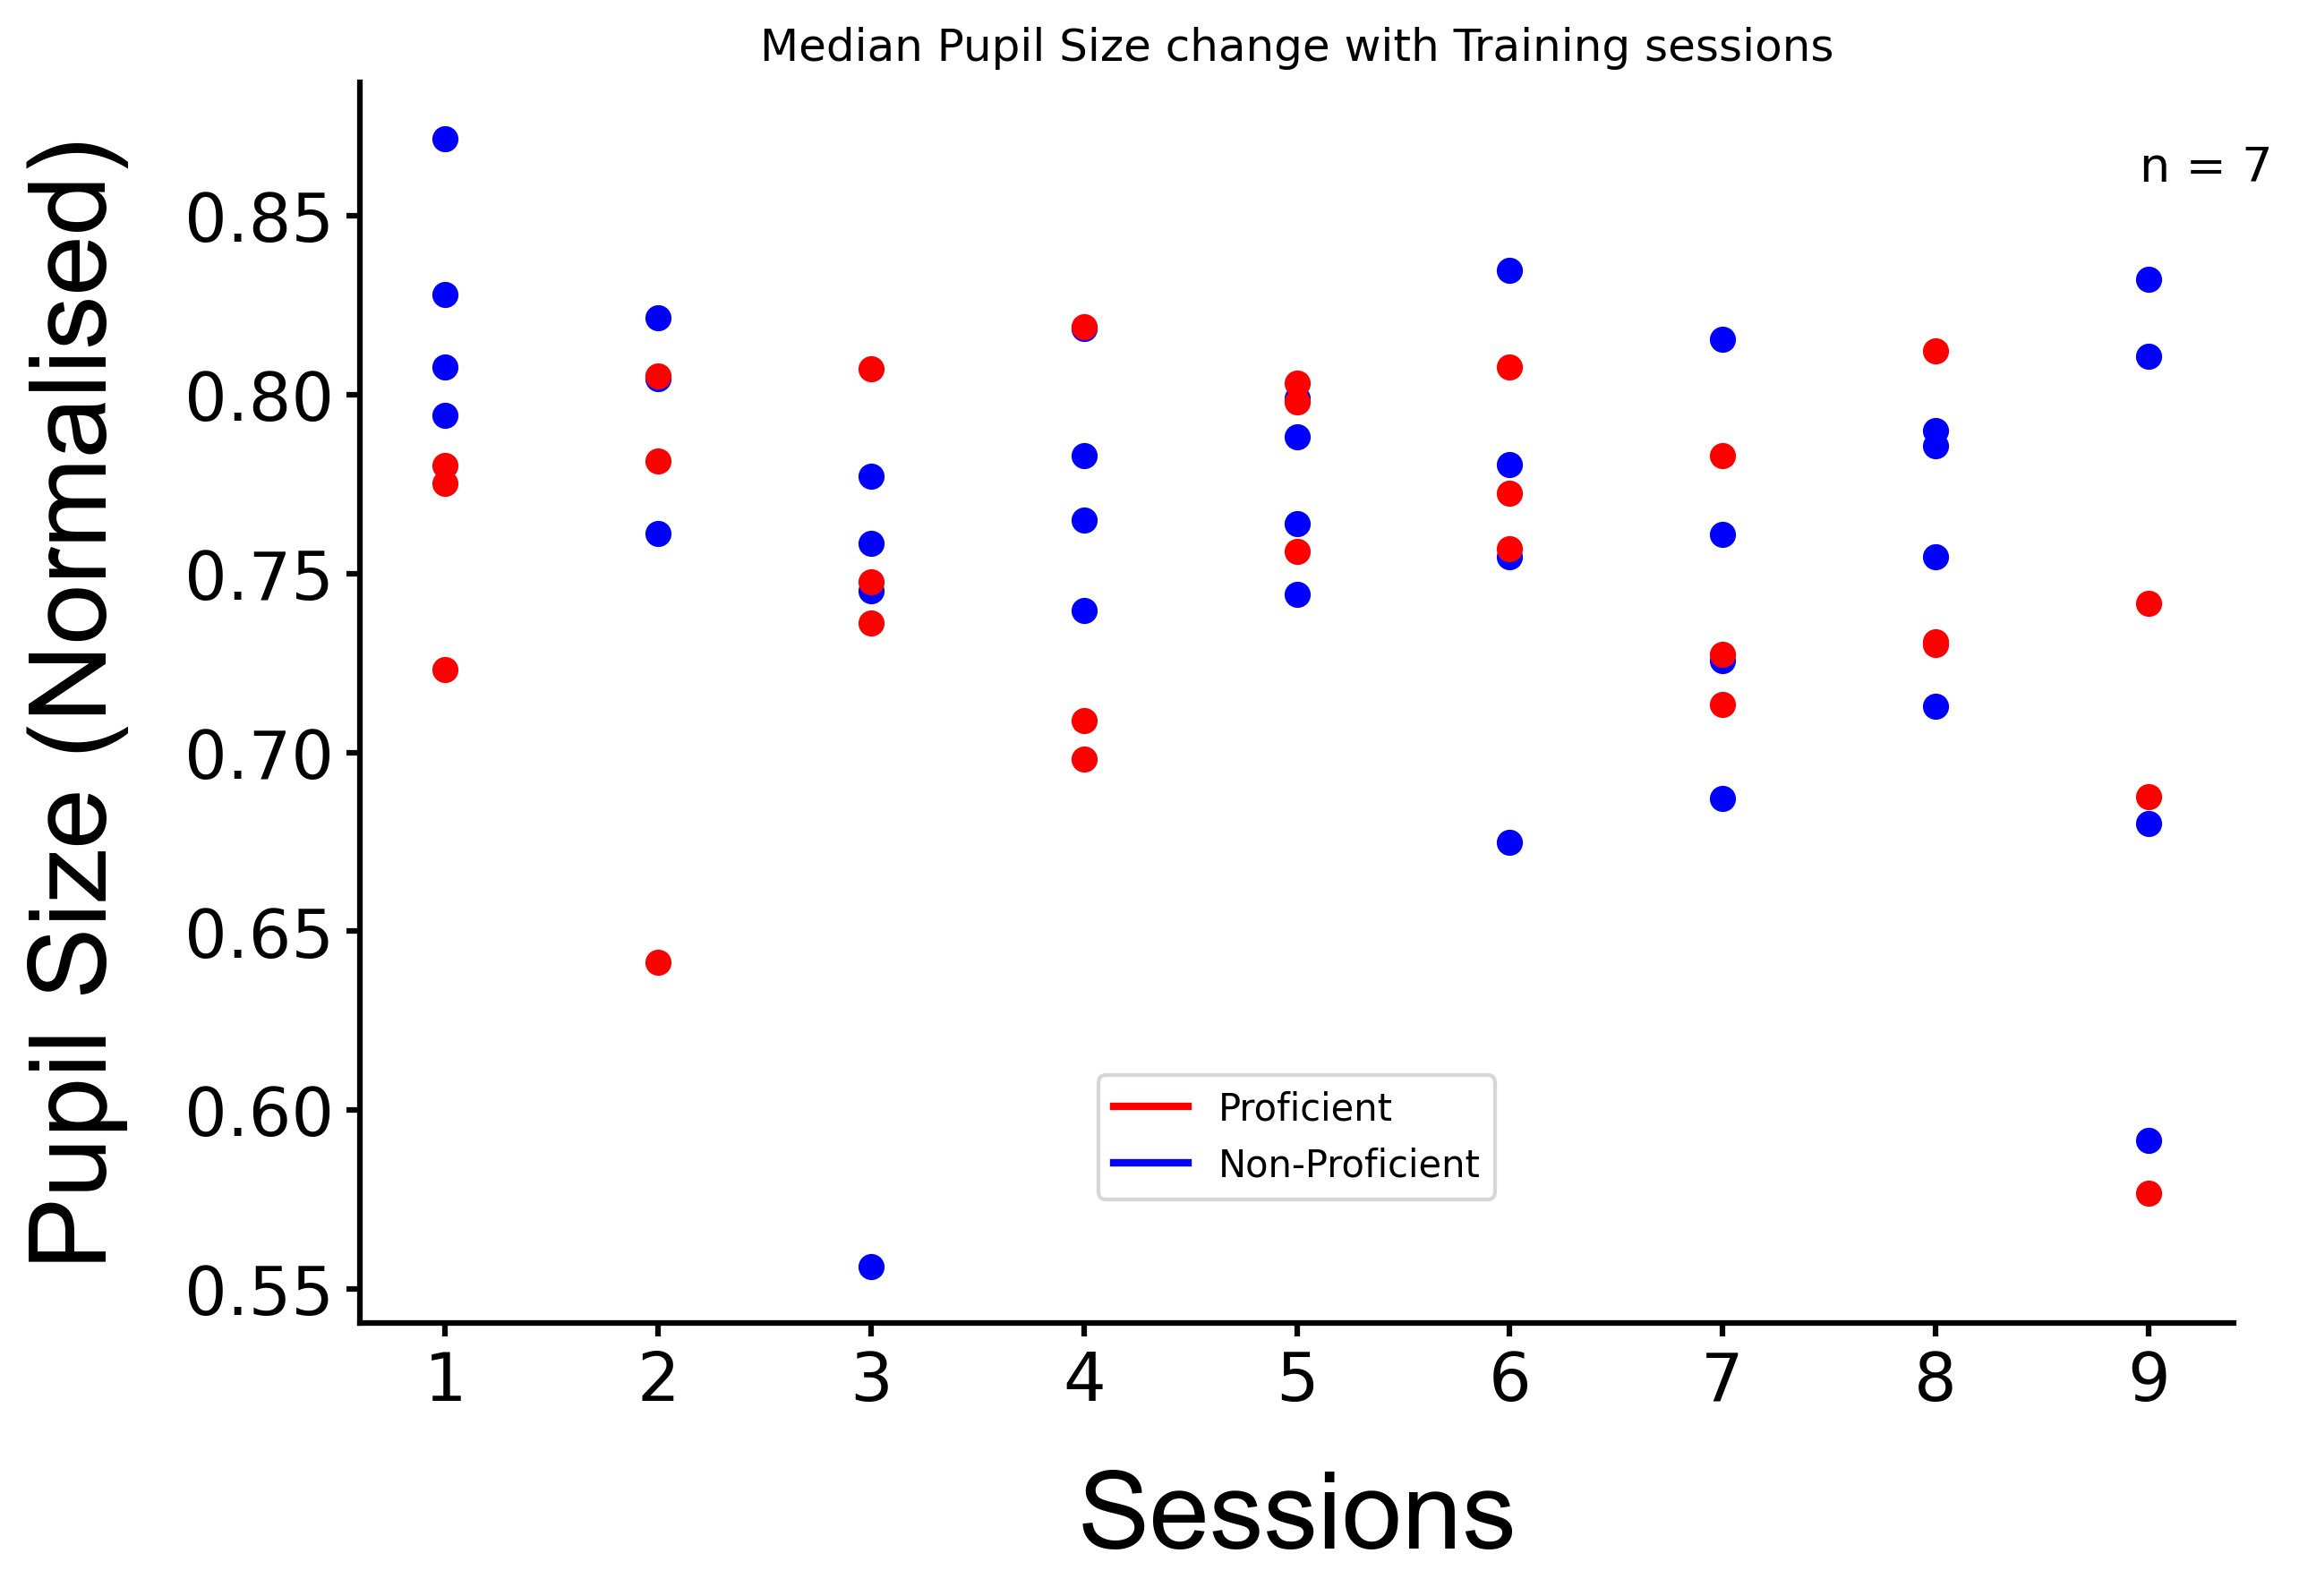

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

names = ['Charlie', 'Conner','Clive','Cole', 'Cooper', 'Calvin', 'Chase']
days = [1,2,3,4,5,6,7,8,9]

base_dir = '/Users/zhangpan/MasterProject'

fig, ax = plt.subplots(dpi=300)
fig.set_size_inches(9, 6)

for name in names:
    individual_pupil = []
    for day in days:
        cohort_dir = os.path.join(base_dir, name, 'Training_Data_New_Cohort1')
        
        # Find the correct subdirectory for the training day
        subdirectory = None
        for subdir in os.listdir(cohort_dir):
            if subdir.startswith(f'New_TrainingDay{day}'):
                subdirectory = os.path.join(cohort_dir, subdir)
                break
        
        # List all files in the found subdirectory
        files = os.listdir(subdirectory)
        
        # Find the file that starts with 'Pupil_Data'
        pupil_file = None
        for file in files:
            if file.startswith('Pupil_Data'):
                pupil_file = file
                break
        
        if pupil_file:
            file_path = os.path.join(subdirectory, pupil_file)
            try:
                pupil_df = pd.read_csv(file_path)

                # Read the first column of the DataFrame and clean the data
                pupil_size = pd.to_numeric(pupil_df.iloc[:, 0], errors='coerce').dropna()

                # Normalised
                single_day_max_pupil = np.max(pupil_size)
                normalised_day_pupil = pupil_size / single_day_max_pupil

                # Calculate the median pupil size
                median_pupil_size = np.median(normalised_day_pupil)

                # Append the median pupil size to the list
                individual_pupil.append(median_pupil_size)

            except Exception as e:
                print(f'Error loading data for {name}, Day {day}: {e}')

    # Convert the list to a NumPy array after collecting all days' data
    individual_pupil = np.array(individual_pupil)

    # Set color based on the name
    color = 'red' if name in ['Cole', 'Calvin', 'Chase'] else 'blue'
    # label = 'Proficient' if name in ['Cole', 'Calvin', 'Chase'] else 'Non-Proficient'
    ax.plot(days, individual_pupil, 'o',  color=color)
    
    # Print the median pupil sizes
    print(f'{name} median pupil size for days {days} is {individual_pupil}')

# Custom legends for 'Proficient' and 'Non-Proficient'
custom_lines = [Line2D([0], [0], color='red', lw=2, label='Proficient'),
                Line2D([0], [0], color='blue', lw=2, label='Non-Proficient')]


ax.set_ylabel('Pupil Size (Normalised)', labelpad=15, size=29, fontweight=1.5, family='Arial')
ax.set_xlabel('Sessions', labelpad=15, size=29, fontweight=1.5, family='Arial')
ax.set_title('Median Pupil Size change with Training sessions')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)  # Adjust the width as needed
ax.spines['left'].set_linewidth(1.5)

ax.tick_params(axis='x', labelsize=18, width=1.5)
ax.tick_params(axis='y', labelsize=18, width=1.5)

ax.text(0.95, 0.95, f'n = 7', fontsize=13, ha='left', va='top', transform=ax.transAxes)
ax.legend(handles=custom_lines, loc='center', bbox_to_anchor=(0.5, 0.15))

Charlie median pupil size for days [1, 2, 3, 4, 5, 6, 7, 8, 9] is [0.80777074 0.82133847 0.55621956 0.81846165 0.78829806 0.78038397
 0.8154735  0.75455869 0.59155929]
Conner median pupil size for days [1, 2, 3, 4, 5, 6, 7, 8, 9] is [0.87138968 0.80504307 0.75833004 0.76486095 0.76393218 0.67481588
 0.68723547 0.78996925 0.68020208]
Clive median pupil size for days [1, 2, 3, 4, 5, 6, 7, 8, 9] is [0.82798575 0.76127393 0.74514209 0.78286993 0.79891176 0.8346297
 0.72563813 0.78579838 0.83215815]
Cole median pupil size for days [1, 2, 3, 4, 5, 6, 7, 8, 9] is [0.78013669 0.78133917 0.74756229 0.69802809 0.75615571 0.7724834
 0.72743536 0.81221647 0.74170883]
Cooper median pupil size for days [1, 2, 3, 4, 5, 6, 7, 8, 9] is [0.79410082 0.80442515 0.77724837 0.73961767 0.74424294 0.75453969
 0.76099892 0.71282804 0.81062644]
Calvin median pupil size for days [1, 2, 3, 4, 5, 6, 7, 8, 9] is [0.72315345 0.80520508 0.80714588 0.7088654  0.80324675 0.80768914
 0.78296736 0.73016594 0.57671775]
Ch

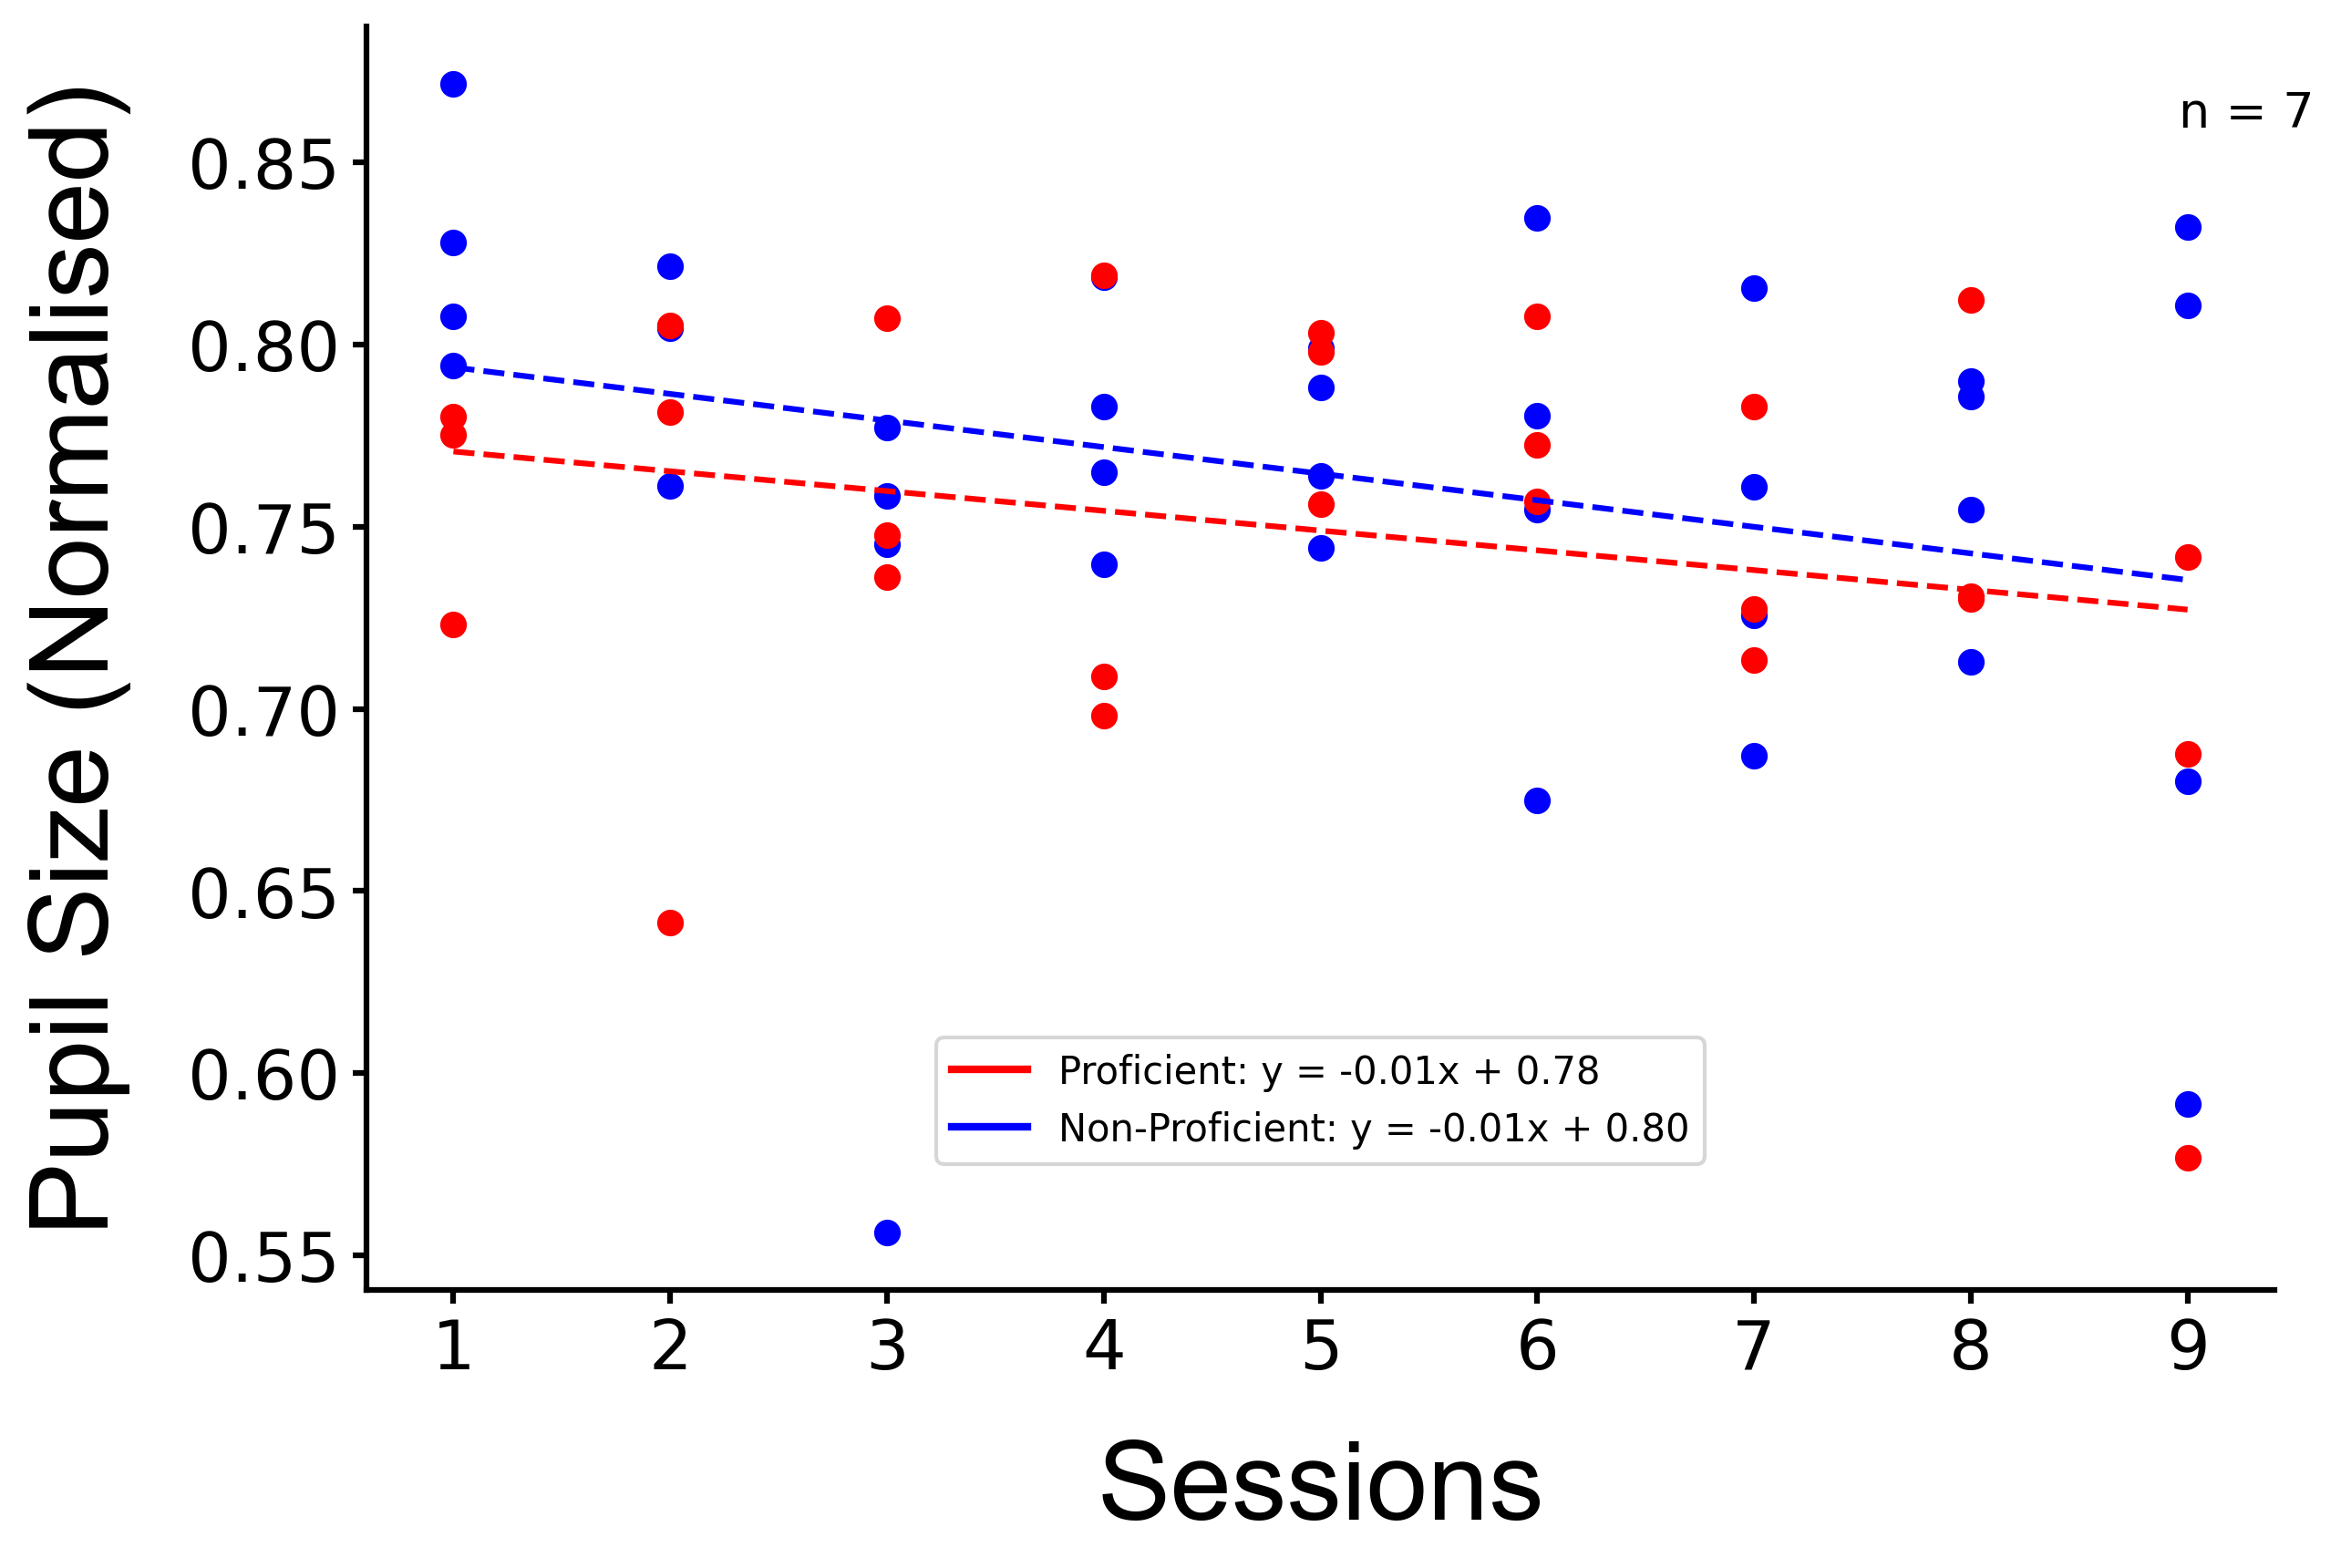

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

names = ['Charlie', 'Conner','Clive','Cole', 'Cooper', 'Calvin', 'Chase']
days = [1,2,3,4,5,6,7,8,9]

base_dir = '/Users/zhangpan/MasterProject'

fig, ax = plt.subplots(dpi=300)
fig.set_size_inches(9, 6)

proficient_pupil_data = []
non_proficient_pupil_data = []

for name in names:
    individual_pupil = []
    for day in days:
        cohort_dir = os.path.join(base_dir, name, 'Training_Data_New_Cohort1')
        
        # Find the correct subdirectory for the training day
        subdirectory = None
        for subdir in os.listdir(cohort_dir):
            if subdir.startswith(f'New_TrainingDay{day}'):
                subdirectory = os.path.join(cohort_dir, subdir)
                break
        
        # List all files in the found subdirectory
        files = os.listdir(subdirectory)
        
        # Find the file that starts with 'Pupil_Data'
        pupil_file = None
        for file in files:
            if file.startswith('Pupil_Data'):
                pupil_file = file
                break
        
        if pupil_file:
            file_path = os.path.join(subdirectory, pupil_file)
            try:
                pupil_df = pd.read_csv(file_path)

                # Read the first column of the DataFrame and clean the data
                pupil_size = pd.to_numeric(pupil_df.iloc[:, 0], errors='coerce').dropna()

                # Normalised
                single_day_max_pupil = np.max(pupil_size)
                normalised_day_pupil = pupil_size / single_day_max_pupil

                # Calculate the median pupil size
                median_pupil_size = np.median(normalised_day_pupil)

                # Append the median pupil size to the list
                individual_pupil.append(median_pupil_size)

            except Exception as e:
                print(f'Error loading data for {name}, Day {day}: {e}')

    # Convert the list to a NumPy array after collecting all days' data
    individual_pupil = np.array(individual_pupil)

    # Set color based on the name
    if name in ['Cole', 'Calvin', 'Chase']:
        color = 'red'
        proficient_pupil_data.append(individual_pupil)
    else:
        color = 'blue'
        non_proficient_pupil_data.append(individual_pupil)
        
    ax.plot(days, individual_pupil, 'o', color=color)
    
    # Print the median pupil sizes
    print(f'{name} median pupil size for days {days} is {individual_pupil}')

# Combine data for proficient and non-proficient groups
proficient_pupil_data = np.array(proficient_pupil_data).mean(axis=0)
non_proficient_pupil_data = np.array(non_proficient_pupil_data).mean(axis=0)

# Fit lines
proficient_fit = np.polyfit(days, proficient_pupil_data, 1)
non_proficient_fit = np.polyfit(days, non_proficient_pupil_data, 1)

# Plot fit lines
ax.plot(days, np.polyval(proficient_fit, days), color='red', linestyle='--')
ax.plot(days, np.polyval(non_proficient_fit, days), color='blue', linestyle='--')

# Legend with equations
proficient_eq = f'Proficient: y = {proficient_fit[0]:.2f}x + {proficient_fit[1]:.2f}'
non_proficient_eq = f'Non-Proficient: y = {non_proficient_fit[0]:.2f}x + {non_proficient_fit[1]:.2f}'

custom_lines = [Line2D([0], [0], color='red', lw=2, linestyle='-', label=proficient_eq),
                Line2D([0], [0], color='blue', lw=2, linestyle='-', label=non_proficient_eq)]

ax.set_ylabel('Pupil Size (Normalised)', labelpad=15, size=29, fontweight=1.5, family='Arial')
ax.set_xlabel('Sessions', labelpad=15, size=29, fontweight=1.5, family='Arial')
# ax.set_title('Median Pupil Size change with Training sessions')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)  # Adjust the width as needed
ax.spines['left'].set_linewidth(1.5)

ax.tick_params(axis='x', labelsize=18, width=1.5)
ax.tick_params(axis='y', labelsize=18, width=1.5)

ax.text(0.95, 0.95, f'n = 7', fontsize=13, ha='left', va='top', transform=ax.transAxes)
ax.legend(handles=custom_lines, loc='center', bbox_to_anchor=(0.5, 0.15))


# fl_latency 16% vs 100% Figure 3b

Text(0.05, 0.95, 'n = 3')

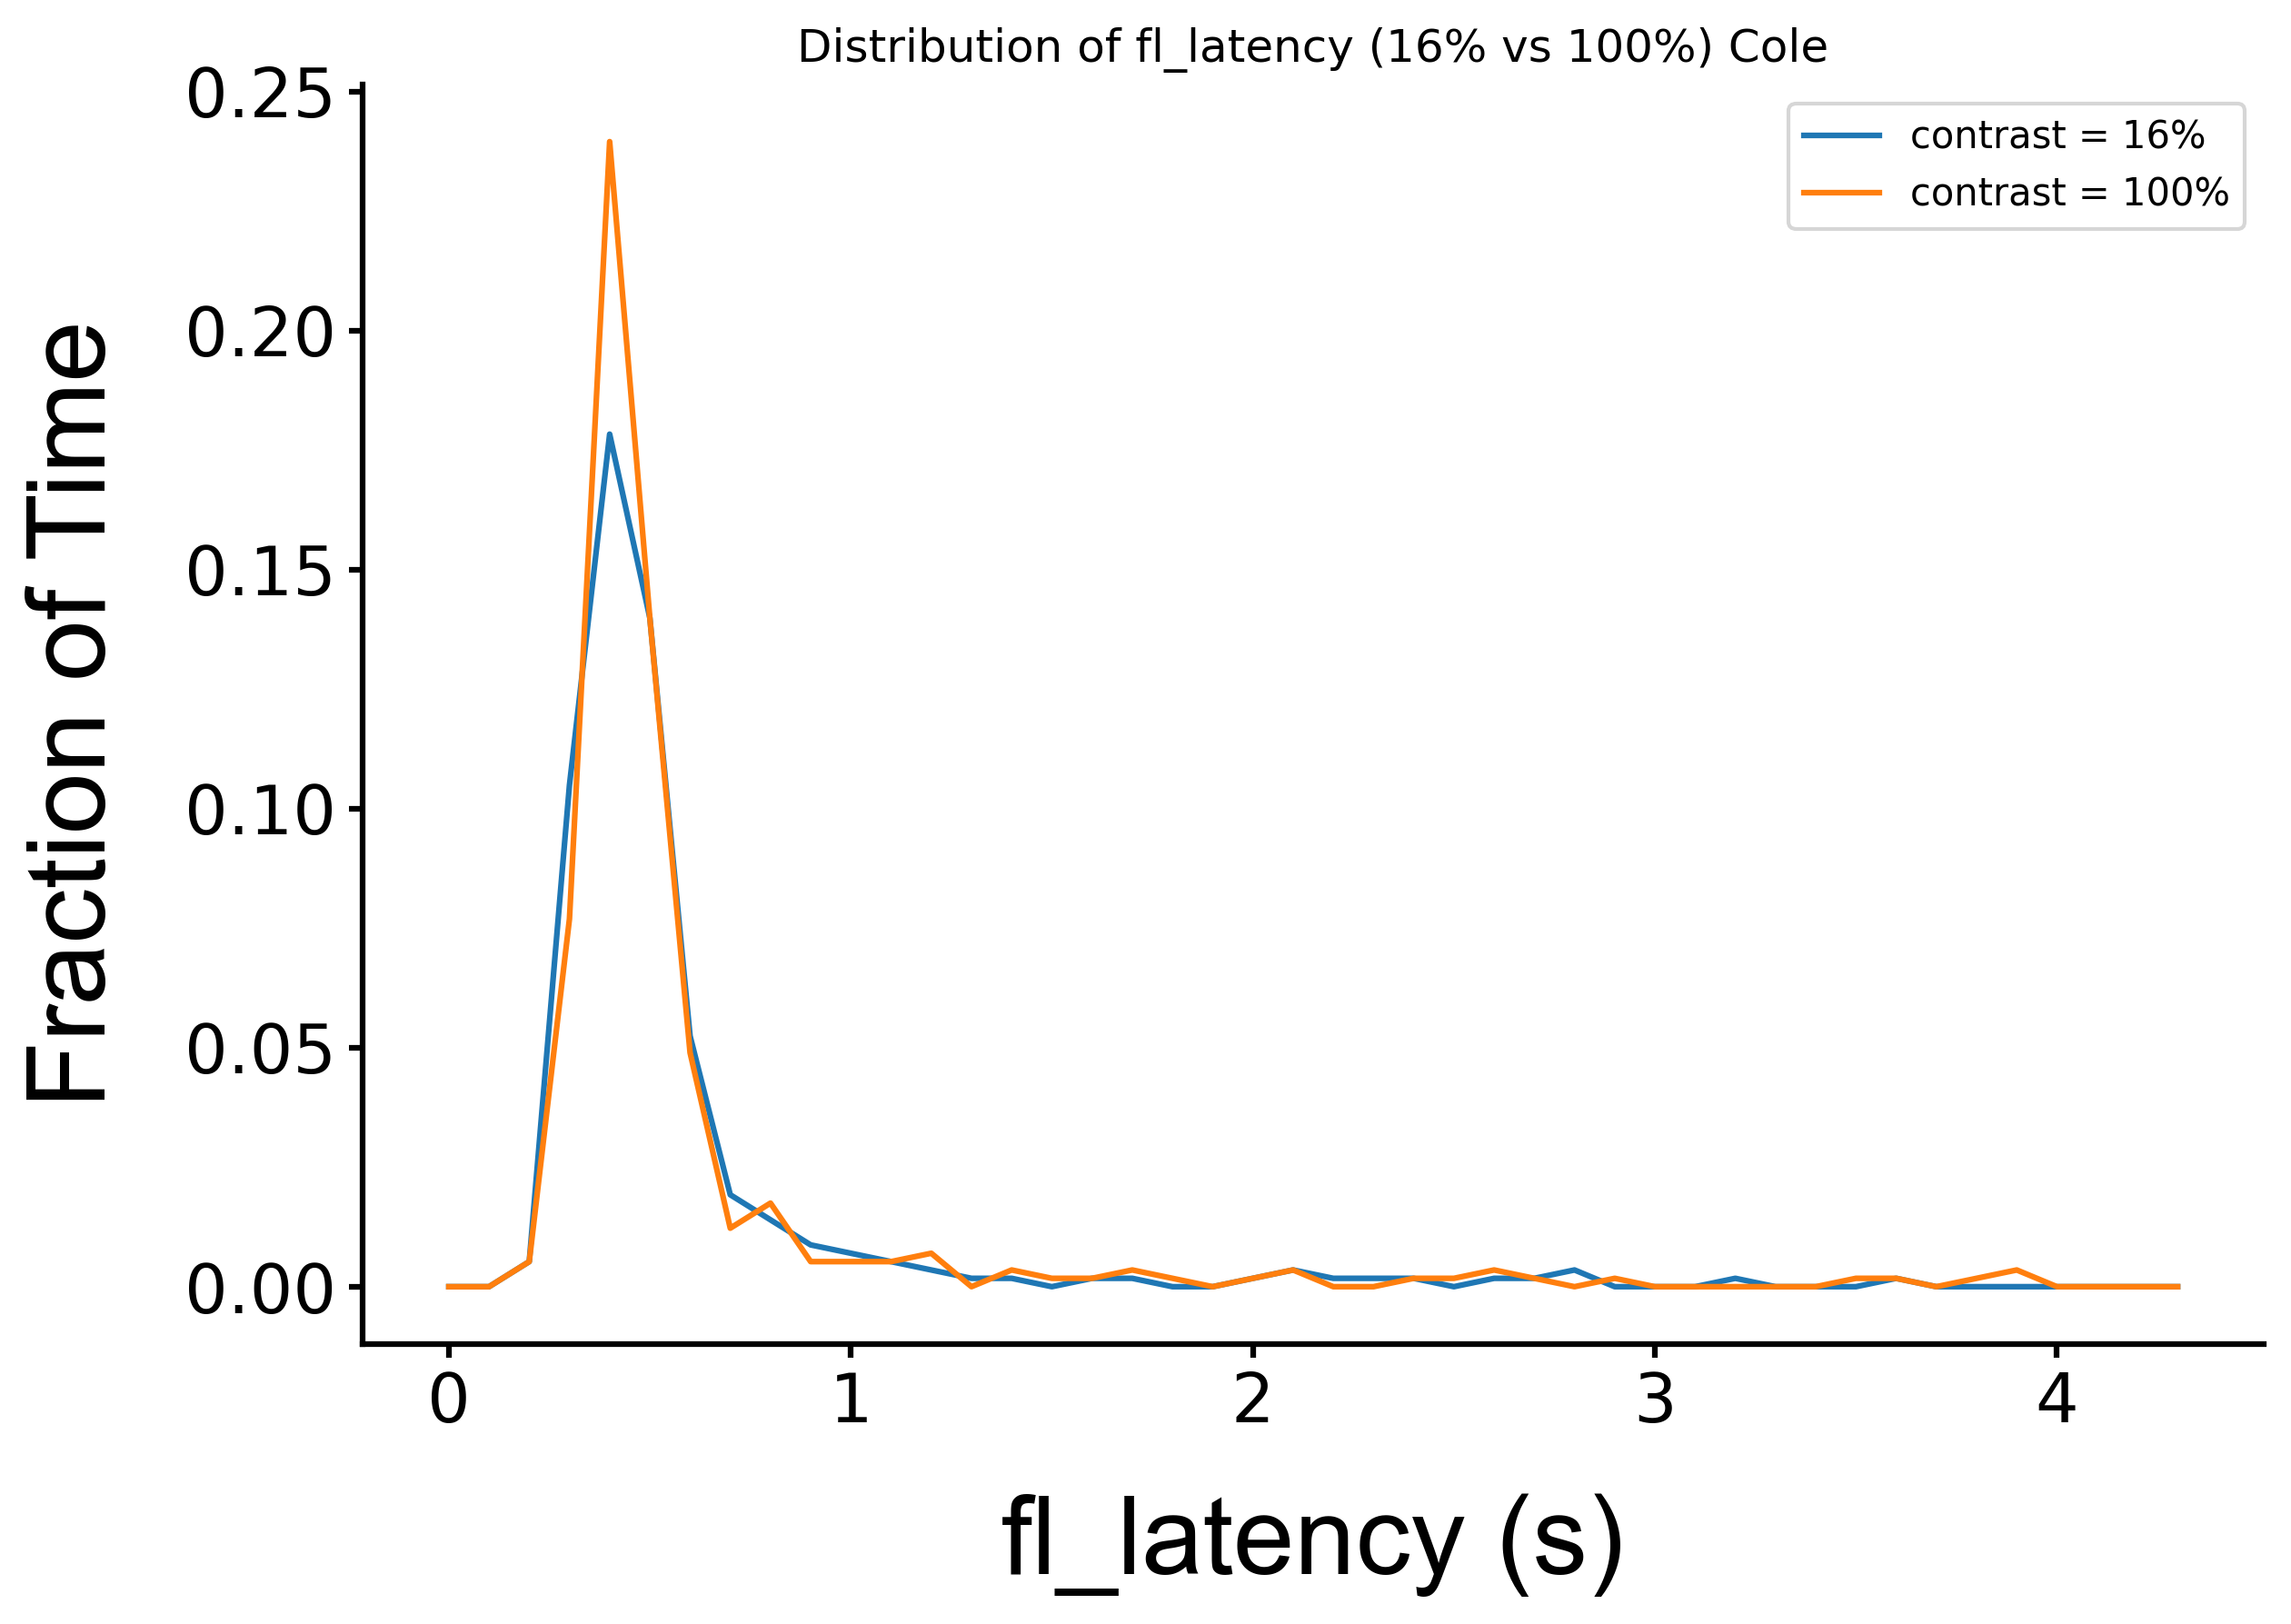

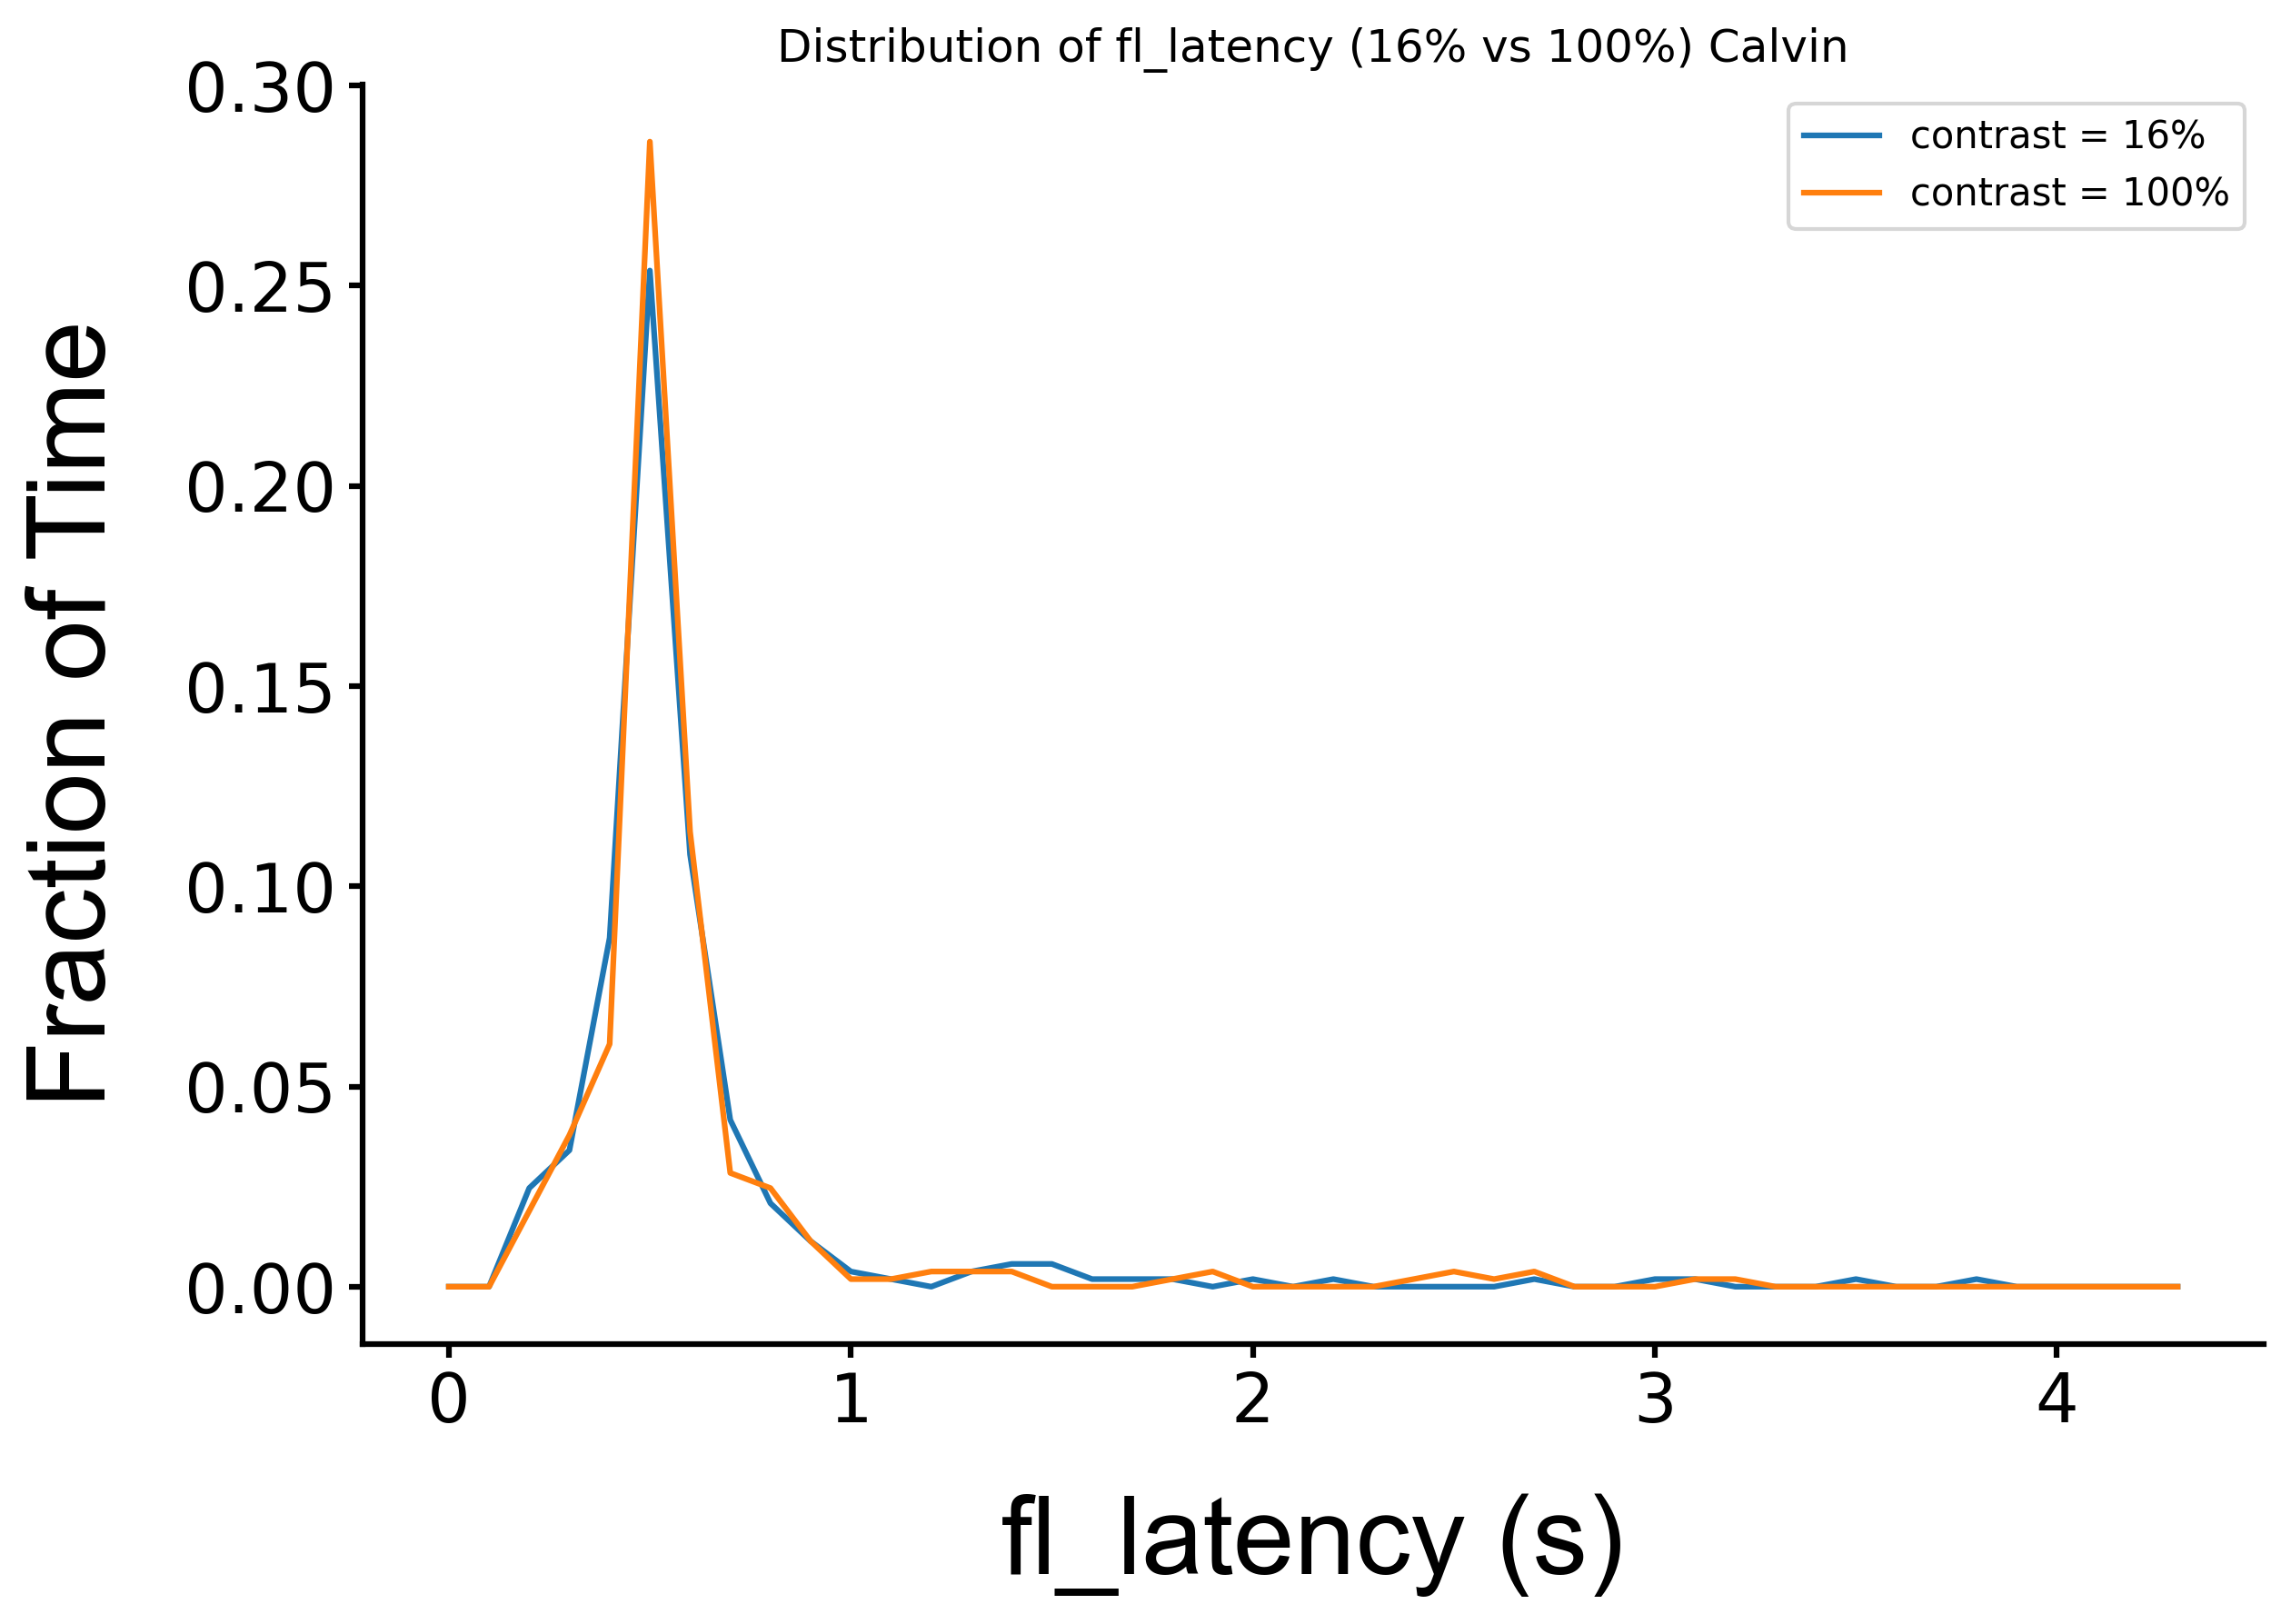

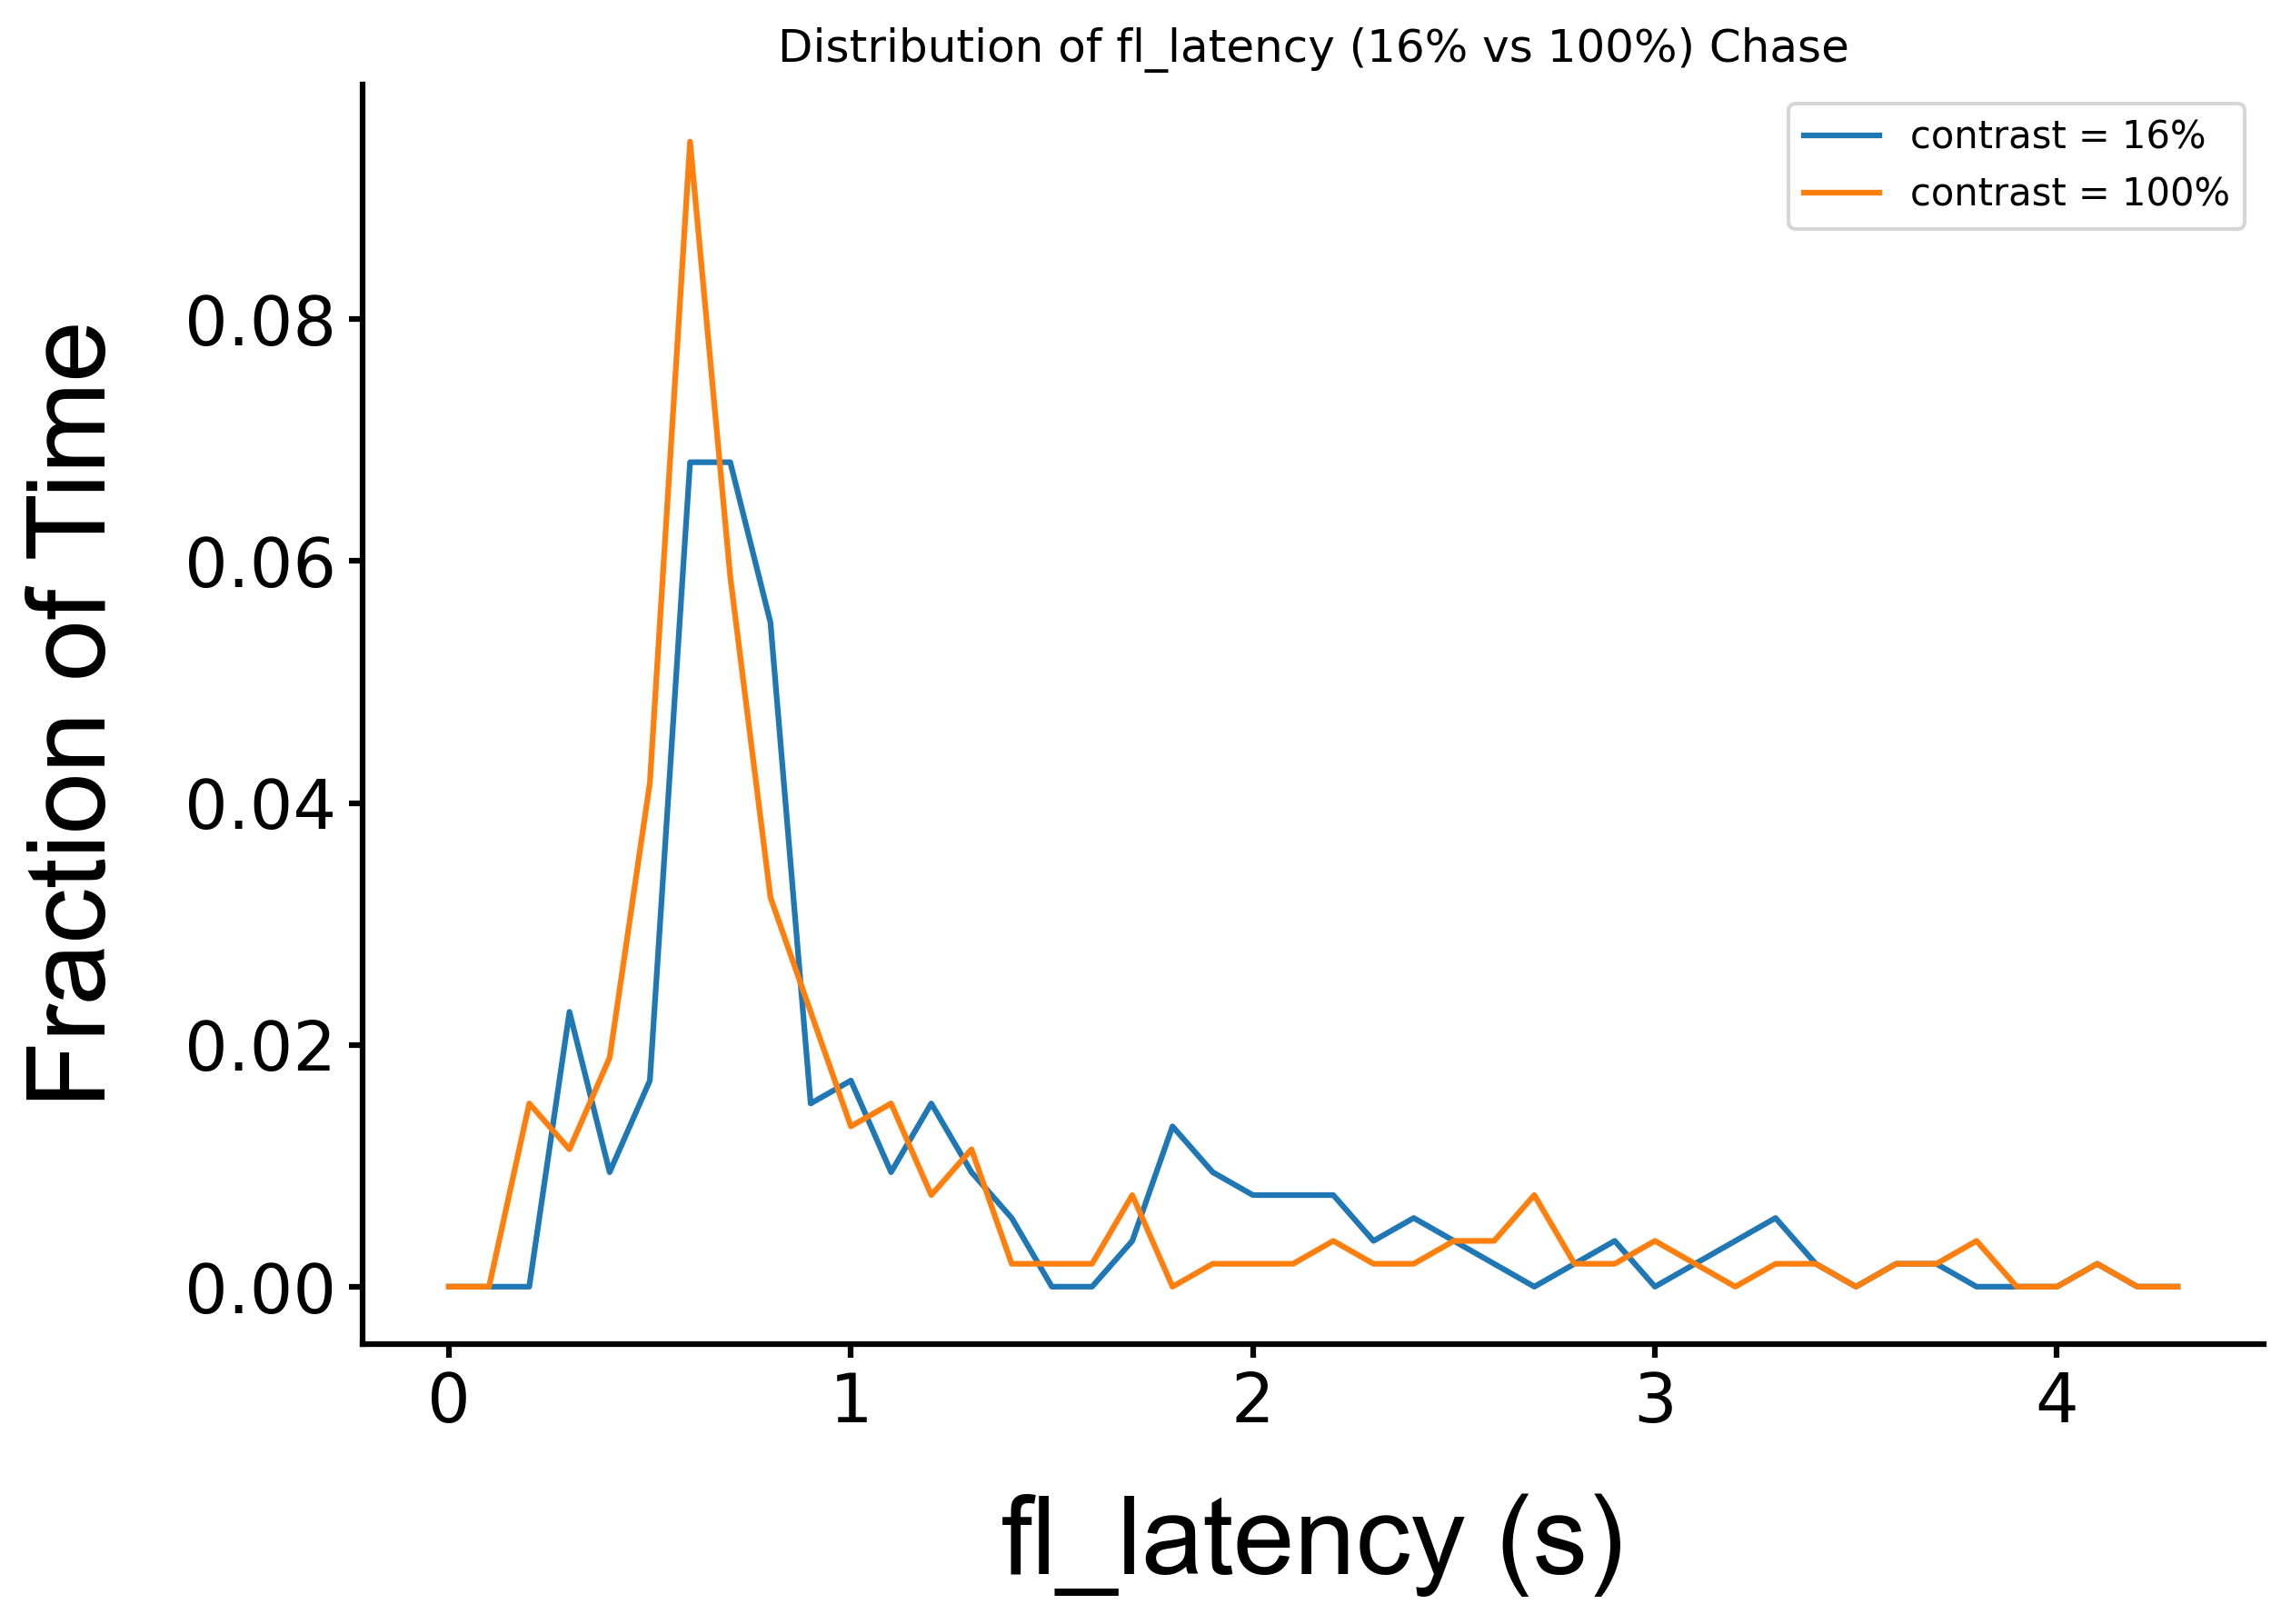

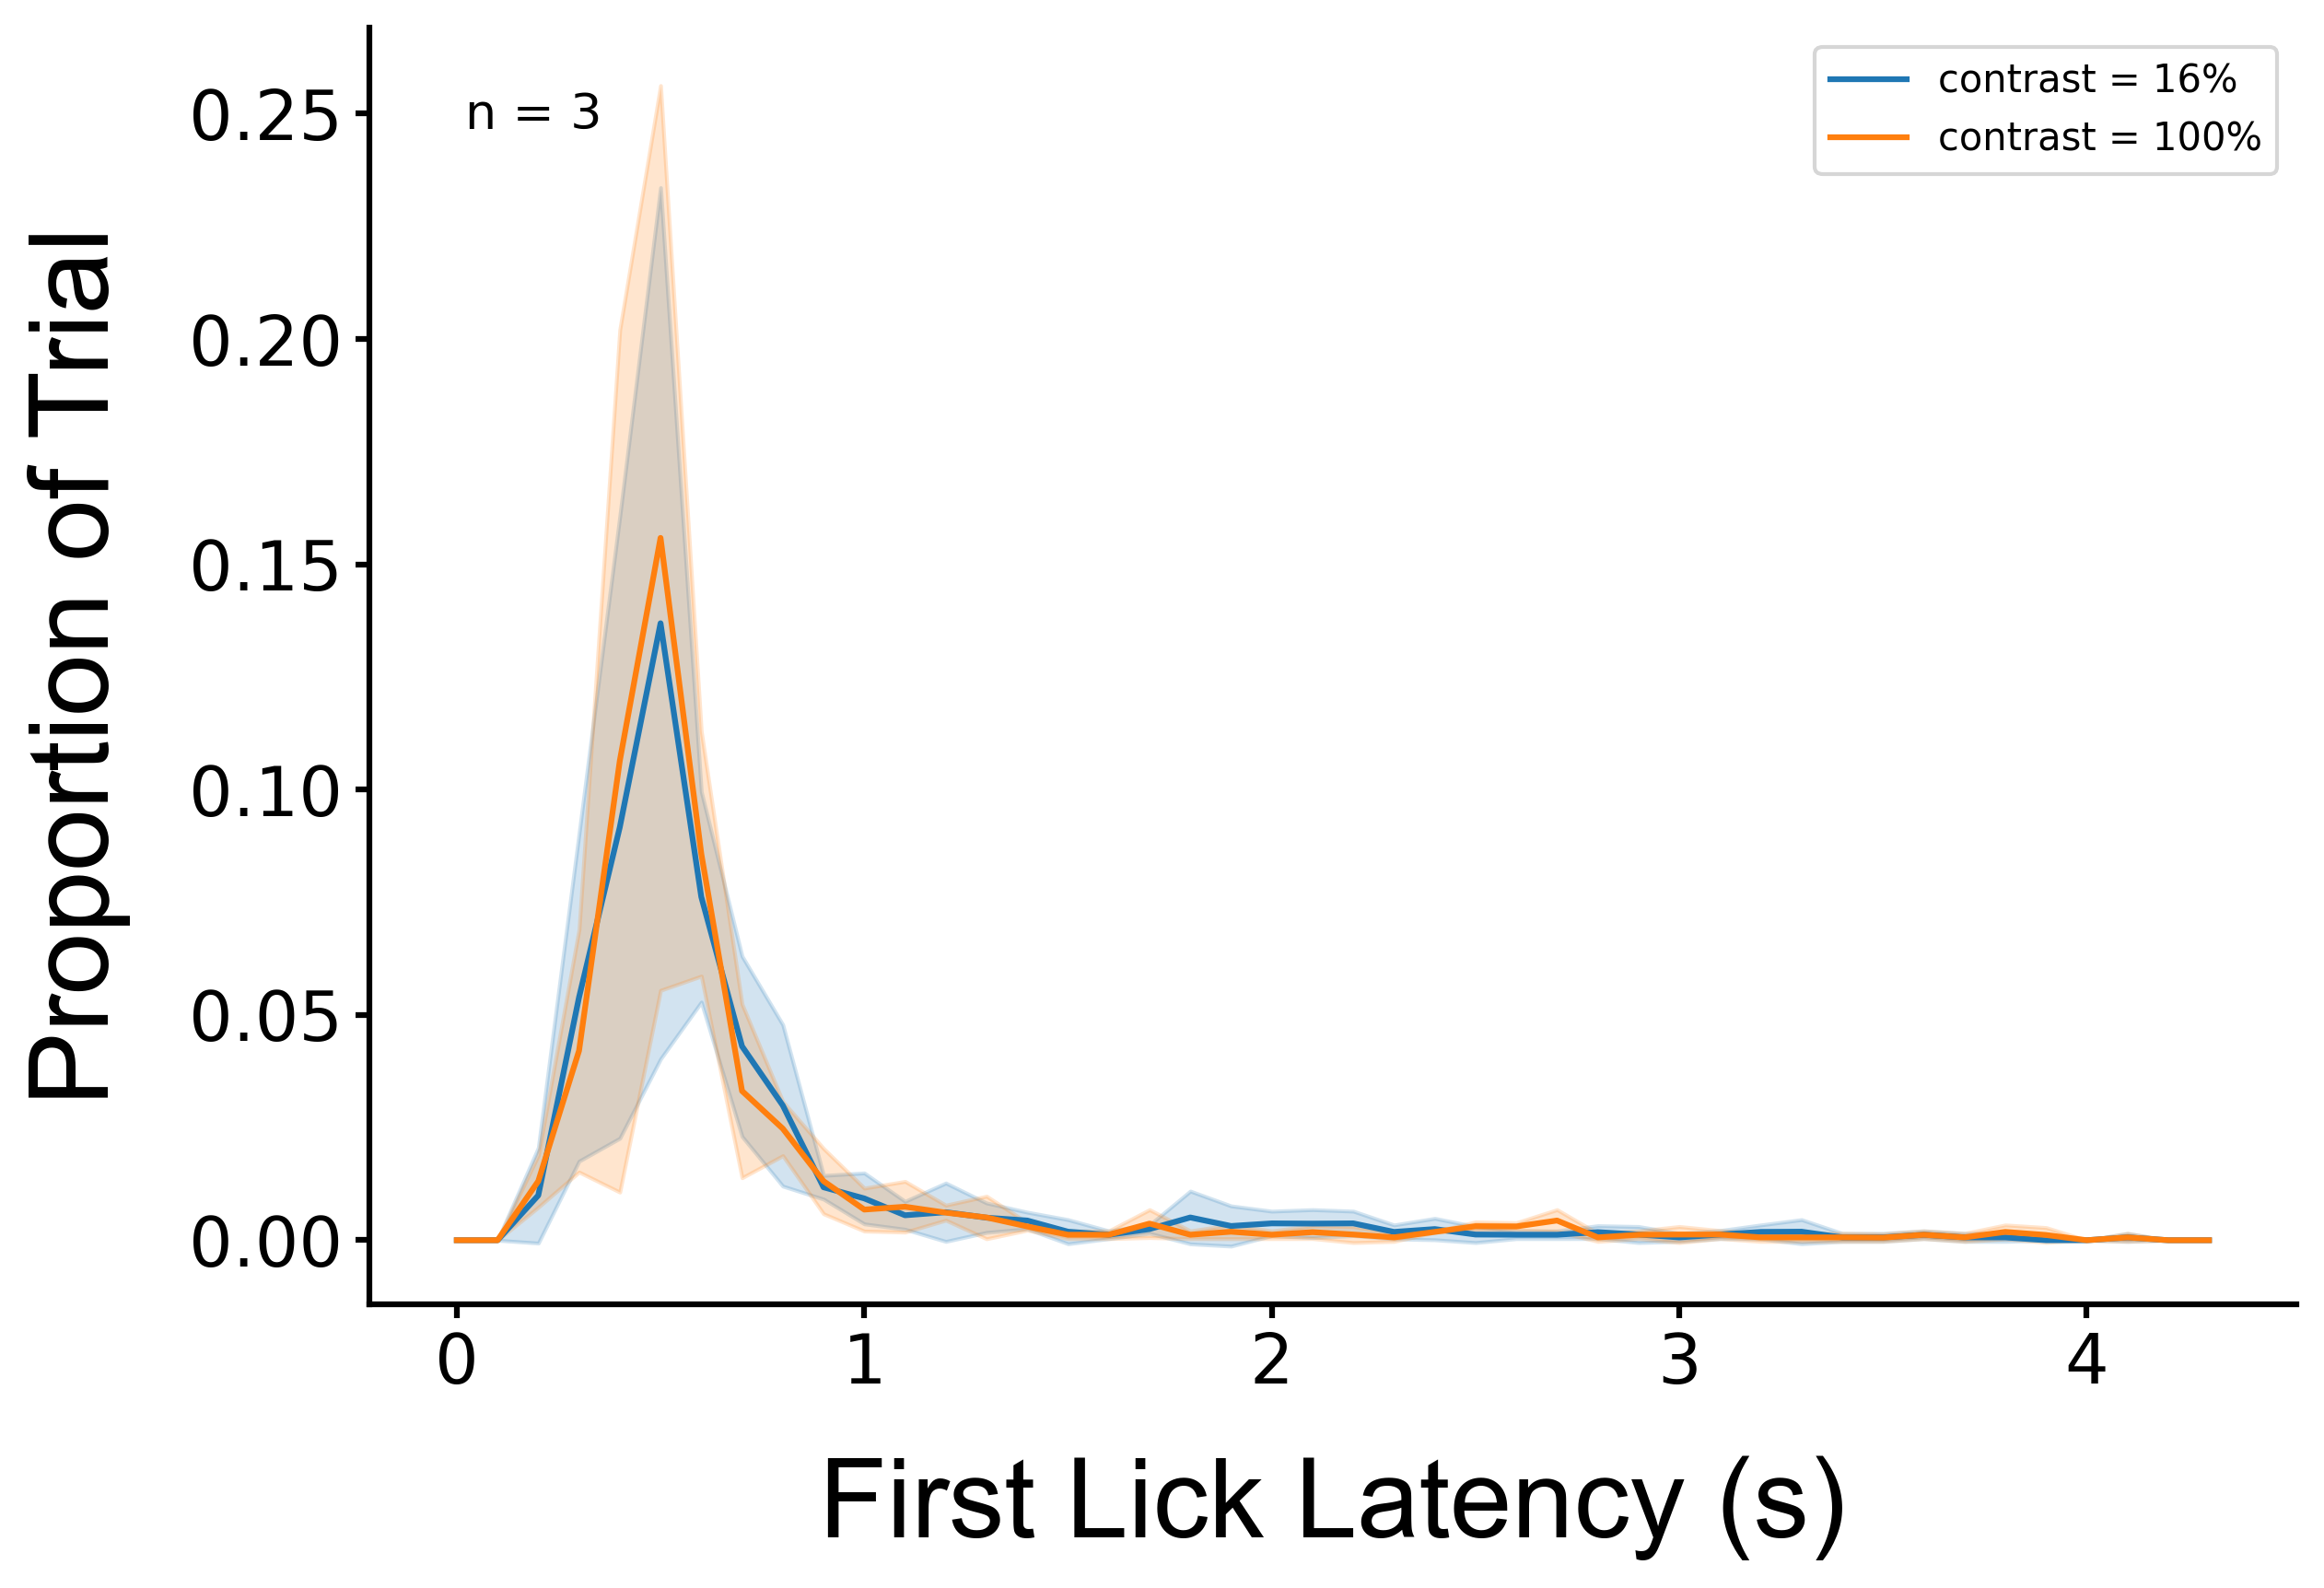

In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# name = 'Cole'
# days = [9,10,12,13]
# dates = ['01052024','02052024','06052024','07052024']

# name = 'Chase'
# days = [7,8,9,10]
# dates = ['30042024','01052024','02052024','03052024']
# axis = ['y','y','y','y']

# name = 'Calvin'
# days = [5,7,8,9]
# dates = ['30042024','01052024','02052024']
# axis = ['x','y','y']

names = ['Cole', 'Calvin', 'Chase']


bin_size = 0.1
bins = np.arange(0, 4.45, bin_size)

# Use bin edges without the last edge for plotting
bin_edges = bins[:-1]
bin_num = len(bin_edges)

group_low_fl = []
group_high_fl = []

for name in names:
    # Directory where CSV files are located
    directory = f'/Users/zhangpan/MasterProject/{name}/New_Trial_table'

    individual_low_fl = []
    individual_high_fl = []

    fig, ax = plt.subplots(dpi=300)
    fig.set_size_inches(9, 6)

    # Iterate over CSV files in the directory
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            file_path = os.path.join(directory, filename)
            
            # Extract day number from filename
            day = int(filename.split('_')[3].replace('Day', ''))
            days.append(day)

            # Read CSV file
            df = pd.read_csv(file_path)

            # include the delay period before Vstim
            df['fl_latency']= df['fl_latency'] + 0.25

            low_contrast_df = df[(df['stim_contrast'] == 0.16) & (df['hit'] == 1)].sort_values(by='fl_latency').reset_index(drop=True)
            high_contrast_df = df[(df['stim_contrast'] == 1) & (df['hit'] == 1)].sort_values(by='fl_latency').reset_index(drop=True)

            low_data = low_contrast_df['fl_latency']
            high_data = high_contrast_df['fl_latency']

            low_hist, _ = np.histogram(low_data, bins=bins)
            high_hist, _ = np.histogram(high_data, bins=bins)

            # ax.plot(bin_edges, low_hist/bin_num, '-', label='contrast = 16%')
            # ax.plot(bin_edges, high_hist/bin_num, '-', label='contrast = 100%')

            individual_low_fl.append(low_hist)
            individual_high_fl.append(high_hist)

    # Plot mean

    individual_mean_low_fl = (np.mean(individual_low_fl, axis=0))/bin_num
    individual_mean_high_fl = (np.mean(individual_high_fl, axis=0))/bin_num


    # fig, ax = plt.subplots(dpi=300)
    # fig.set_size_inches(9, 6)

    ax.plot(bin_edges, individual_mean_low_fl, '-', label='contrast = 16%')
    ax.plot(bin_edges, individual_mean_high_fl, '-', label='contrast = 100%')

    ax.set_ylabel('Fraction of Time', labelpad=15, size=29, fontweight=1.5, family='Arial')
    ax.set_xlabel('fl_latency (s)', labelpad=15, size=29, fontweight=1.5, family='Arial')
    ax.set_title(f'Distribution of fl_latency (16% vs 100%) {name}')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(1.5)  # Adjust the width as needed
    ax.spines['left'].set_linewidth(1.5)

    ax.tick_params(axis='x', labelsize=18, width=1.5)
    ax.tick_params(axis='y', labelsize=18, width=1.5)
    ax.legend()

    # print(f'{name} 16% fl_latency distribution is {individual_mean_low_fl}')
    # print(f'{name} 100% fl_latency distribution is {individual_mean_high_fl}')
    
    group_low_fl.append(individual_mean_low_fl)
    group_high_fl.append(individual_mean_high_fl)
    
group_low_fl = np.array(group_low_fl)
group_high_fl = np.array(group_high_fl)

mean_group_low_fl = np.mean(group_low_fl, axis=0)
mean_group_high_fl = np.mean(group_high_fl, axis=0)

std_group_low_fl = np.std(group_low_fl, axis=0)
std_group_high_fl = np.std(group_high_fl, axis=0)

fig, ax = plt.subplots(dpi=300)
fig.set_size_inches(9, 6)

# print(f'group mean 16% fl_latency distribution is {group_low_fl}')
# print(f'group mean 100% fl_latency distribution is {group_high_fl}')
# print(f'group std 16% fl_latency distribution is {std_group_low_fl}')
# print(f'group std 100% fl_latency distribution is {std_group_high_fl}')

# Plot hit data
ax.plot(bin_edges, mean_group_low_fl, label='contrast = 16%', color='#1f77b4')
ax.fill_between(bin_edges, mean_group_low_fl - std_group_low_fl, mean_group_low_fl + std_group_low_fl, color='#1f77b4', alpha=0.2)

# Plot miss data
ax.plot(bin_edges, mean_group_high_fl, label='contrast = 100%', color='#ff7f0e')
ax.fill_between(bin_edges, mean_group_high_fl - std_group_high_fl, mean_group_high_fl + std_group_high_fl, color='#ff7f0e', alpha=0.2)

ax.set_ylabel('Proportion of Trial', labelpad=15, size=29, fontweight=1.5, family='Arial')
ax.set_xlabel('First Lick Latency (s)', labelpad=15, size=29, fontweight=1.5, family='Arial')
# ax.set_title(f'Group Distribution of fl_latency (16% vs 100%)')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)  # Adjust the width as needed
ax.spines['left'].set_linewidth(1.5)

ax.tick_params(axis='x', labelsize=18, width=1.5)
ax.tick_params(axis='y', labelsize=18, width=1.5)
ax.legend()

ax.text(0.05, 0.95, f'n = 3', fontsize=13, ha='left', va='top', transform=ax.transAxes)

In [54]:
from scipy.stats import wilcoxon

# Perform the Wilcoxon signed-rank test on the normalized data
stat, p_value = wilcoxon(mean_group_low_fl, mean_group_high_fl)

# Output the test result
print(f'Wilcoxon signed-rank test statistic: {stat}, p-value: {p_value}')

Wilcoxon signed-rank test statistic: 259.0, p-value: 0.700775851430018


/Users/zhangpan/anaconda3/envs/neuropixels/lib/python3.8/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [17]:
from scipy.stats import mannwhitneyu

# Perform the Mann-Whitney U test
u_stat, p_value = mannwhitneyu(mean_group_low_fl, mean_group_high_fl)

print(f'U-statistic: {u_stat}')
print(f'P-value: {p_value}')

if p_value < 0.05:
    print('The two groups are significantly different.')
else:
    print('The two groups are not significantly different.')

U-statistic: 1026.5
P-value: 0.6271452147720147
The two groups are not significantly different.


# Mean Pupil size (500ms before 16% and 100% contrast Vstim) vs fl_latency 

## individual 16% vs 100% pupil (Figure 3d)

In [69]:
# name = 'Cole'
# days = [9,10,12,13]
# dates = ['01052024','02052024','06052024','07052024']
# axis = ['x','y','y','y']

name = 'Chase'
days = [7,8,9,10]
dates = ['30042024','01052024','02052024','03052024']
axis = ['y','y','y','y']

# name = 'Calvin'
# days = [7,8,9]
# dates = ['30042024','01052024','02052024']
# axis = ['x','y','y']

[-5.00000000e-01 -4.00000000e-01 -3.00000000e-01 -2.00000000e-01
 -1.00000000e-01 -1.11022302e-16  1.00000000e-01  2.00000000e-01
  3.00000000e-01  4.00000000e-01  5.00000000e-01  6.00000000e-01
  7.00000000e-01  8.00000000e-01  9.00000000e-01  1.00000000e+00]
Chase mean 16% fl_latency distribution is [0.96047132 0.96044407 0.96196427 0.95992768 0.96278068 0.96286963
 0.96483252 0.96370651 0.96239949 0.96292611 0.9637082  0.97113677
 0.97718934 0.9815002  0.98594862 0.98401527]
Chase mean 100% fl_latency distribution is [0.97221033 0.97105293 0.97211635 0.9715969  0.97263698 0.97273532
 0.9730418  0.97311886 0.97473385 0.97361048 0.97500114 0.98310794
 0.99103552 0.99787764 0.9973332  0.99233214]
Chase std 16% fl_latency distribution is [0.00553764 0.00257026 0.00445883 0.00391003 0.00400324 0.00428062
 0.00351349 0.00446397 0.0055348  0.00772815 0.00657113 0.00902377
 0.00691979 0.00707228 0.01140601 0.01090878]
Chase std 100% fl_latency distribution is [0.01139255 0.01029872 0.011125

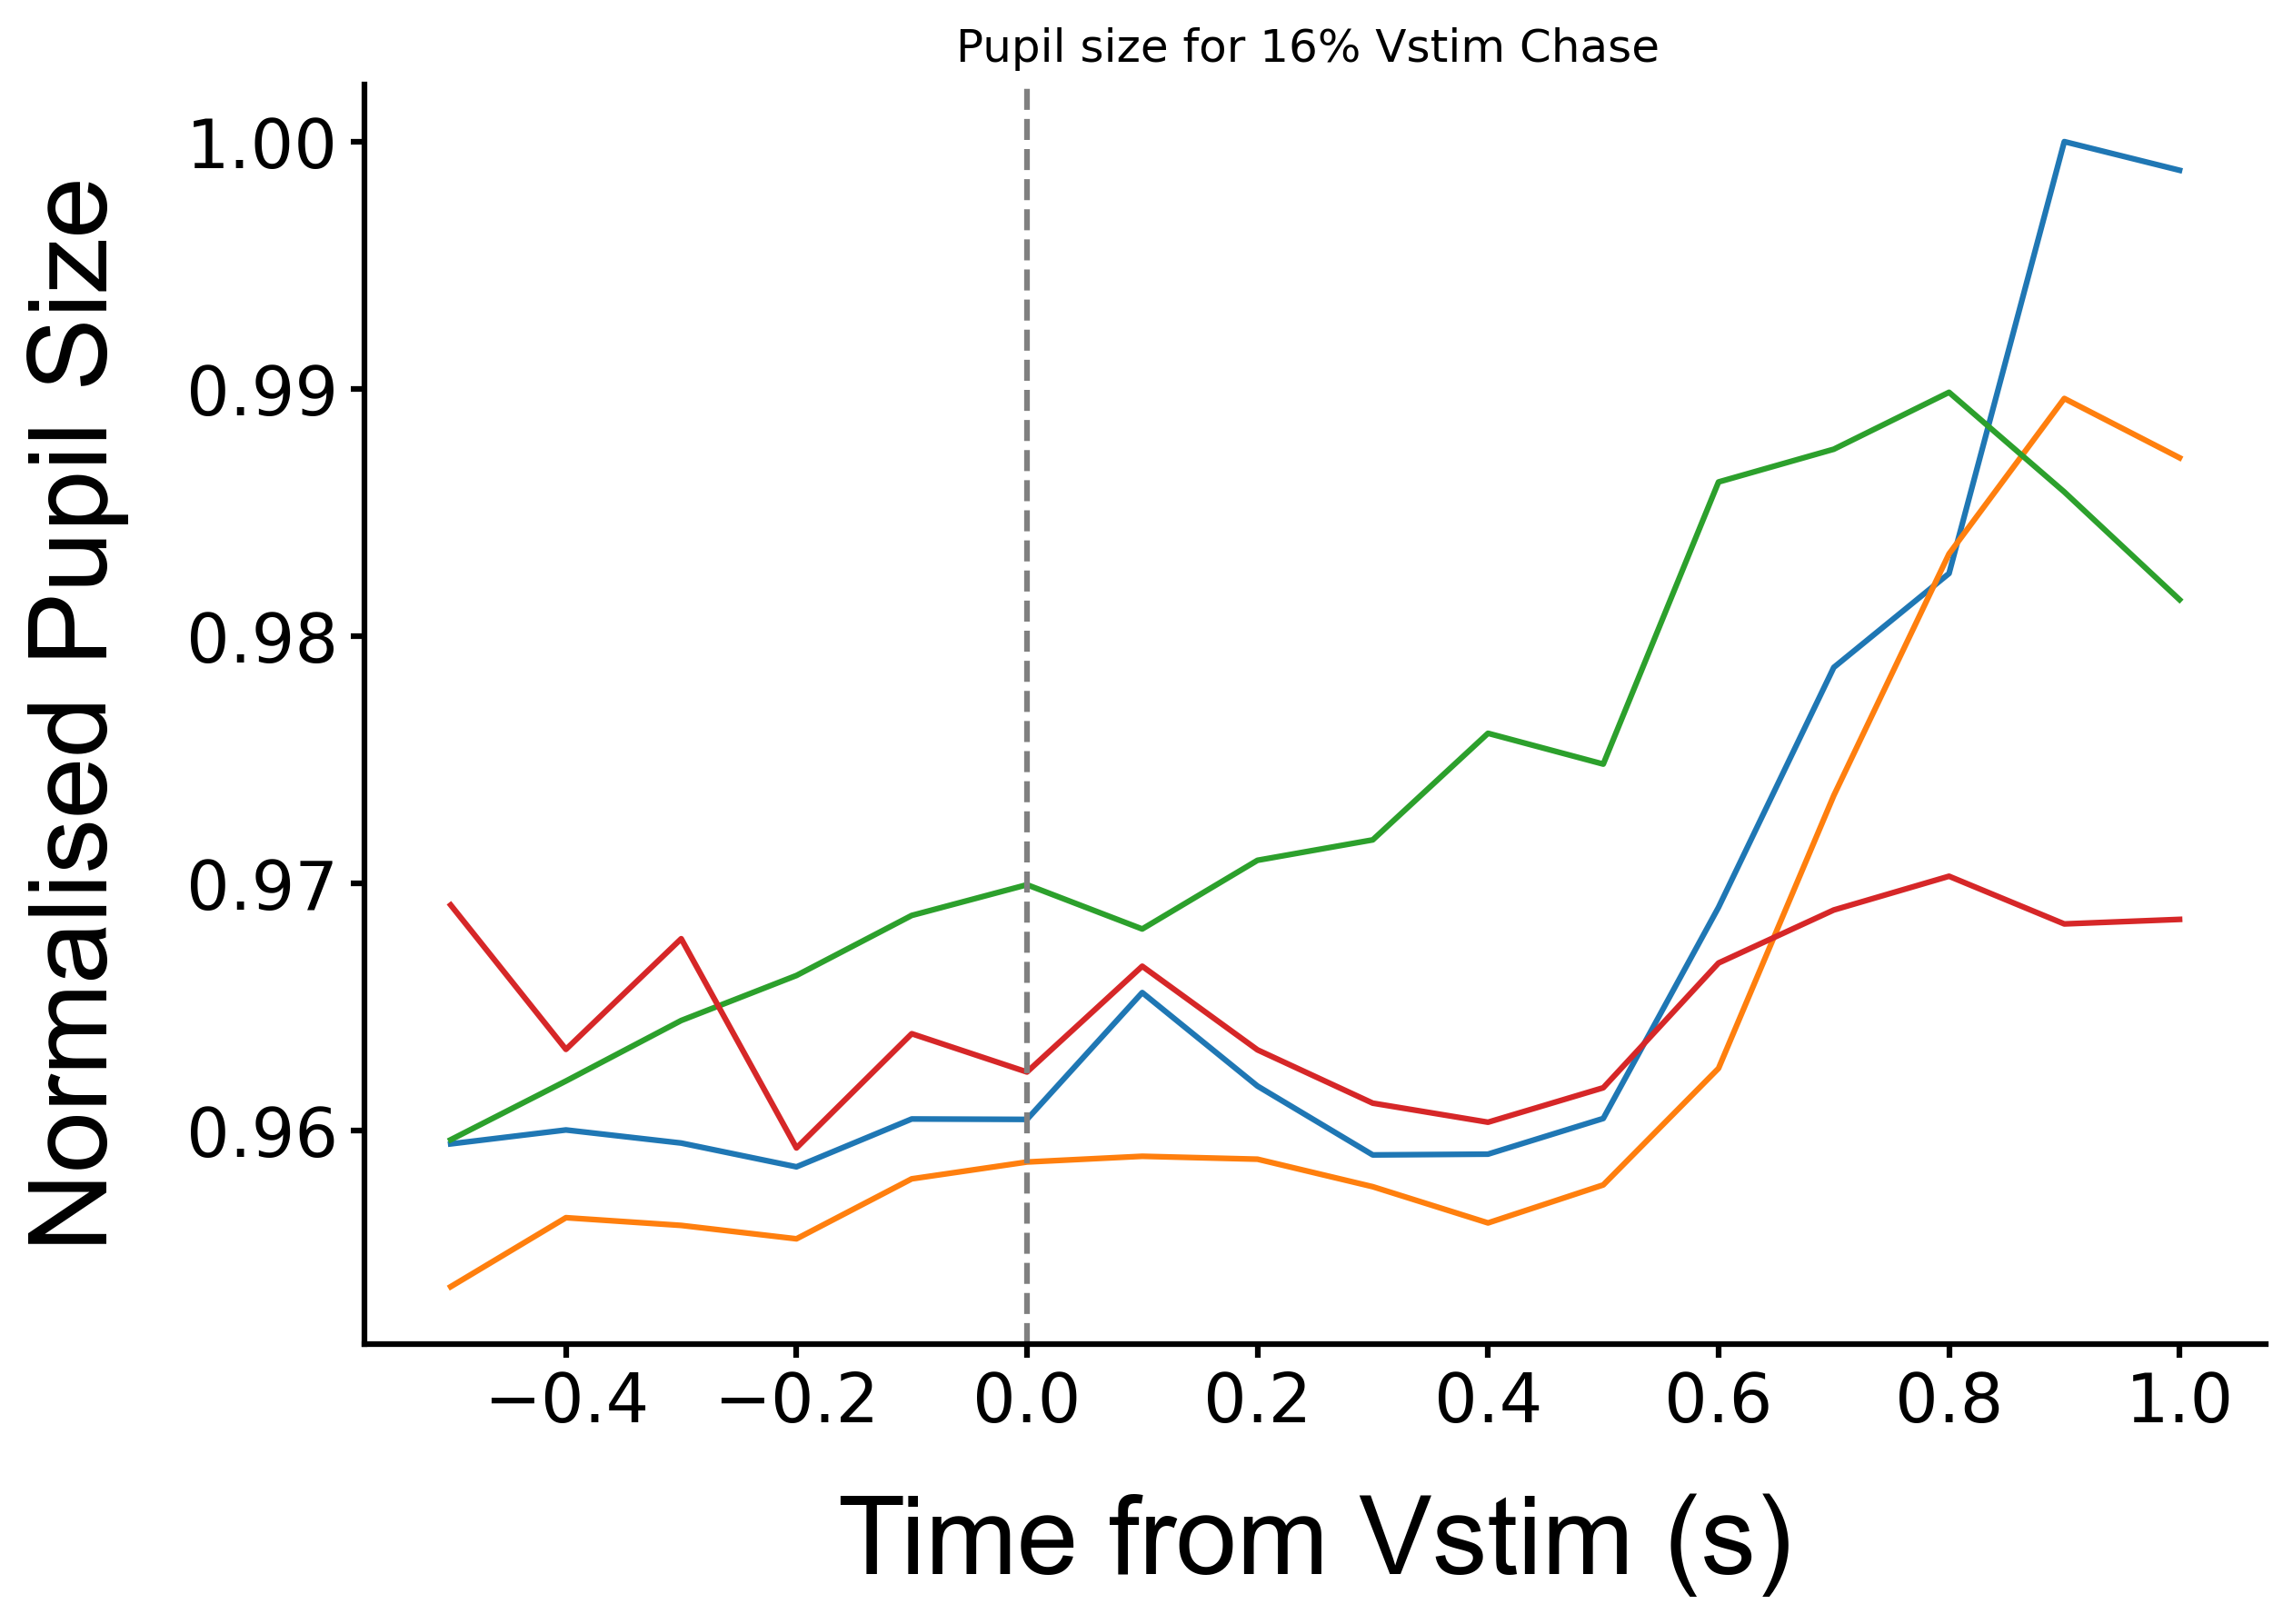

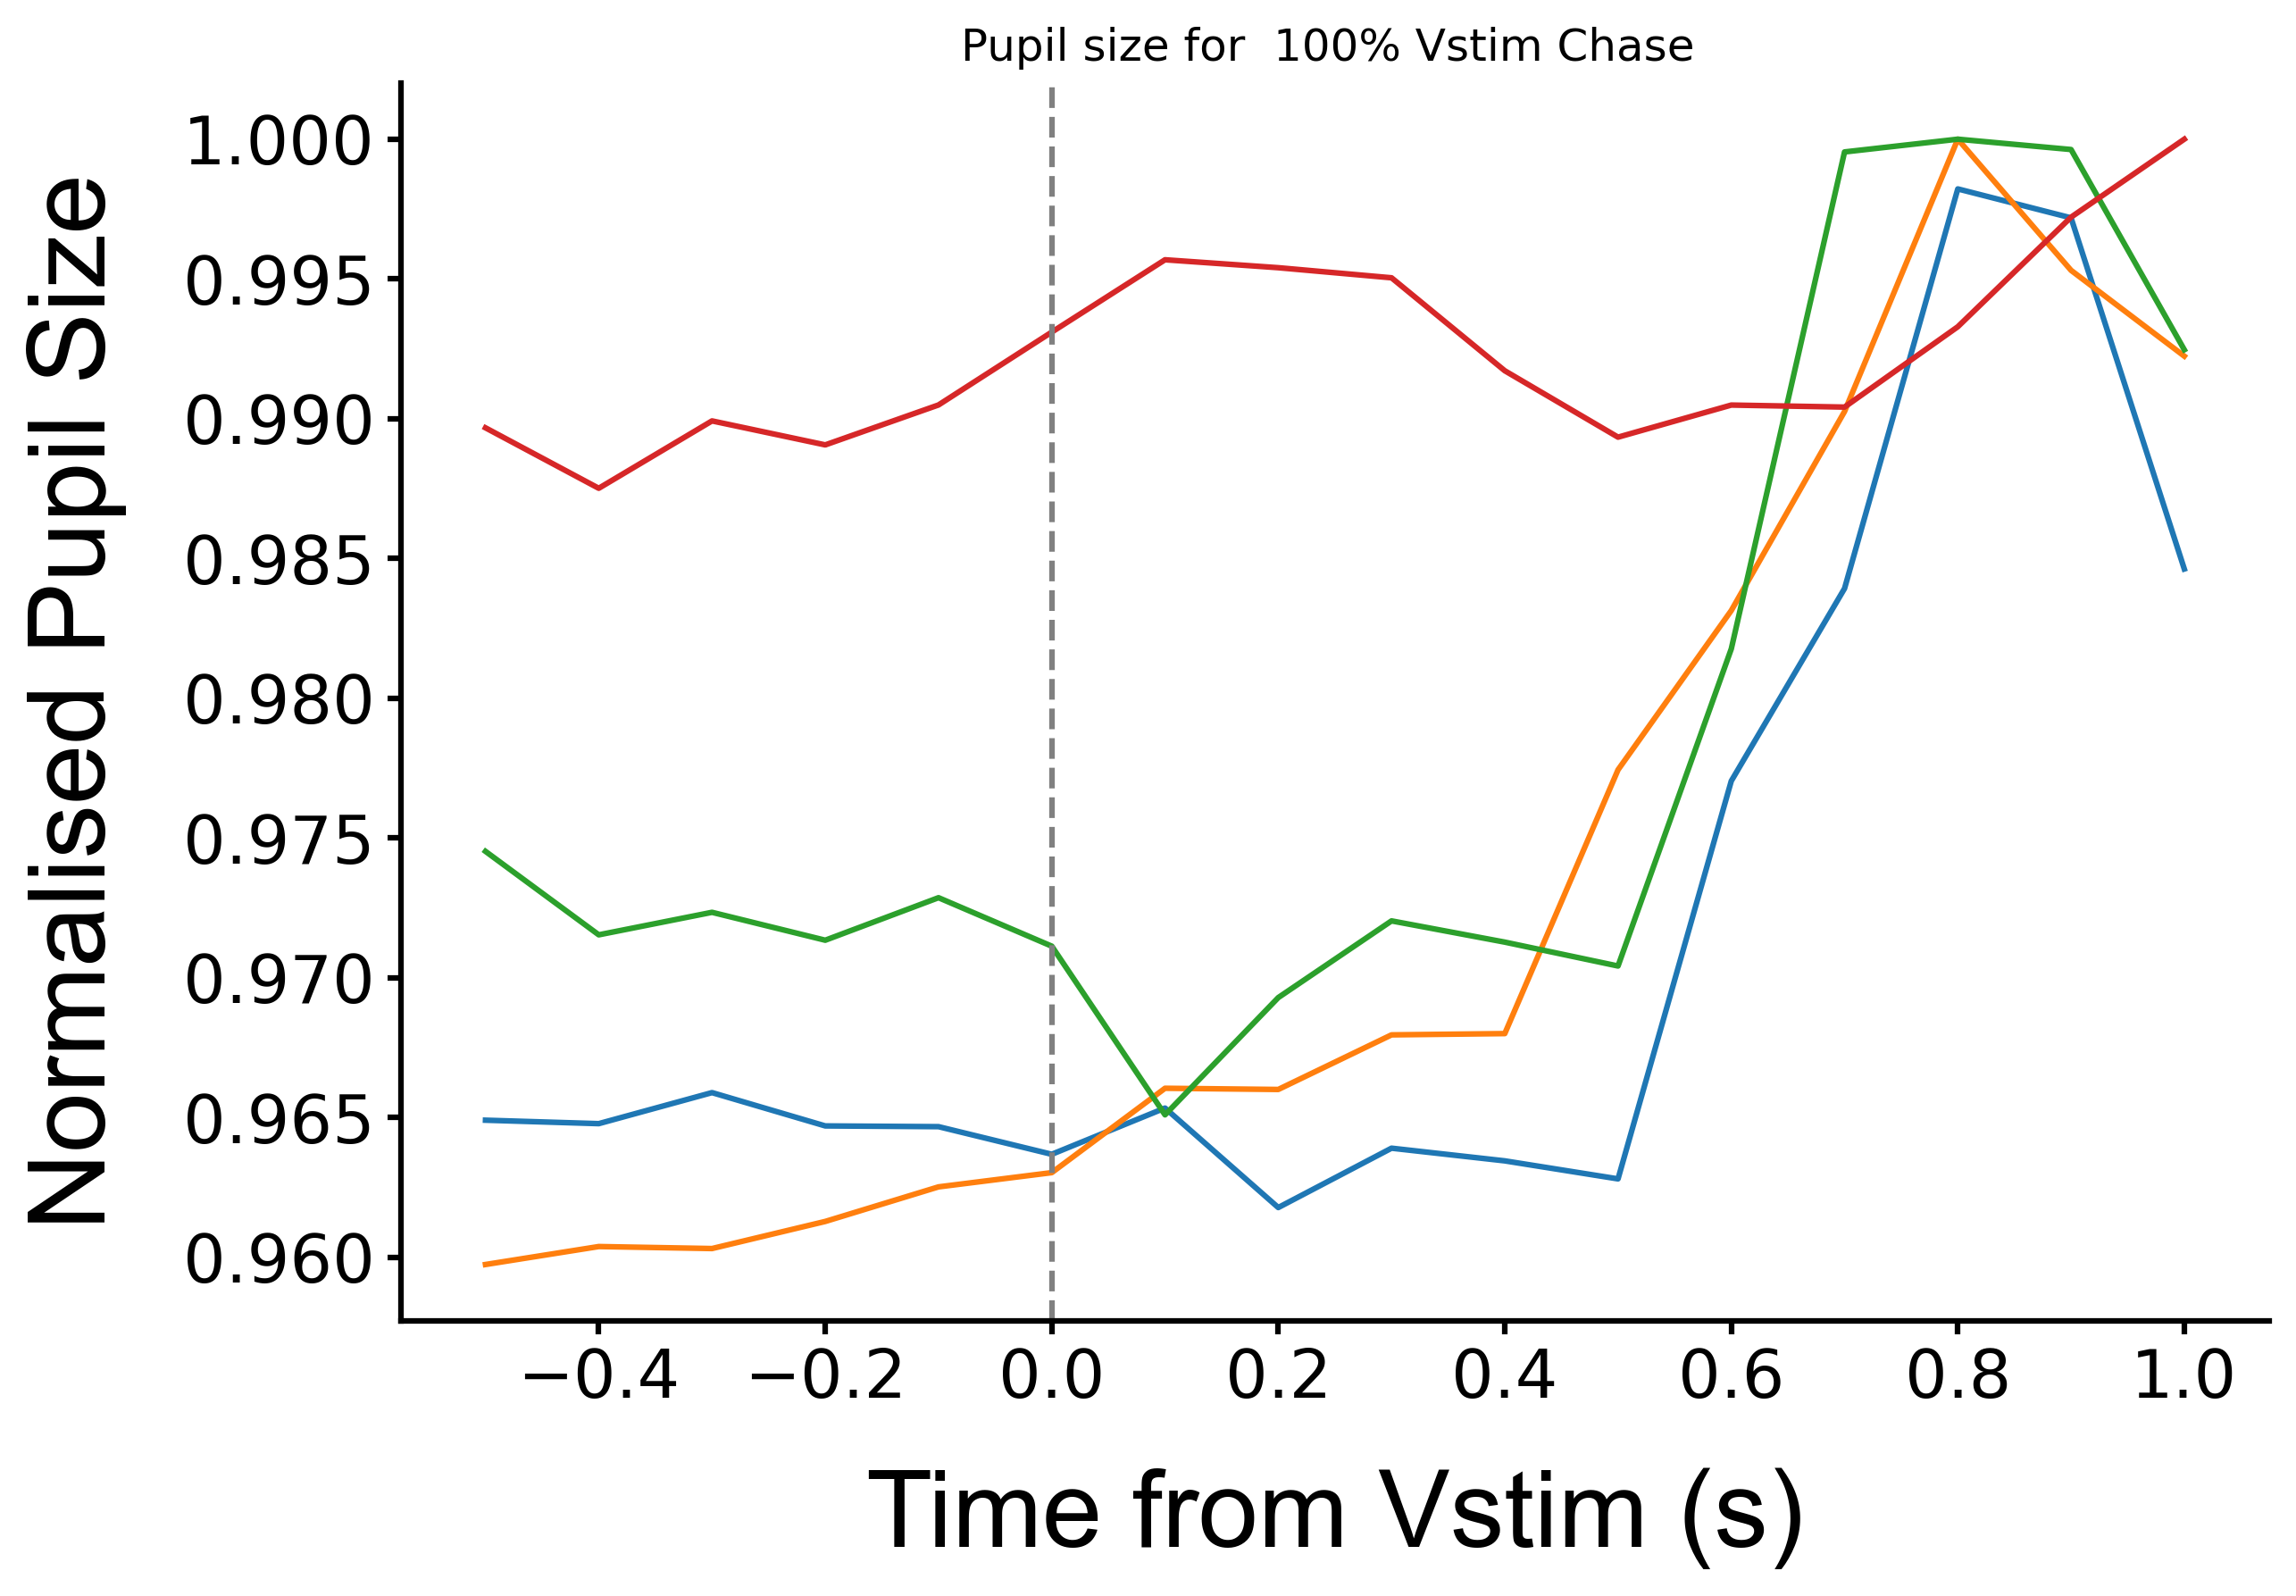

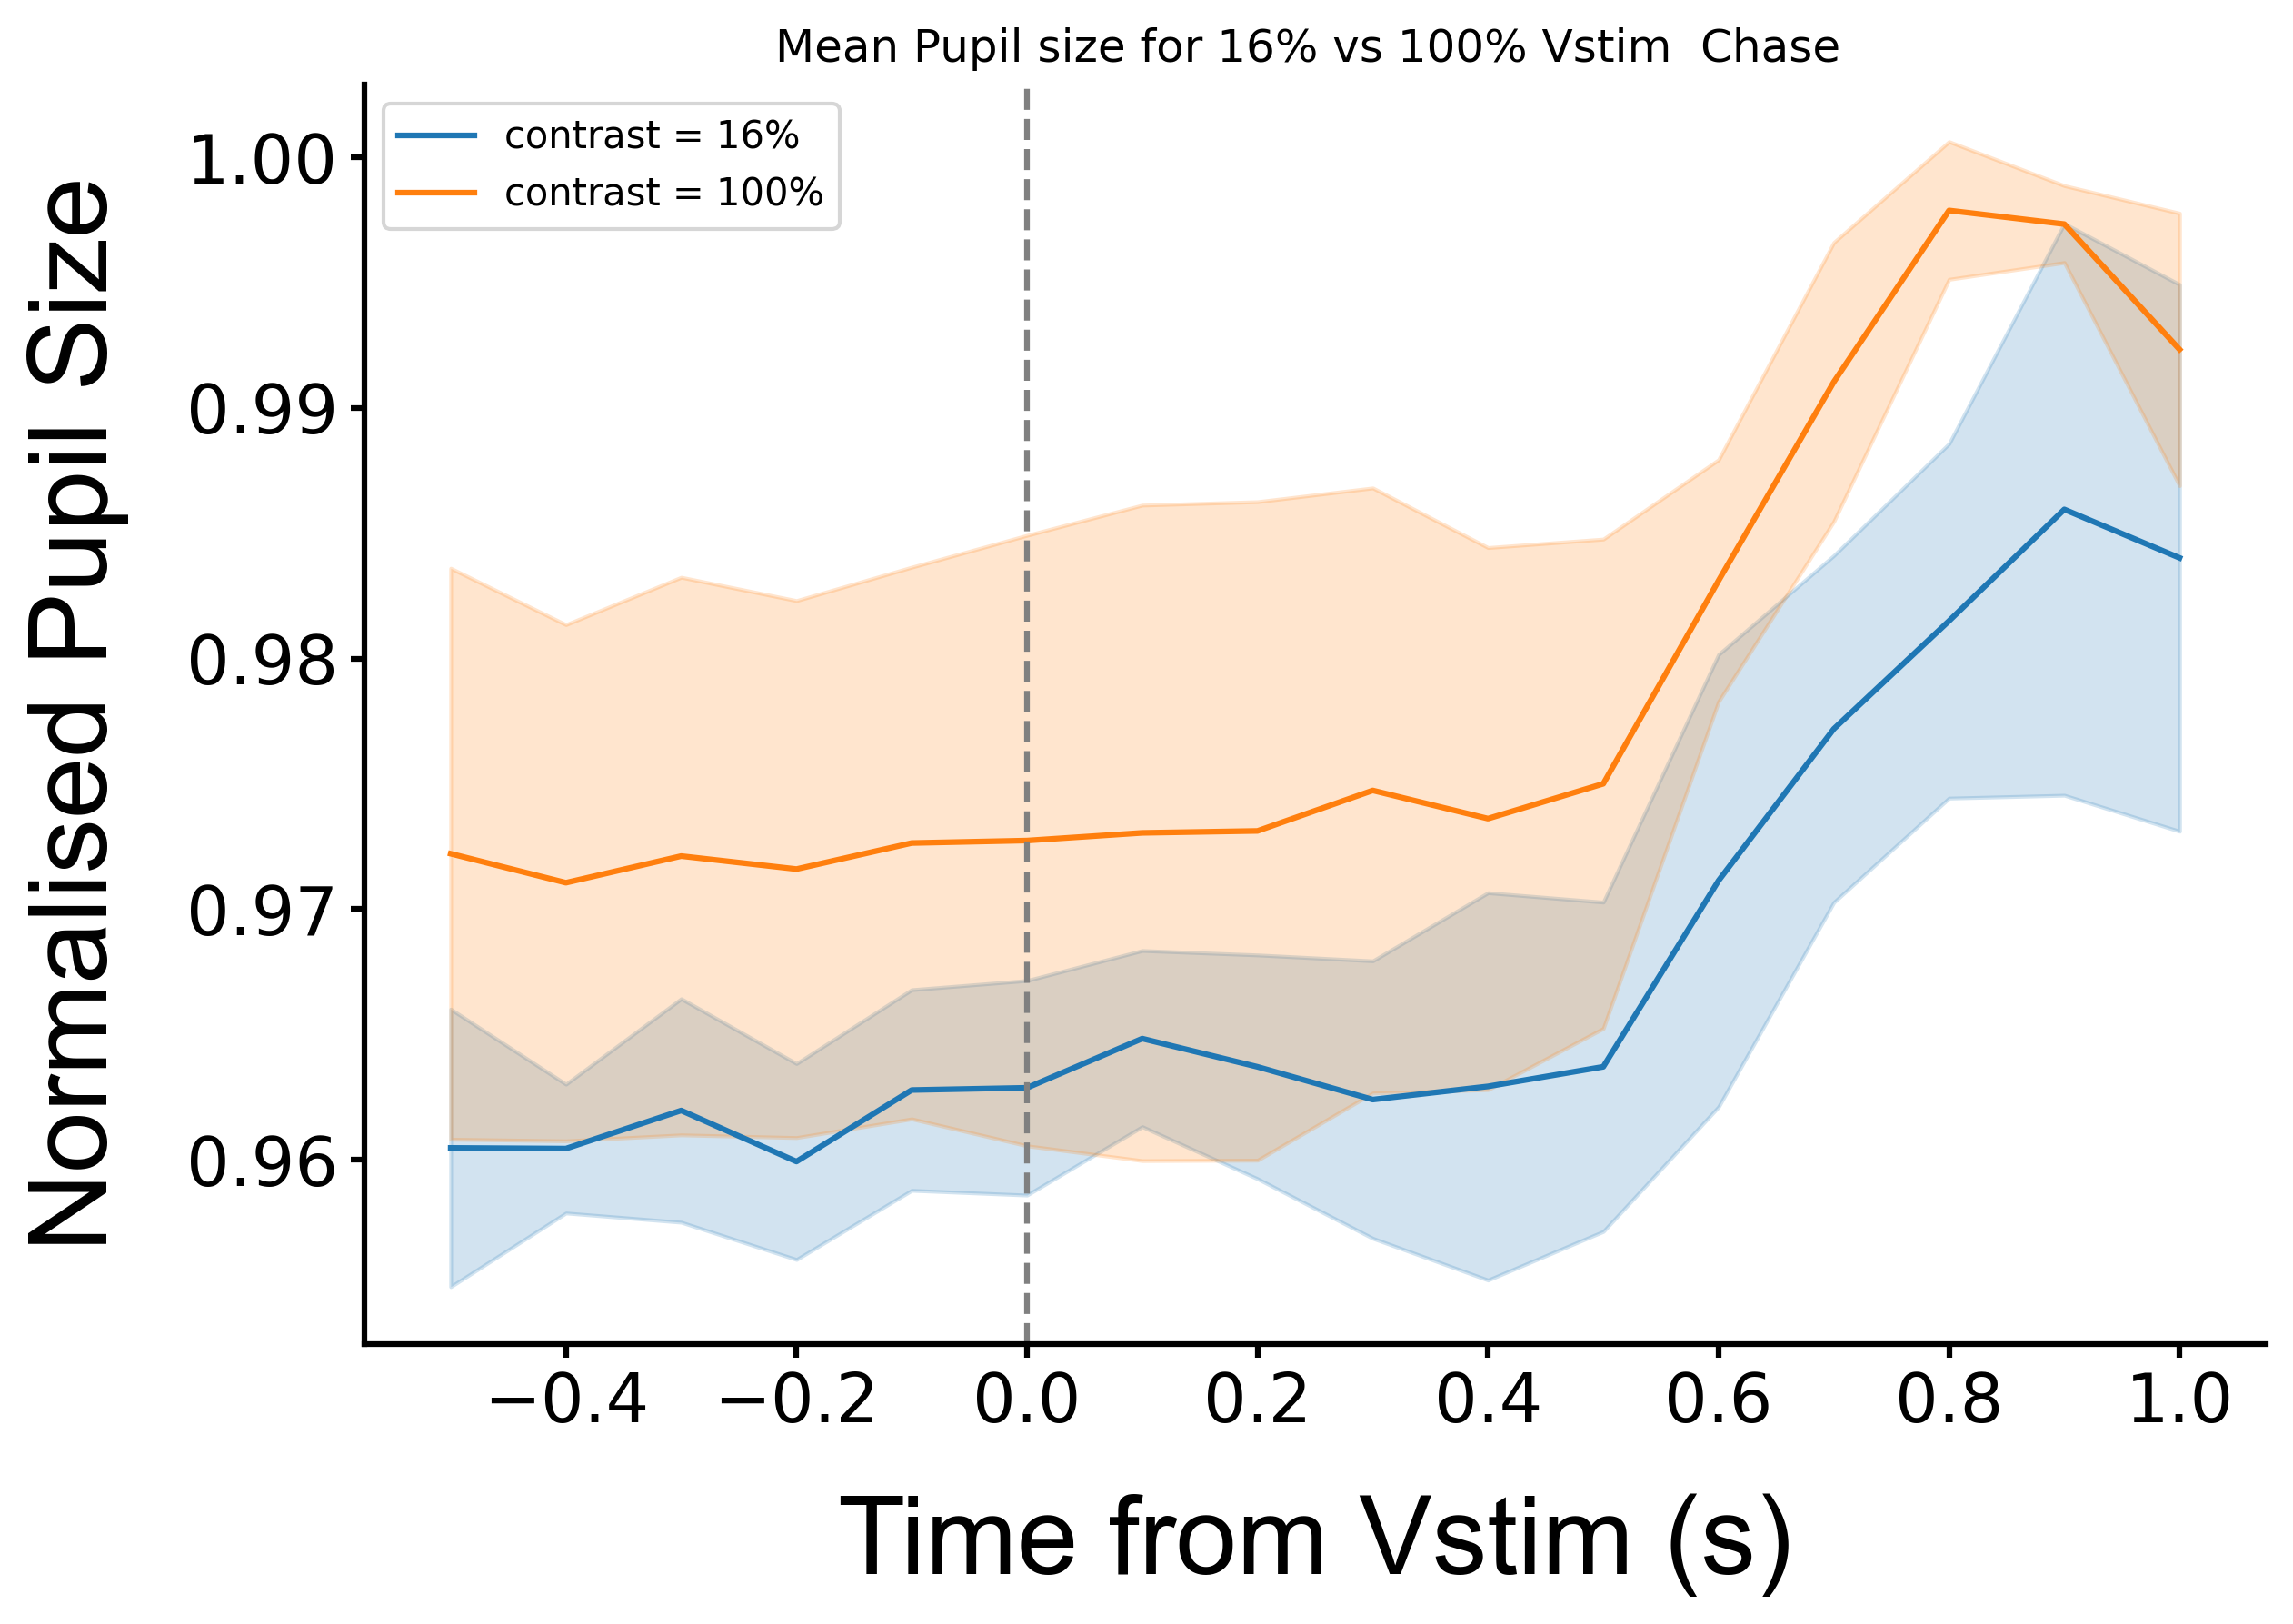

In [71]:
time_before_change = 0.5
duration = 1.5

bin_size = 0.1
time_bins = np.arange(0 - time_before_change, 1.1, bin_size)

dfs = {}  # Dictionary to store DataFrames for each day

# Store mean pupil size for each day
individul_pupil_low = []
individul_pupil_high = []

# plot mean
fig1, ax1 = plt.subplots(dpi=300)
fig2, ax2 = plt.subplots(dpi=300)
fig1.set_size_inches(9,6)
fig2.set_size_inches(9,6)

# Pupil
# Directory where CSV files are located
for day, date, axi in zip(days, dates, axis):
    # Directory where CSV files are located
    directory = f'/Users/zhangpan/MasterProject/{name}/New_Pupil'
    filename_pupil = f'New_Pupil_Data_{date}_Day{day}_{name}.csv'
    file_path = os.path.join(directory, filename_pupil)
    
    # Read CSV file
    df_pupil = pd.read_csv(file_path)
    df_pupil['x'] = df_pupil['x']/100
    df_pupil['y'] = df_pupil['y']/100
    # Store DataFrame in the dictionary with the day as the key
    dfs[day] = df_pupil

    if name == 'Cole': 
        if day == 9:
            df_pupil = df_pupil[df_pupil['x'] >= 1.3]

        elif day == 10:
            ranges = [(1053.1, 1053.4)]

            # Replace pupil diameter with NaN for the specified timestamp ranges
            for start, end in ranges:
                mask = (df_pupil['timestamp'] >= start) & (df_pupil['timestamp'] <= end)
                df_pupil.loc[mask, 'x'] = np.nan
                df_pupil.loc[mask, 'y'] = np.nan

            df_pupil = df_pupil.dropna(subset=['x'])

        elif day == 12:
            ranges = [
                        (79.7,79.9),
                        (410.89, 411.1),
                        (338.4, 338.5),
                        (1029.2, 1029.6),
                        (1487.5, 1487.9)
                    ]
            # Replace pupil diameter with NaN for the specified timestamp ranges
            for start, end in ranges:
                mask = (df_pupil['timestamp'] >= start) & (df_pupil['timestamp'] <= end)
                df_pupil.loc[mask, 'x'] = np.nan
                df_pupil.loc[mask, 'y'] = np.nan

            df_pupil = df_pupil.dropna(subset=['x'])

        else:
            df_pupil = df_pupil

    # Read Trial Vstim Presentation
    directory = f'/Users/zhangpan/MasterProject/{name}/New_Trial_Table'
    filename_vstim = f'New_trial_table_Day{day}_{date}_{name}.csv'
    file_path = os.path.join(directory, filename_vstim)
    df = pd.read_csv(file_path)
    day = int(day)

    #Low
    low_df = df[df['stim_contrast'] == 0.16].reset_index(drop=True)
    start_times_low = low_df['stim_start_time'] - time_before_change 
    end_times_low = start_times_low + duration
    df_start_end_low = pd.DataFrame()
    df_start_end_low['start_time'] = start_times_low
    df_start_end_low['end_time'] = end_times_low
    df_start_end_low = df_start_end_low.iloc[:]

    #High
    high_df = df[df['stim_contrast'] == 1].reset_index(drop=True)
    start_times_high = high_df['stim_start_time'] - time_before_change
    end_times_high = start_times_high + duration
    df_start_end_high = pd.DataFrame()
    df_start_end_high['start_time'] = start_times_high
    df_start_end_high['end_time'] = end_times_high
    df_start_end_high = df_start_end_high.iloc[:]

    # Align pupil to trial time
    # Initialize a list to store interpolated data for each trial
    interpolated_pupil_data_low = []
    interpolated_pupil_data_high = []

    #low
    for index, row in df_start_end_low.iterrows():
        mask = (df_pupil['timestamp'] >= row['start_time']) & (df_pupil['timestamp'] <= row['end_time'])
        filtered_rows = df_pupil.loc[mask].copy()
        filtered_rows['timestamp_diff'] = filtered_rows['timestamp'] - row['start_time']
        filtered_rows['Time from Change'] = filtered_rows['timestamp_diff'] - time_before_change

        if not filtered_rows['y'].empty:  # Check if 'y' values are not empty
            # Interpolate pupil area data for the current trial
            interpolated_values_low = np.interp(time_bins, filtered_rows['Time from Change'], filtered_rows[axi])

            interpolated_pupil_data_low.append(interpolated_values_low)

    # Mean pupil data on single day
    interpolated_data_low = np.mean(interpolated_pupil_data_low, axis=0)

    #high
    for index, row in df_start_end_high.iterrows():
        mask = (df_pupil['timestamp'] >= row['start_time']) & (df_pupil['timestamp'] <= row['end_time'])
        filtered_rows = df_pupil.loc[mask].copy()
        filtered_rows['timestamp_diff'] = filtered_rows['timestamp'] - row['start_time']
        filtered_rows['Time from Change'] = filtered_rows['timestamp_diff'] - time_before_change

        if not filtered_rows['y'].empty:  # Check if 'y' values are not empty
            # Interpolate pupil area data for the current trial
            interpolated_values_high = np.interp(time_bins, filtered_rows['Time from Change'], filtered_rows[axi])

            interpolated_pupil_data_high.append(interpolated_values_high)

    # Mean pupil data on single day
    interpolated_data_high = np.mean(interpolated_pupil_data_high, axis=0)


    # Apply normalization
    max_val_low = np.max(interpolated_data_low)
    max_val_high = np.max(interpolated_data_high)
    if max_val_low > max_val_high:
        normalized_interpolated_data_low = interpolated_data_low /max_val_low
        normalized_interpolated_data_high = interpolated_data_high /max_val_low
    else:
        normalized_interpolated_data_low = interpolated_data_low /max_val_high
        normalized_interpolated_data_high = interpolated_data_high /max_val_high

    ax1.plot(time_bins, normalized_interpolated_data_low)
    ax2.plot(time_bins, normalized_interpolated_data_high)

    # Store mean pupil data in each day
    individul_pupil_low.append(normalized_interpolated_data_low)
    individul_pupil_high.append(normalized_interpolated_data_high)


ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_linewidth(1.5)  # Adjust the width as needed
ax1.spines['left'].set_linewidth(1.5)
ax1.axvline(x=0, color='grey', linestyle='--') # Vstim onset with delay
ax1.set_title(f'Pupil size for 16% Vstim {name} ')
ax1.set_ylabel('Normalised Pupil Size', labelpad=15, size=29, fontweight=1.5, family='Arial')
ax1.set_xlabel('Time from Vstim (s)', labelpad=15, size=29, fontweight=1.5, family='Arial')
ax1.tick_params(axis='x', labelsize=18, width=1.5)
ax1.tick_params(axis='y', labelsize=18, width=1.5)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_linewidth(1.5)  # Adjust the width as needed
ax2.spines['left'].set_linewidth(1.5)
ax2.axvline(x=0, color='grey', linestyle='--') # Vstim onset with delay
ax2.set_title(f'Pupil size for  100% Vstim {name} ')
ax2.set_ylabel('Normalised Pupil Size', labelpad=15, size=29, fontweight=1.5, family='Arial')
ax2.set_xlabel('Time from Vstim (s)', labelpad=15, size=29, fontweight=1.5, family='Arial')
ax2.tick_params(axis='x', labelsize=18, width=1.5)
ax2.tick_params(axis='y', labelsize=18, width=1.5)




# Mean Low in single animal (over 3 sessions)
mean_interpolated_data_low = np.mean(individul_pupil_low, axis=0)

# Calculate standard deviation of interpolated_data over time bins
std_interpolated_data_low = np.std(individul_pupil_low, axis=0)
median_interpolated_data_low = np.median(individul_pupil_low, axis=0)


# Mean high in single animal 
mean_interpolated_data_high = np.mean(individul_pupil_high, axis=0)

# Calculate standard deviation of interpolated_data over time bins
std_interpolated_data_high = np.std(individul_pupil_high, axis=0)
median_interpolated_data_high = np.median(individul_pupil_high, axis=0)
print(time_bins)
print(f'{name} mean 16% fl_latency distribution is {mean_interpolated_data_low}')
print(f'{name} mean 100% fl_latency distribution is {mean_interpolated_data_high}')
print(f'{name} std 16% fl_latency distribution is {std_interpolated_data_low}')
print(f'{name} std 100% fl_latency distribution is {std_interpolated_data_high}')

# plot mean
fig, ax = plt.subplots(dpi=300)
fig.set_size_inches(9,6)

# Plot the mean of interpolated_data over time bins
ax.plot(time_bins, mean_interpolated_data_low, color='#1f77b4', label='contrast = 16%') #blue Hit
ax.plot(time_bins, mean_interpolated_data_high, color='#ff7f0e', label='contrast = 100%') # Orange miss


# Shade between the error bars
ax.fill_between(time_bins, mean_interpolated_data_low - std_interpolated_data_low, mean_interpolated_data_low + std_interpolated_data_low, color='#1f77b4', alpha=0.2) # Blue hit
ax.fill_between(time_bins, mean_interpolated_data_high - std_interpolated_data_high, mean_interpolated_data_high + std_interpolated_data_high, color='#ff7f0e', alpha=0.2) # Orange miss

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)  # Adjust the width as needed
ax.spines['left'].set_linewidth(1.5)

# ax.set_ylim(2,2.6)
# ax.set_ylim(1,1.6)

ax.axvline(x=0, color='grey', linestyle='--') # Vstim onset with delay
ax.set_title(f'Mean Pupil size for 16% vs 100% Vstim  {name} ')
ax.set_ylabel('Normalised Pupil Size', labelpad=15, size=29, fontweight=1.5, family='Arial')
ax.set_xlabel('Time from Vstim (s)', labelpad=15, size=29, fontweight=1.5, family='Arial')
ax.tick_params(axis='x', labelsize=18, width=1.5)
ax.tick_params(axis='y', labelsize=18, width=1.5)
ax.legend()

## Group 16% vs 100% pupil (Figure 3d)

In [3]:
Cole_low_fl = [0.95864107, 0.95850906, 0.95789934, 0.95853669, 0.96117454, 0.96241225,
 0.96069103, 0.95906988, 0.95834145, 0.96237485, 0.97836003, 0.99478026]

Cole_high_fl = [0.9577566,  0.95651107, 0.9556074,  0.95391178, 0.9535996,  0.95526755,
 0.95386715, 0.95404104, 0.95526986, 0.96271914, 0.98039386, 0.99286694,
 0.99361343, 0.97934114, 0.97069791, 0.964457 ]

Calvin_low_fl = [0.951441,   0.94961165, 0.94754554, 0.94579854, 0.94708807, 0.9485246,
 0.9505063,  0.9504028,  0.94727394, 0.9495479,  0.94991404, 0.96377759,
 0.97122392, 0.97017078, 0.95920287, 0.95232062]

Calvin_high_fl = [0.95814832, 0.96506285, 0.96555121, 0.96796966, 0.96583102, 0.96490444,
 0.96362855, 0.96613693, 0.96711492, 0.97208803, 0.9805441,  0.98553105,
 0.99473056, 0.98643586, 0.98185106, 0.97623846]

Chase_low_fl = [0.96047132, 0.96044407, 0.96196427, 0.95992768, 0.96278068, 0.96286963,
 0.96483252, 0.96370651, 0.96239949, 0.96292611, 0.9637082,  0.97113677,
 0.97718934, 0.9815002,  0.98594862, 0.98401527]

Chase_high_fl = [0.97221033, 0.97105293, 0.97211635, 0.9715969,  0.97263698, 0.97273532,
 0.9730418,  0.97311886, 0.97473385, 0.97361048, 0.97500114, 0.98310794,
 0.99103552, 0.99787764, 0.9973332,  0.99233214]

time_bins = [-5.00000000e-01, -4.00000000e-01, -3.00000000e-01, -2.00000000e-01,
 -1.00000000e-01, -1.11022302e-16,  1.00000000e-01,  2.00000000e-01,
  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,  6.00000000e-01,
  7.00000000e-01,  8.00000000e-01,  9.00000000e-01,  1.00000000e+00]

group_low = [Cole_low_fl, Calvin_low_fl, Chase_low_fl]
group_high = [Cole_high_fl, Calvin_high_fl, Chase_high_fl]


means 16% [0.9589521399999998, 0.9482969600000001, 0.961117604]
means 100% [0.9554772899999999, 0.964512612, 0.971922698]


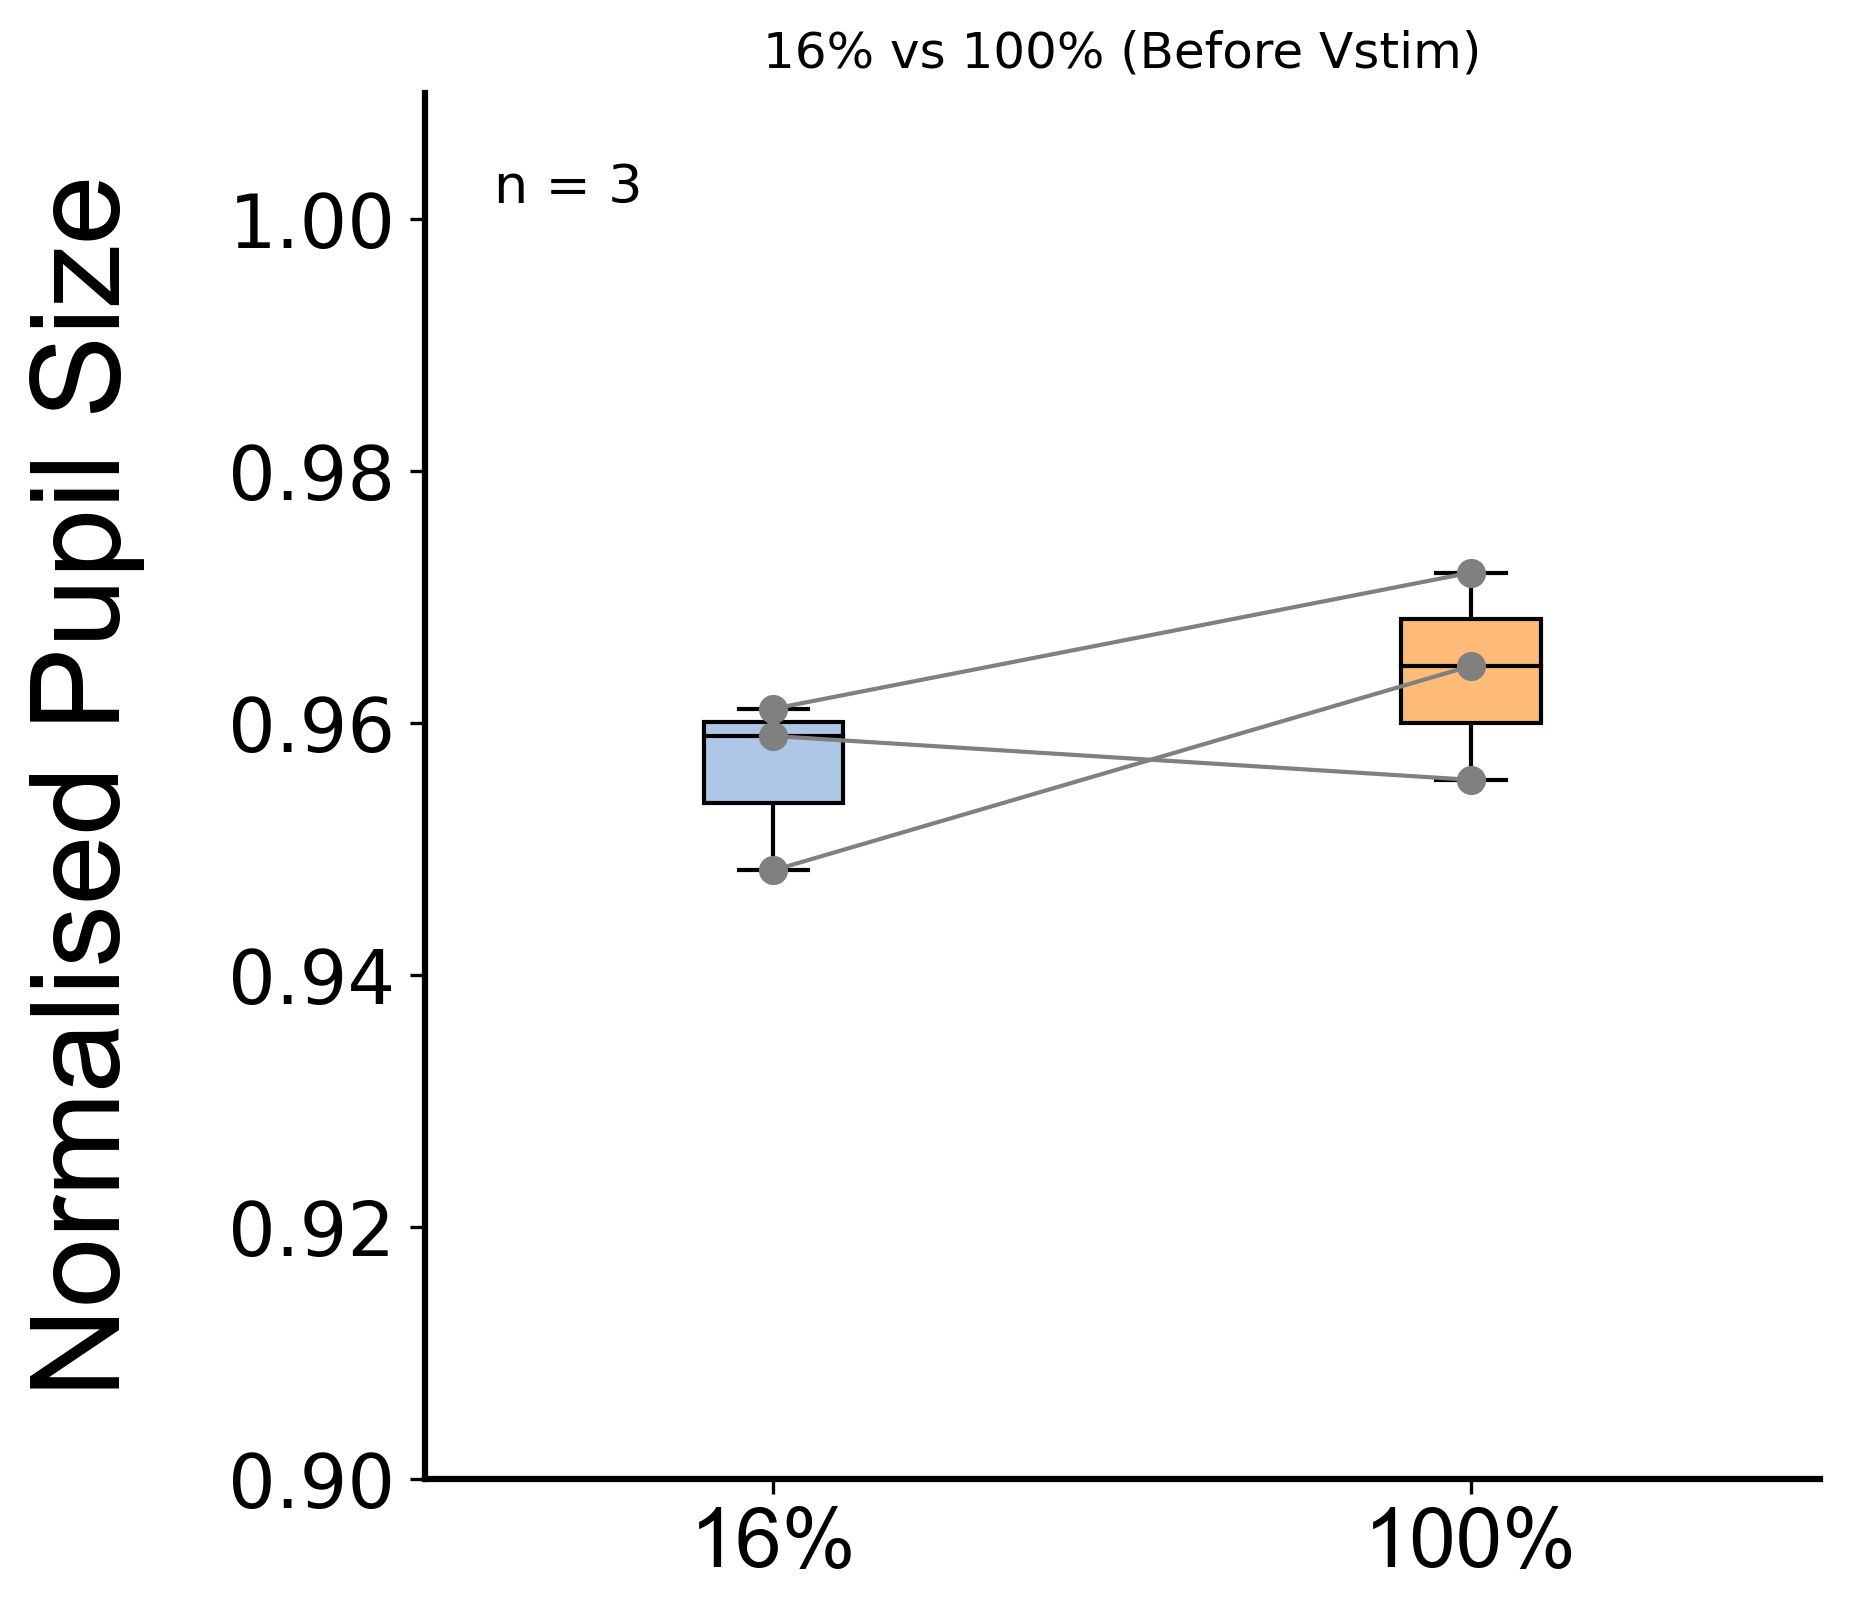

In [4]:
# Spontaneous Pupil 16% vs 100%

group_low = [Cole_low_fl, Calvin_low_fl, Chase_low_fl]
group_high = [Cole_high_fl, Calvin_high_fl, Chase_high_fl]

# Calculate mean pupil size in 0.5s before 16% and 100% trial
means_low = []
means_high = []
for data in group_low:
    means_low.append(np.mean(data[0:5]))
for data in group_high:
    means_high.append(np.mean(data[0:5]))


fig, ax = plt.subplots(dpi=300)
fig.set_size_inches(6, 6)

# Organize data for box plot
data = [means_low, means_high]
positions = [1, 2]
bp = ax.boxplot(data, positions=positions, widths=0.2, patch_artist=True, medianprops=dict(color='black'), zorder=1)

# Set colors for the boxes
colors = ['#aec7e8','#ffbb78']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Plot paired dots and connect them
for i, (low, high) in enumerate(zip(means_low, means_high)):
    ax.plot(positions, [low, high], marker='o', linestyle='-', color='gray', linewidth=1, zorder=2)


# Customize the plot
ax.set_title('16% vs 100% (Before Vstim)')

ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)

ax.set_xlabel('', labelpad=10, size=30, family='Arial')
ax.set_ylabel('Normalised Pupil Size', labelpad=20, size=30, family='Arial')

ax.set_ylim(0.9, 1.01)

ax.set_xticks(positions)
ax.set_xticklabels(['16%', '100%'], size=20, family='Arial')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)  # Adjust the width as needed
ax.spines['left'].set_linewidth(1.5)

ax.text(0.05, 0.95, f'n = 3', fontsize=13, ha='left', va='top', transform=ax.transAxes)

print(f'means 16% {means_low}')
print(f'means 100% {means_high}')

In [6]:
mean_group_low = np.mean(means_low)
mean_group_high = np.mean(means_high)


std_group_low = np.std(means_low)
std_group_high = np.std(means_high)

sem_group_low = std_group_low / np.sqrt(3)
sem_group_high = std_group_high / np.sqrt(3)

print(f'mean_group_low is {mean_group_low}')
print(f'mean_group_high is {mean_group_high}')

print(f'sem_group_low is {sem_group_low}')
print(f'sem_group_high is {sem_group_high}')

mean_group_low is 0.9561222346666667
mean_group_high is 0.9639708666666666
sem_group_low is 0.0032351713432351398
sem_group_high is 0.003882524295588512


In [7]:
from scipy.stats import wilcoxon

# Perform the Wilcoxon signed-rank test on the normalized data
stat, p_value = wilcoxon(means_low, means_high)

# Output the test result
print(f'Wilcoxon signed-rank test statistic: {stat}, p-value: {p_value}')

Wilcoxon signed-rank test statistic: 1.0, p-value: 0.5


In [14]:
from scipy.stats import mannwhitneyu

# Perform the Mann-Whitney U test
u_stat, p_value = mannwhitneyu(means_low, means_high)

print(f'U-statistic: {u_stat}')
print(f'P-value: {p_value}')

if p_value < 0.05:
    print('The two groups are significantly different.')
else:
    print('The two groups are not significantly different.')

U-statistic: 2.0
P-value: 0.4
The two groups are not significantly different.


# Pupil size vs fl_latency (Figure 3c)

## Individual

In [19]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

name = 'Cole'
days = [9,10,12,13]
dates = ['01052024','02052024','06052024','07052024']
axis = ['x','y','y','y']

# name = 'Chase'
# days = [7,8,9,10]
# dates = ['30042024','01052024','02052024','03052024']
# axis = ['y','y','y','y']

# name = 'Calvin'
# days = [7,8,9]
# dates = ['30042024','01052024','02052024']
# axis = ['x','y','y']

Coefficients of the best fit line for low contrast Calvin Day 7: 0.012803852733366355
Coefficients of the best fit line for high contrast Calvin Day 7: 0.08251975124992482
Coefficients of the best fit line for low contrast Calvin Day 8: -0.012089385769433459
Coefficients of the best fit line for high contrast Calvin Day 8: -0.13809736300502035


/var/folders/48/5d2p83yj3zqbry1wm4glp6p40000gn/T/ipykernel_1728/3282660230.py:219: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  individual_low_fl = np.array(individual_low_fl)
/var/folders/48/5d2p83yj3zqbry1wm4glp6p40000gn/T/ipykernel_1728/3282660230.py:220: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  individual_high_fl = np.array(individual_high_fl)
/var/folders/48/5d2p83yj3zqbry1wm4glp6p40000gn/T/ipykernel_1728/3282660230.py:222: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tup

Coefficients of the best fit line for low contrast Calvin Day 9: -0.0062652487093873095
Coefficients of the best fit line for high contrast Calvin Day 9: 0.15943519878941007
Calvin mean_coeff_low is -0.001850260581818138
Calvin mean_coeff_high is 0.03461919567810485


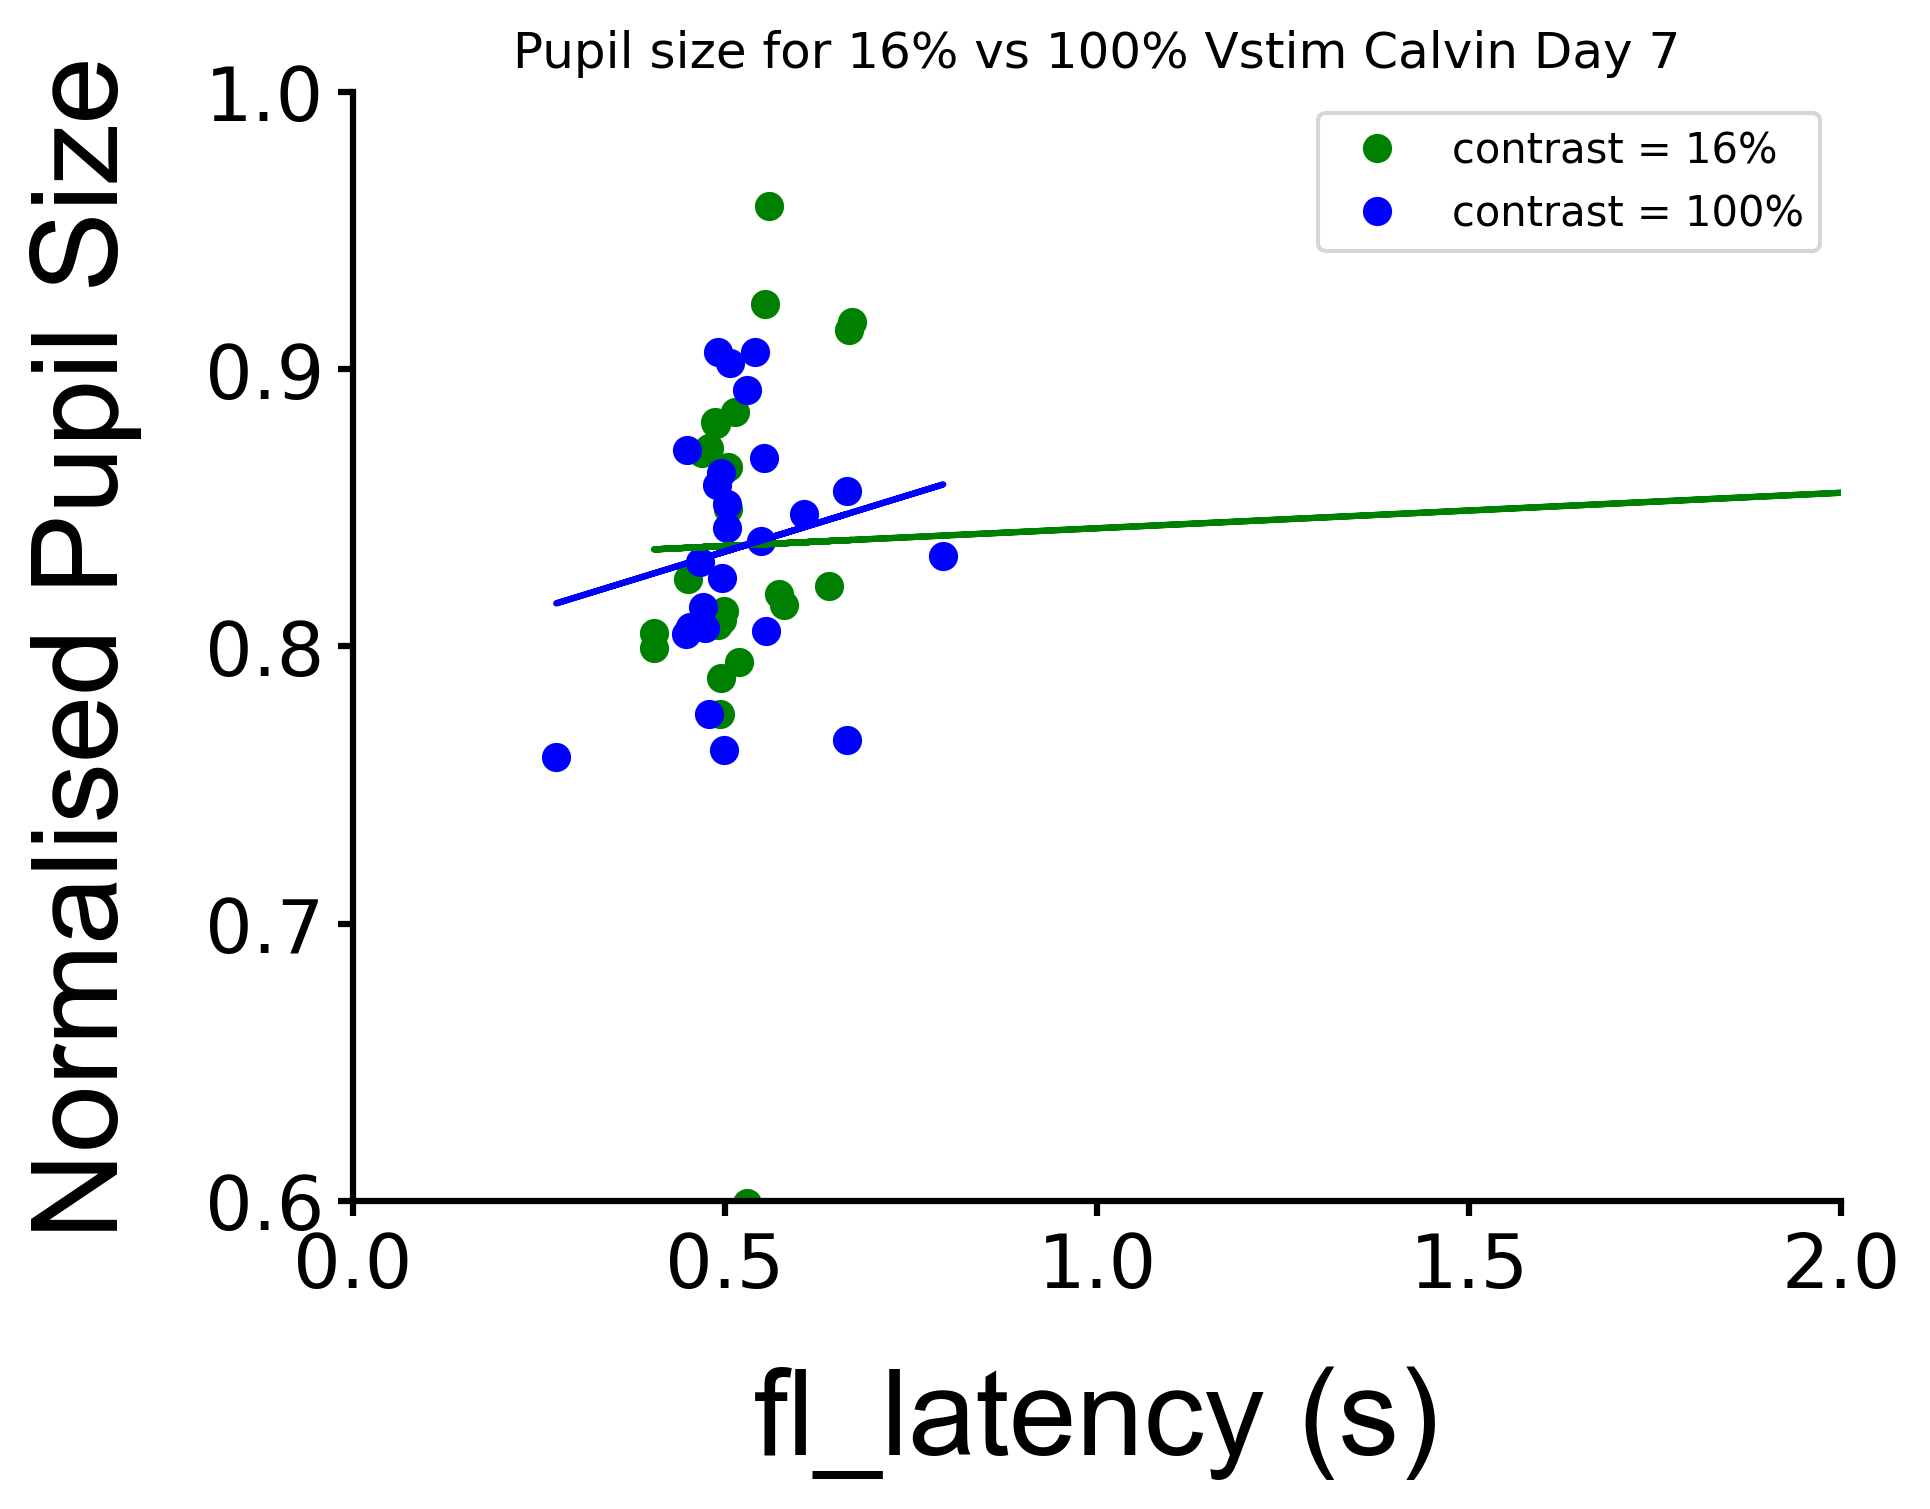

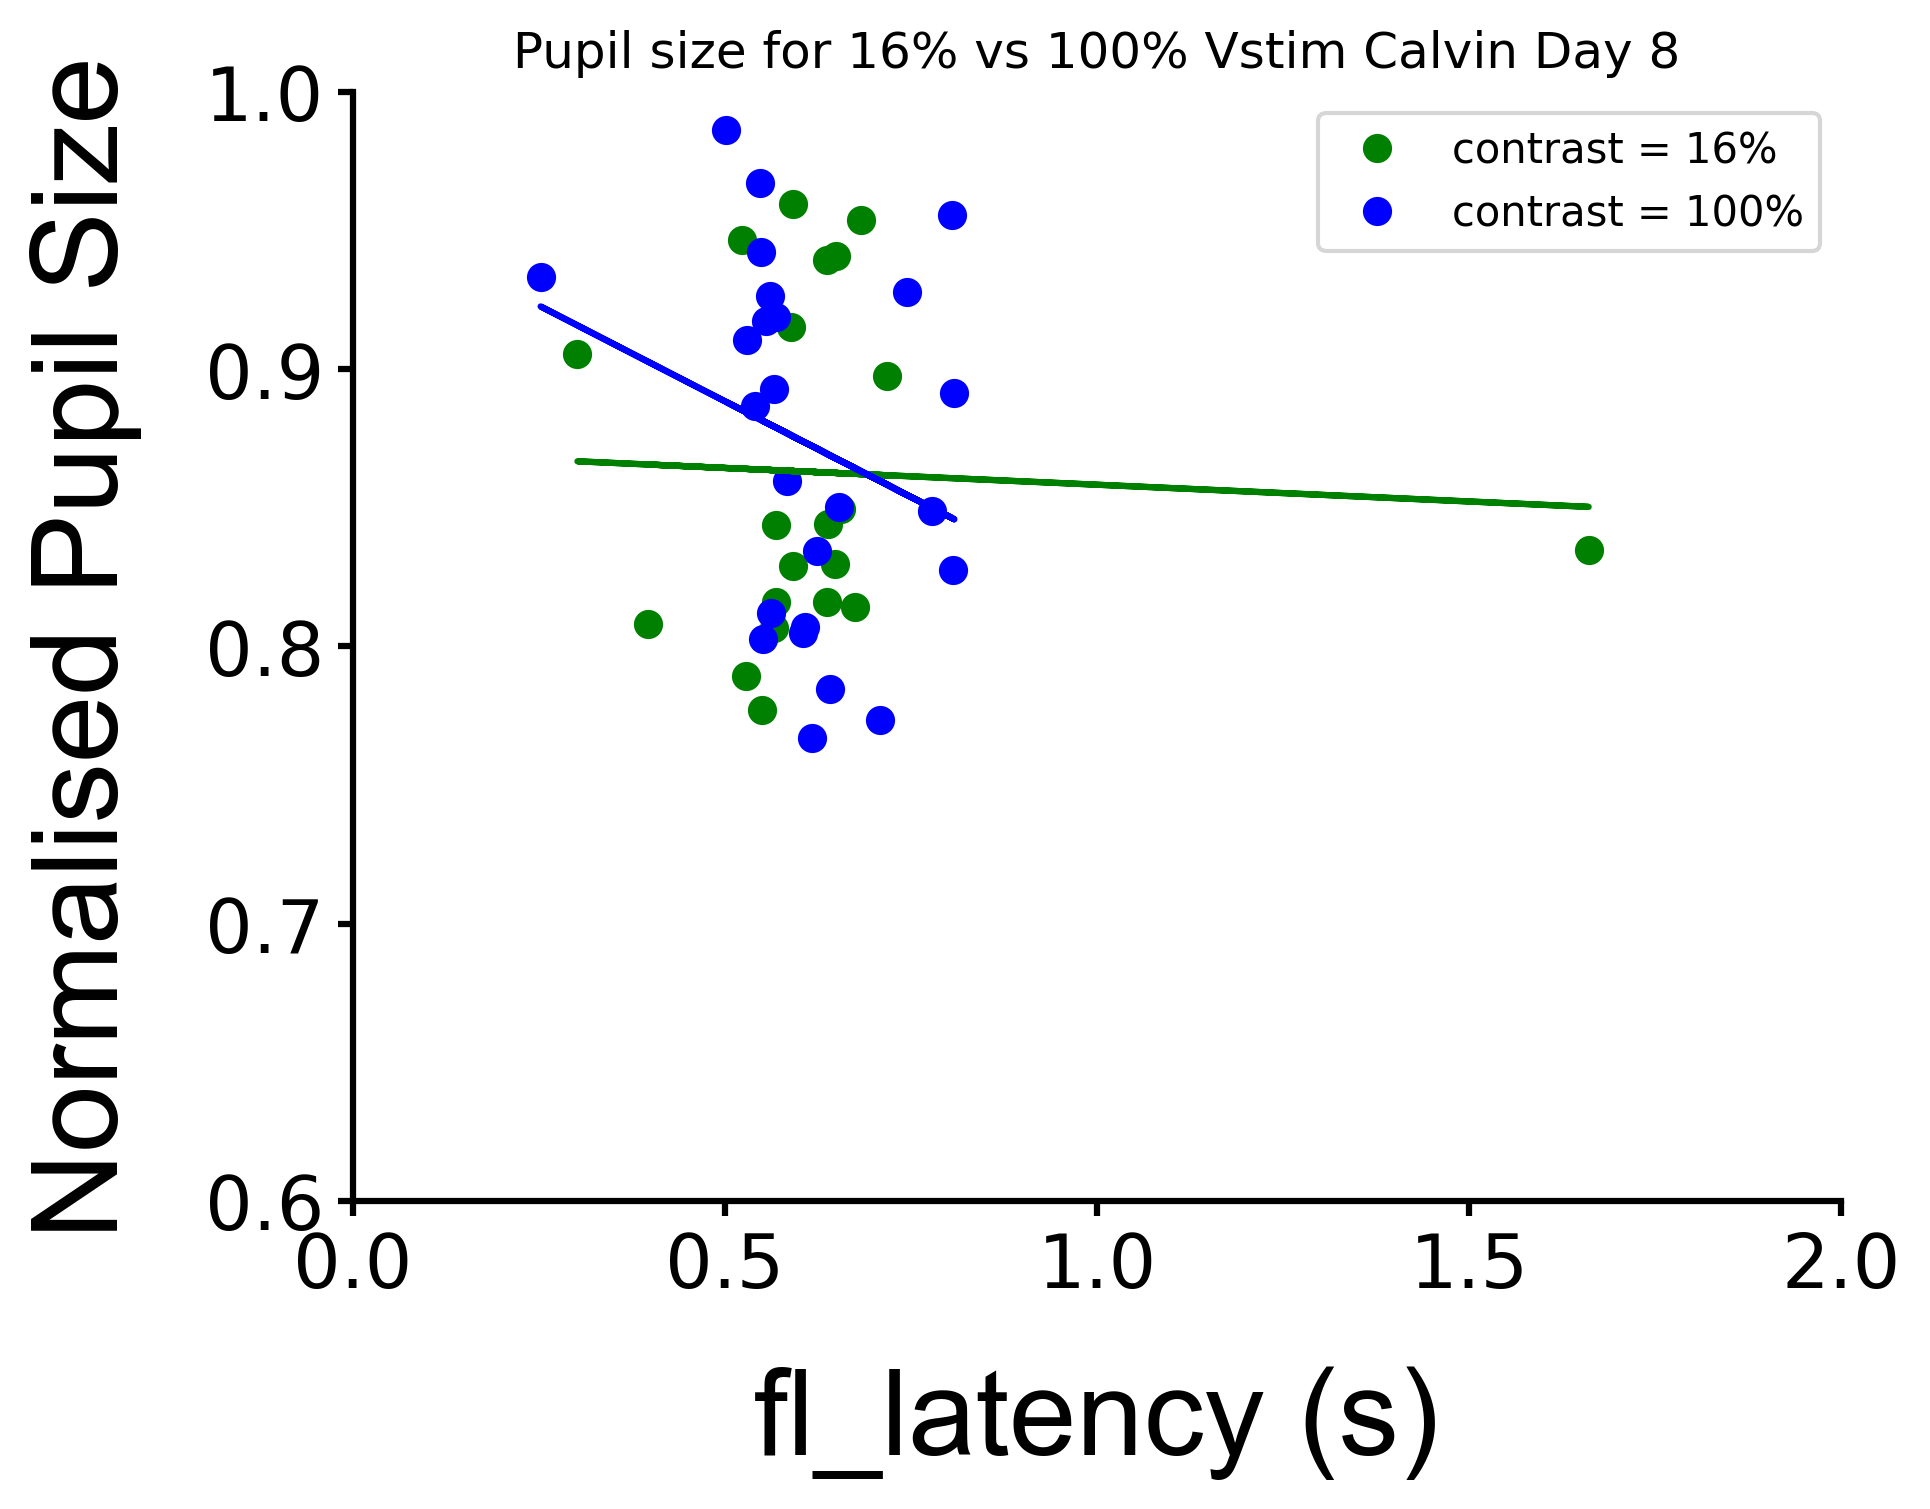

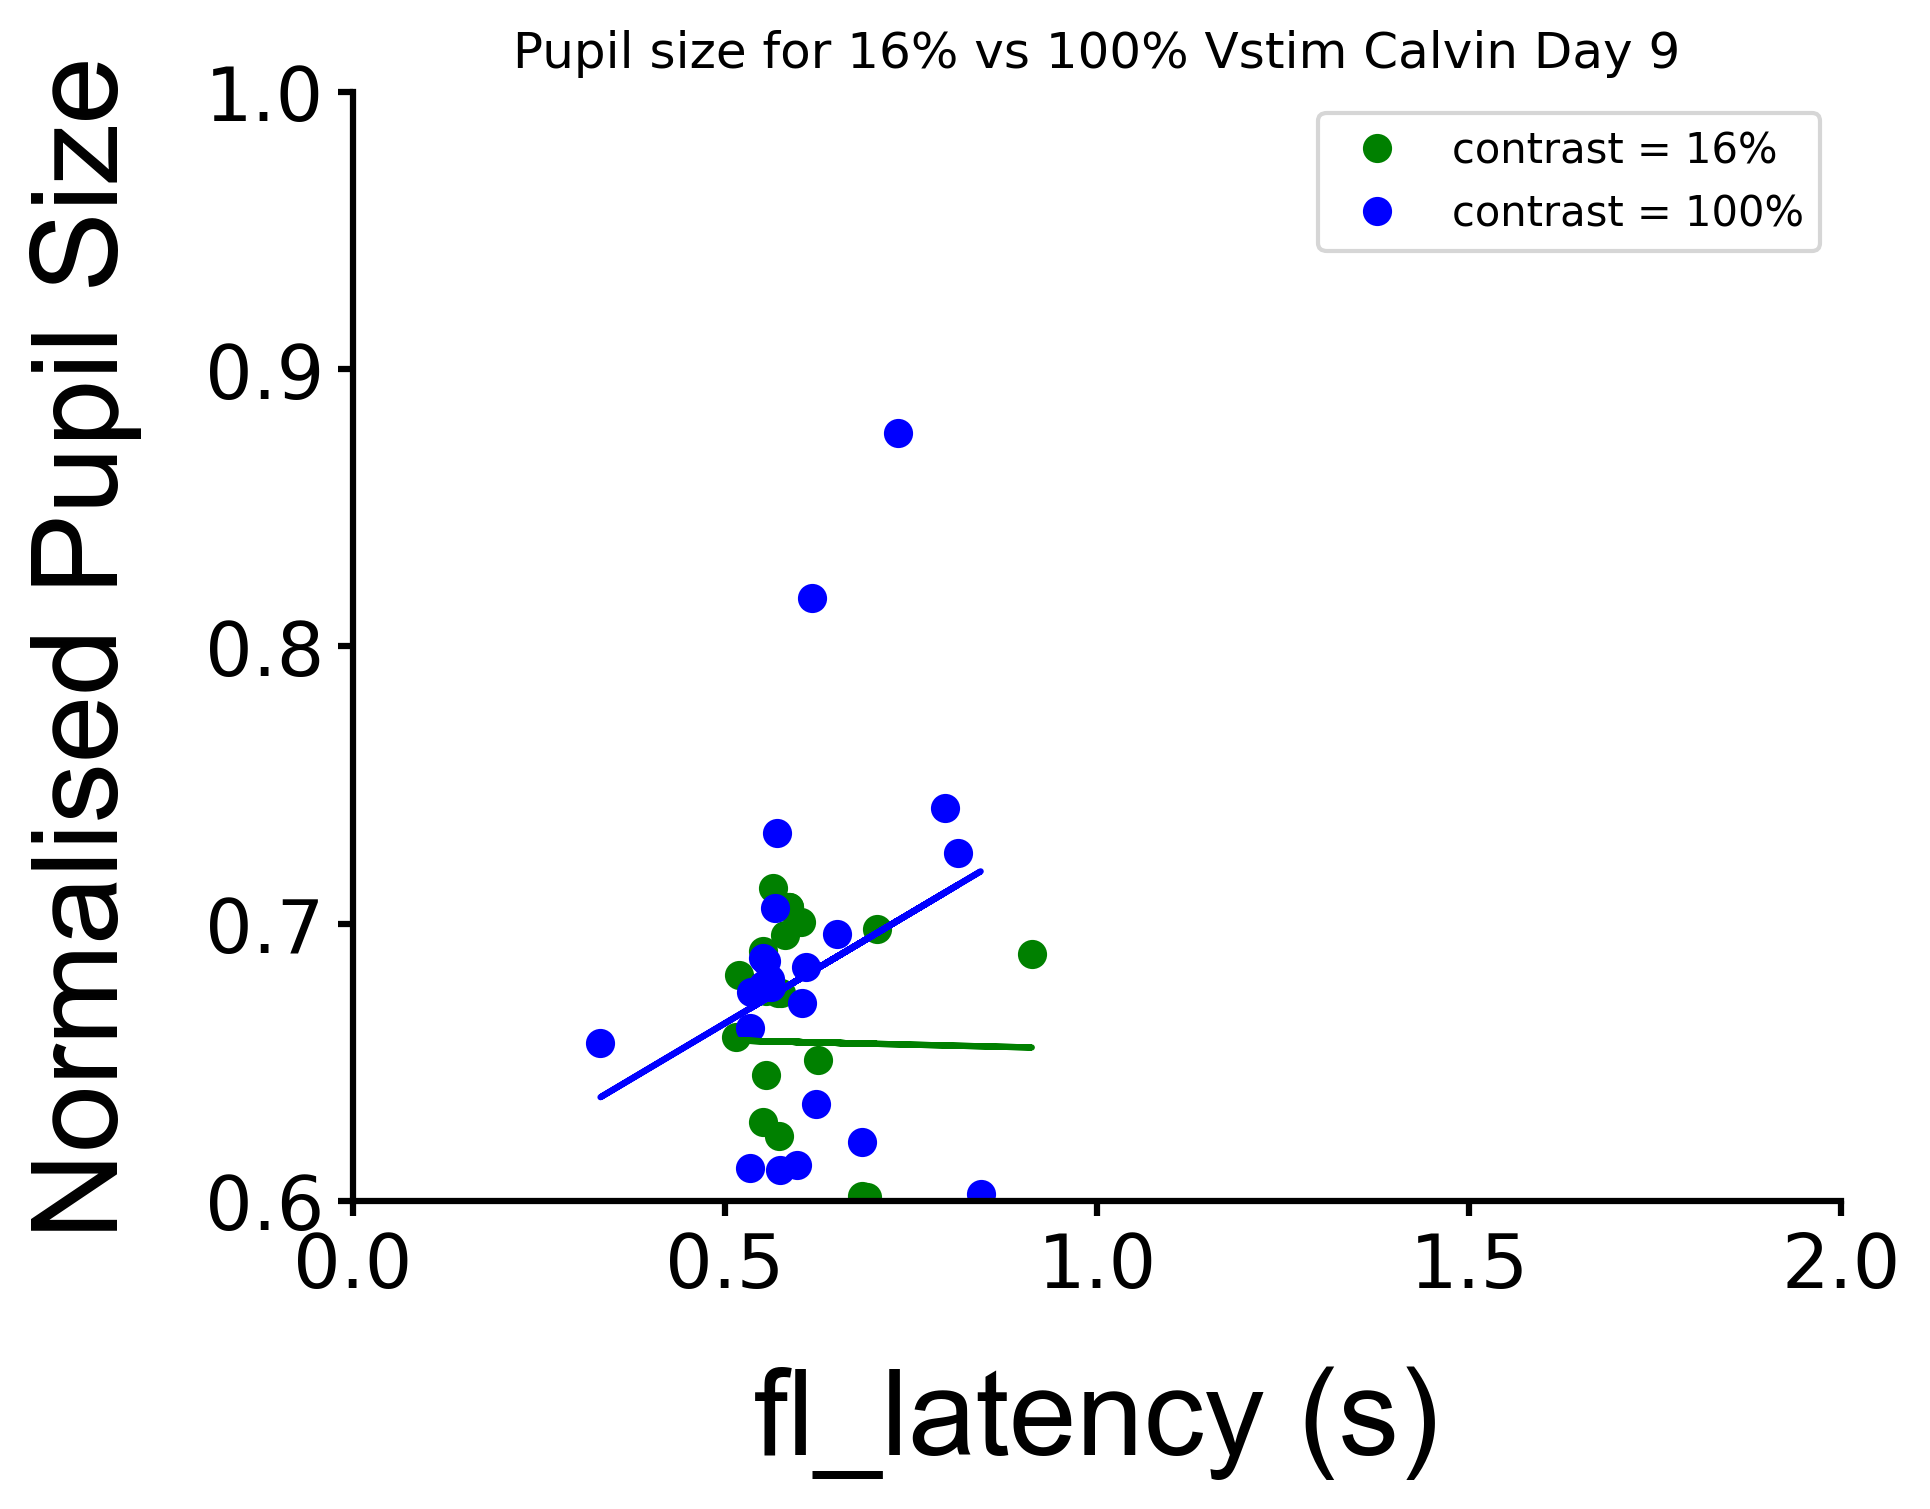

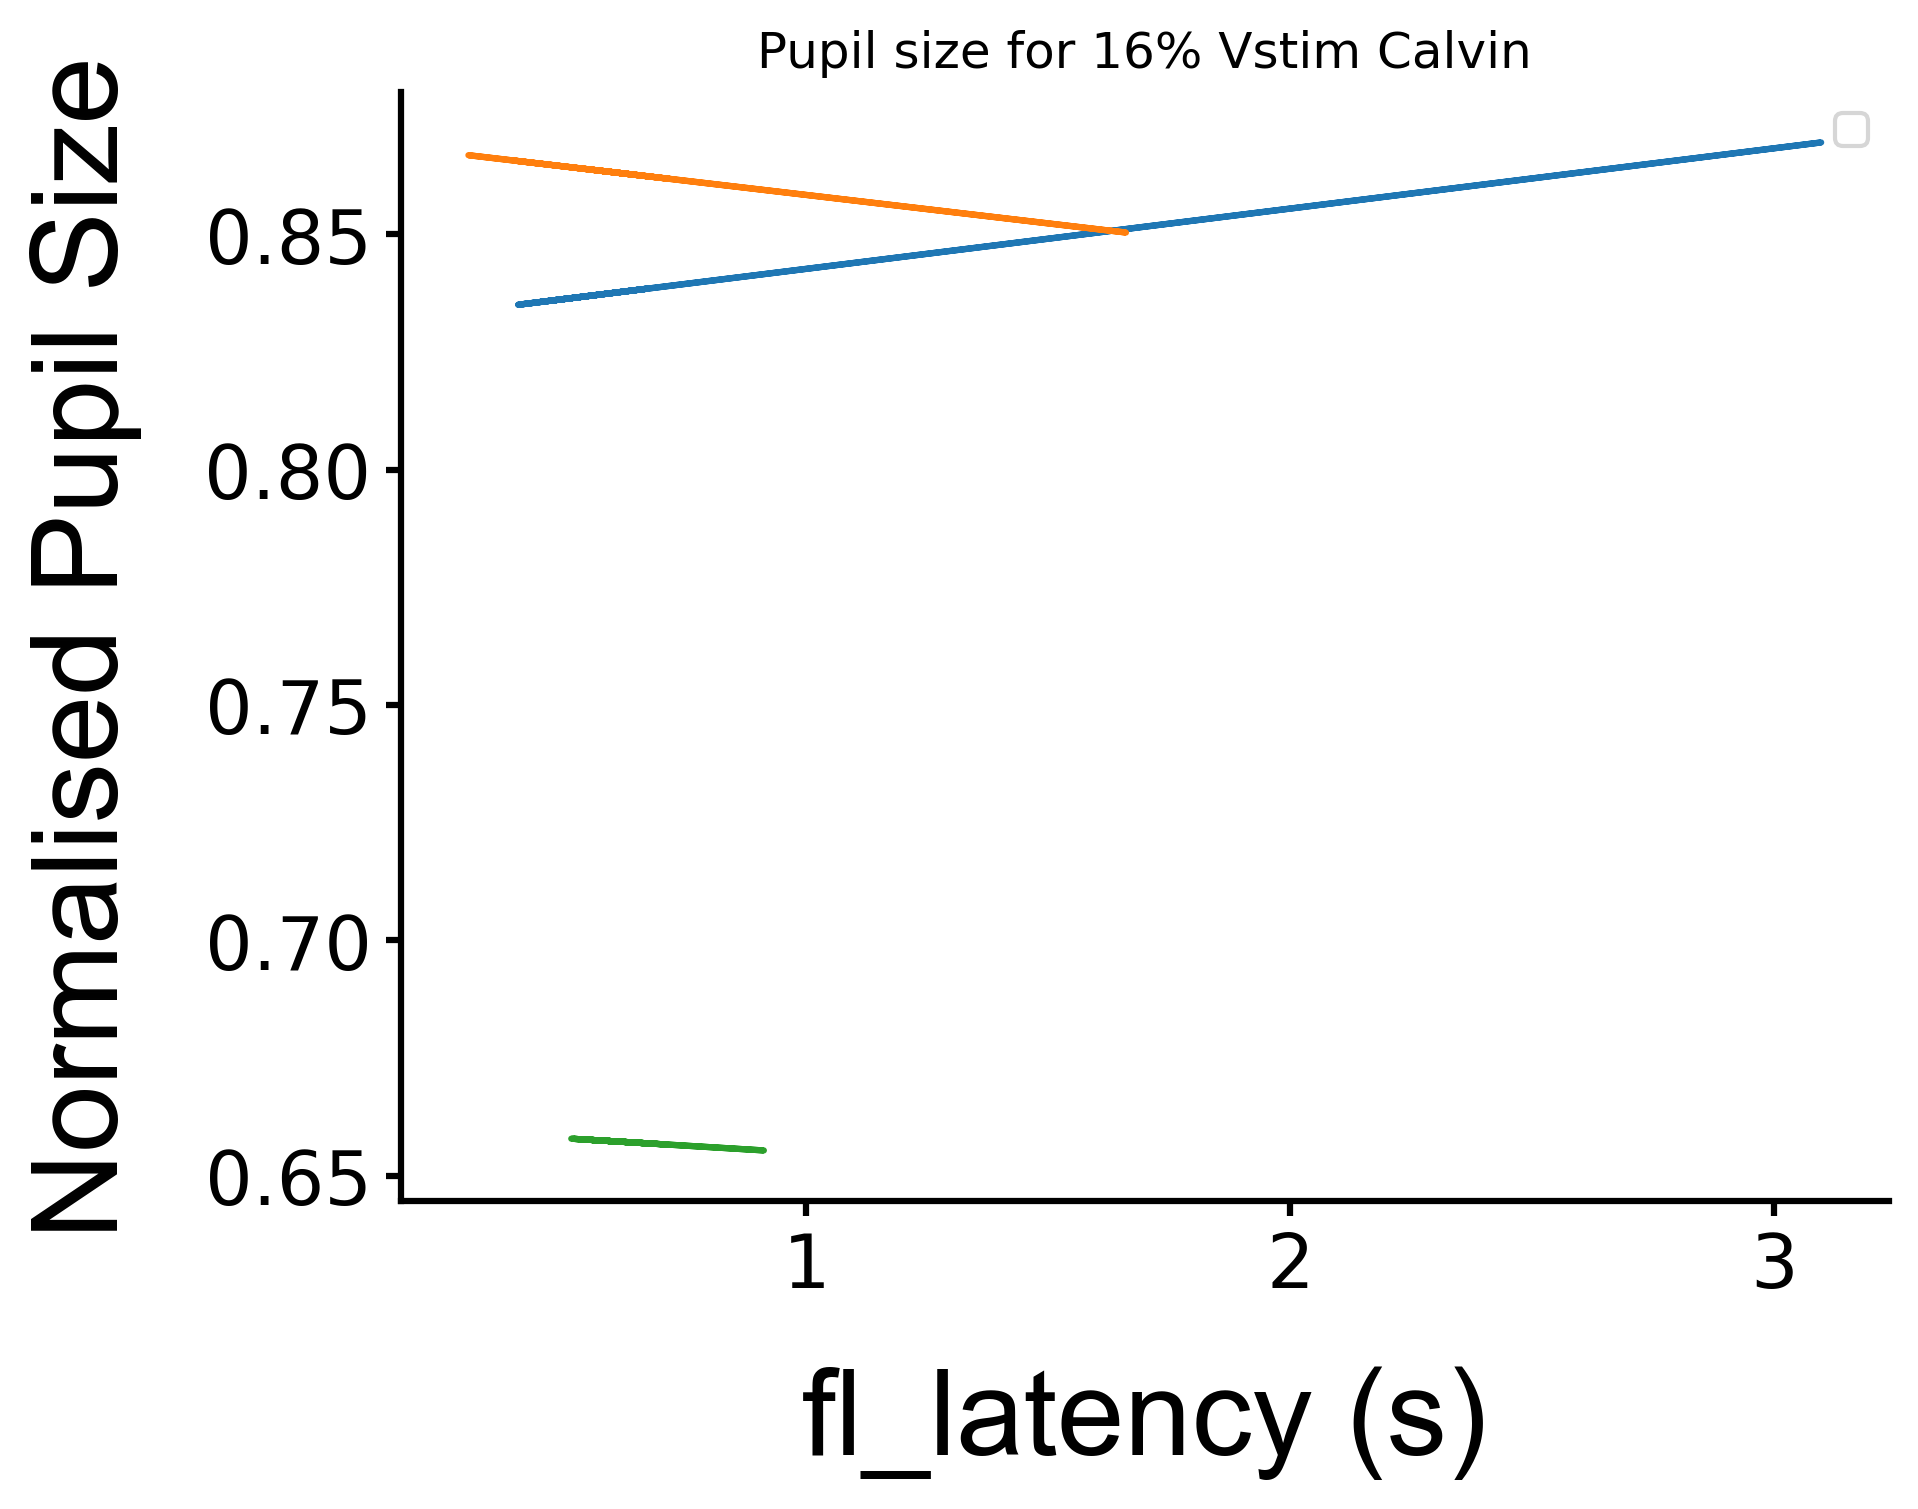

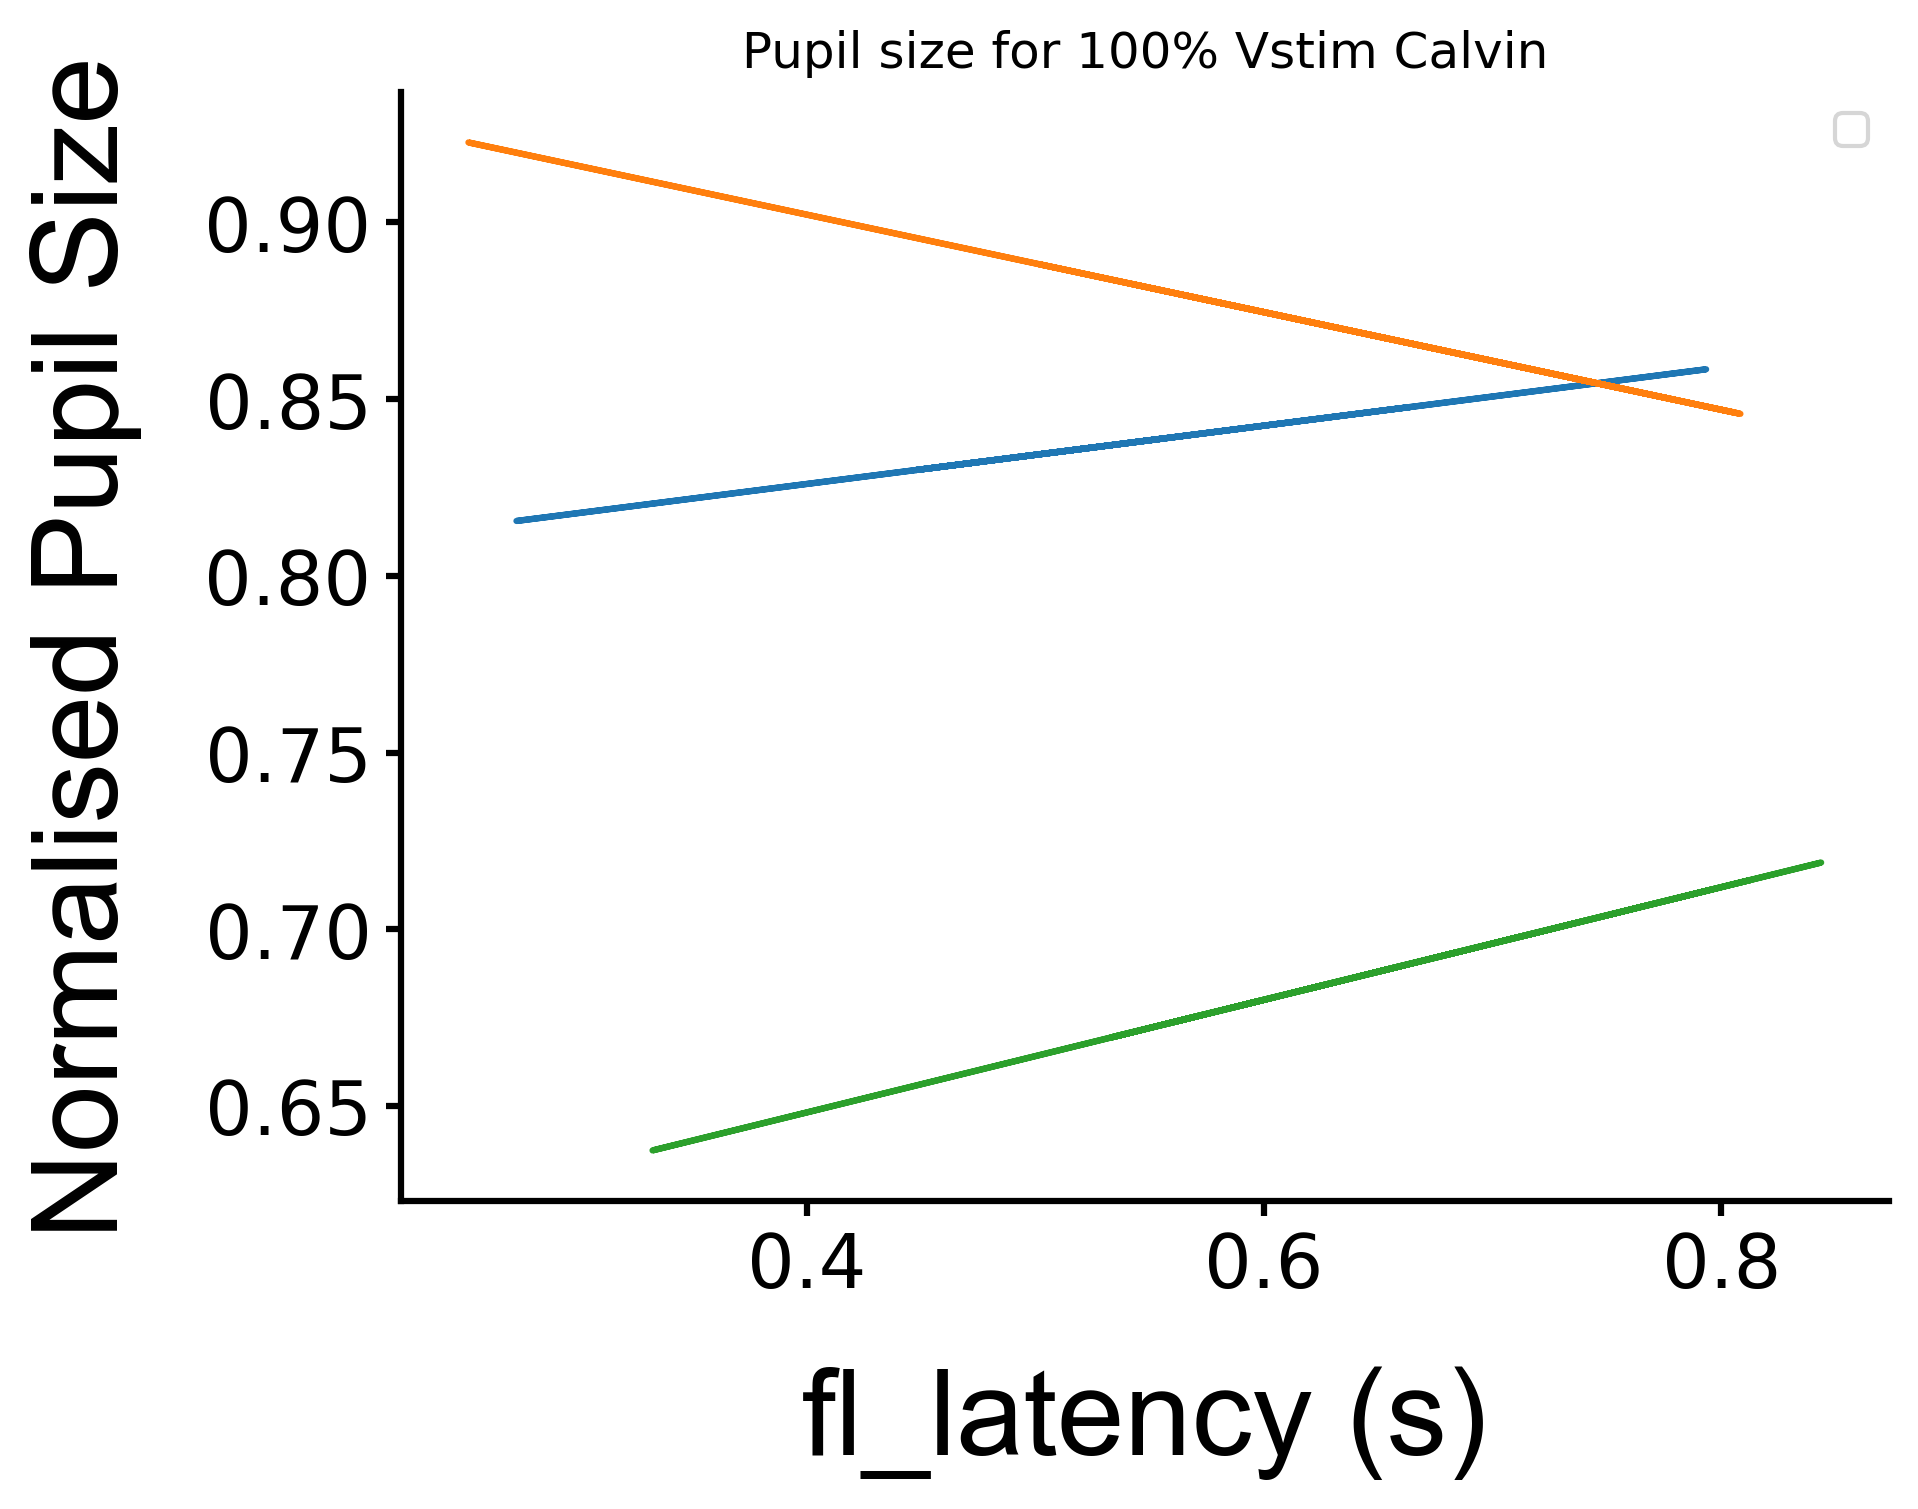

In [143]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# # Directory where CSV files are located
# name = 'Cole'
# day = 12
# date = '06052024'
# axi = 'y'


time_before_change = 0.5
duration = 1.5

bin_size = 0.1
time_bins = np.arange(0 - time_before_change, 1.1, bin_size)

individual_coeff_low = []
individual_coeff_high = []

individual_low_fl = []
individual_high_fl = []

individual_pupil_low_fit = []
individual_pupil_high_fit = []

for day, date, axi in zip(days, dates, axis):

    fig, ax = plt.subplots(dpi=300)

    directory = f'/Users/zhangpan/MasterProject/{name}/New_Pupil'
    filename_pupil = f'New_Pupil_Data_{date}_Day{day}_{name}.csv'
    file_path = os.path.join(directory, filename_pupil)

    # Read CSV file
    df_pupil = pd.read_csv(file_path)
    df_pupil['x'] = df_pupil['x'] / 100
    df_pupil['y'] = df_pupil['y'] / 100

    # Store DataFrame in the dictionary with the day as the key
    dfs = {}
    dfs[day] = df_pupil

    if name == 'Cole':
        if day == 9:
            df_pupil = df_pupil[df_pupil['x'] >= 1.3]

        elif day == 10:
            ranges = [(1053.1, 1053.4)]
            for start, end in ranges:
                mask = (df_pupil['timestamp'] >= start) & (df_pupil['timestamp'] <= end)
                df_pupil.loc[mask, 'x'] = np.nan
                df_pupil.loc[mask, 'y'] = np.nan
            df_pupil = df_pupil.dropna(subset=['x'])

        elif day == 12:
            ranges = [
                (79.7, 79.9),
                (410.89, 411.1),
                (338.4, 338.5),
                (1029.2, 1029.6),
                (1487.5, 1487.9)
            ]
            for start, end in ranges:
                mask = (df_pupil['timestamp'] >= start) & (df_pupil['timestamp'] <= end)
                df_pupil.loc[mask, 'x'] = np.nan
                df_pupil.loc[mask, 'y'] = np.nan
            df_pupil = df_pupil.dropna(subset=['x'])

    # df_pupil['fl_latency'] = df_pupil['fl_latency'] + 0.25

    directory = f'/Users/zhangpan/MasterProject/{name}/New_Trial_Table'
    filename_vstim = f'New_trial_table_Day{day}_{date}_{name}.csv'
    file_path = os.path.join(directory, filename_vstim)
    df = pd.read_csv(file_path)
    day = int(day)


    low_df = df[(df['stim_contrast'] == 0.16) & (df['hit'] == 1)].reset_index(drop=True)
    high_df = df[(df['stim_contrast'] == 1) & (df['hit'] == 1)].reset_index(drop=True)

    # Drop the row with the maximum fl_latency value for low and high contrast
    max_fl_index_low = low_df['fl_latency'].idxmax()
    low_df = low_df.drop(max_fl_index_low)
    low_fl = low_df['fl_latency'] + 0.25

    max_fl_index_high = high_df['fl_latency'].idxmax()
    high_df = high_df.drop(max_fl_index_high)
    high_fl = high_df['fl_latency'] + 0.25


    start_times_low = low_df['stim_start_time'] - time_before_change
    end_times_low = start_times_low + duration

    start_times_high = high_df['stim_start_time'] - time_before_change
    end_times_high = start_times_high + duration

    # Align pupil to trial time
    interpolated_pupil_data_low = []
    interpolated_pupil_data_high = []

    # Low contrast
    for start_time, end_time in zip(start_times_low, end_times_low):
        mask = (df_pupil['timestamp'] >= start_time) & (df_pupil['timestamp'] <= end_time)
        filtered_rows = df_pupil.loc[mask].copy()
        filtered_rows['timestamp_diff'] = filtered_rows['timestamp'] - start_time
        filtered_rows['Time from Change'] = filtered_rows['timestamp_diff'] - time_before_change

        if not filtered_rows[axi].empty:
            interpolated_values_low = np.interp(time_bins, filtered_rows['Time from Change'], filtered_rows[axi])
            interpolated_pupil_data_low.append(interpolated_values_low)

    # High contrast
    for start_time, end_time in zip(start_times_high, end_times_high):
        mask = (df_pupil['timestamp'] >= start_time) & (df_pupil['timestamp'] <= end_time)
        filtered_rows = df_pupil.loc[mask].copy()
        filtered_rows['timestamp_diff'] = filtered_rows['timestamp'] - start_time
        filtered_rows['Time from Change'] = filtered_rows['timestamp_diff'] - time_before_change

        if not filtered_rows[axi].empty:
            interpolated_values_high = np.interp(time_bins, filtered_rows['Time from Change'], filtered_rows[axi])
            interpolated_pupil_data_high.append(interpolated_values_high)

    interpolated_pupil_data_low = np.array(interpolated_pupil_data_low)
    interpolated_pupil_data_high = np.array(interpolated_pupil_data_high)

    # Apply normalization
    max_val_low = np.max(interpolated_pupil_data_low)
    max_val_high = np.max(interpolated_pupil_data_high)
    if max_val_low > max_val_high:
        normalized_interpolated_data_low = interpolated_pupil_data_low / max_val_low
        normalized_interpolated_data_high = interpolated_pupil_data_high / max_val_low
    else:
        normalized_interpolated_data_low = interpolated_pupil_data_low / max_val_high
        normalized_interpolated_data_high = interpolated_pupil_data_high / max_val_high

    mean_pupil_low = [np.mean(trial[:5]) for trial in normalized_interpolated_data_low]
    mean_pupil_high = [np.mean(trial[:5]) for trial in normalized_interpolated_data_high]

    mean_pupil_low = np.array(mean_pupil_low)
    mean_pupil_high = np.array(mean_pupil_high)

    # Check minimum length
    min_length_low = min(len(low_fl), len(mean_pupil_low))
    min_length_high = min(len(high_fl), len(mean_pupil_high))

    low_fl = low_fl[:min_length_low]
    mean_pupil_low = mean_pupil_low[:min_length_low]

    high_fl = high_fl[:min_length_high]
    mean_pupil_high = mean_pupil_high[:min_length_high]


    ax.plot(low_fl, mean_pupil_low, 'o', color='green', label=f'contrast = 16%')
    ax.plot(high_fl, mean_pupil_high, 'o', color='blue', label=f'contrast = 100%')

    # Fit a line to the data and plot the best fit line
    if len(low_fl) > 1 and len(mean_pupil_low) > 1:
        coeffs_low = np.polyfit(low_fl, mean_pupil_low, 1)
        poly_low = np.poly1d(coeffs_low)
        ax.plot(low_fl, poly_low(low_fl), linestyle='-', color='green')
        k_low = coeffs_low[0]
        print(f'Coefficients of the best fit line for low contrast {name} Day {day}: {k_low}')

        low_fl = np.array(low_fl)
        # print(f'16% {name} {day} low_fl is {low_fl}')
        # print(f'16% {name} {day} best fit is {poly_low(low_fl)}')

    if len(high_fl) > 1 and len(mean_pupil_high) > 1:
        coeffs_high = np.polyfit(high_fl, mean_pupil_high, 1)
        poly_high = np.poly1d(coeffs_high)
        ax.plot(high_fl, poly_high(high_fl), linestyle='-', color='blue')
        k_high = coeffs_high[0]
        print(f'Coefficients of the best fit line for high contrast {name} Day {day}: {k_high}')

        high_fl = np.array(high_fl)
        # print(f'16% {name} {day} high_fl is {high_fl}')
        # print(f'16% {name} {day} best fit is {poly_low(high_fl)}')

    individual_low_fl.append(low_fl)
    individual_high_fl.append(high_fl)

    individual_pupil_low_fit.append(poly_low(low_fl))
    individual_pupil_high_fit.append(poly_high(high_fl))

    individual_coeff_low.append(k_low)
    individual_coeff_high.append(k_high)

    ax.set_xlim(0, 2)
    ax.set_ylim(0.6, 1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.set_title(f'Pupil size for 16% vs 100% Vstim {name} Day {day}')
    ax.set_ylabel('Normalised Pupil Size', labelpad=15, size=29, family='Arial')
    ax.set_xlabel('fl_latency (s)', labelpad=15, size=29, family='Arial')
    ax.tick_params(axis='x', labelsize=18, width=1.5)
    ax.tick_params(axis='y', labelsize=18, width=1.5)
    ax.legend()


# coeff of 16% and 100% over 3 sessions
individual_coeff_low = np.array(individual_coeff_low)
individual_coeff_high = np.array(individual_coeff_high)

# mean coeff in single animal
individual_mean_coeff_low = np.mean(individual_coeff_low)
individual_mean_coeff_high = np.mean(individual_coeff_high)

print(f'{name} mean_coeff_low is {individual_mean_coeff_low}')
print(f'{name} mean_coeff_high is {individual_mean_coeff_high}')

# Plot pupil vs fl in low and high in one mouse
fig, ax1 = plt.subplots(dpi=300)
fig, ax2 = plt.subplots(dpi=300)

individual_low_fl = np.array(individual_low_fl)
individual_high_fl = np.array(individual_high_fl)

individual_pupil_low_fit = np.array(individual_pupil_low_fit)
individual_pupil_high_fit = np.array(individual_pupil_high_fit)

for fl, pupil in zip(individual_low_fl, individual_pupil_low_fit):
    ax1.plot(fl, pupil,'-')

for fl, pupil in zip(individual_high_fl, individual_pupil_high_fit):
    ax2.plot(fl, pupil,'-')

# ax1.set_xlim(0, 2)
# ax1.set_ylim(0.6, 1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_linewidth(1.5)
ax1.spines['left'].set_linewidth(1.5)
ax1.set_title(f'Pupil size for 16% Vstim {name}')
ax1.set_ylabel('Normalised Pupil Size', labelpad=15, size=29, family='Arial')
ax1.set_xlabel('fl_latency (s)', labelpad=15, size=29, family='Arial')
ax1.tick_params(axis='x', labelsize=18, width=1.5)
ax1.tick_params(axis='y', labelsize=18, width=1.5)
ax1.legend()

# ax2.set_xlim(0, 2)
# ax2.set_ylim(0.6, 1)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_linewidth(1.5)
ax2.spines['left'].set_linewidth(1.5)
ax2.set_title(f'Pupil size for 100% Vstim {name}')
ax2.set_ylabel('Normalised Pupil Size', labelpad=15, size=29, family='Arial')
ax2.set_xlabel('fl_latency (s)', labelpad=15, size=29, family='Arial')
ax2.tick_params(axis='x', labelsize=18, width=1.5)
ax2.tick_params(axis='y', labelsize=18, width=1.5)
ax2.legend()

73
85
Cole low slope is 1.0766216871556424
Cole high slope is 0.01972713889363508


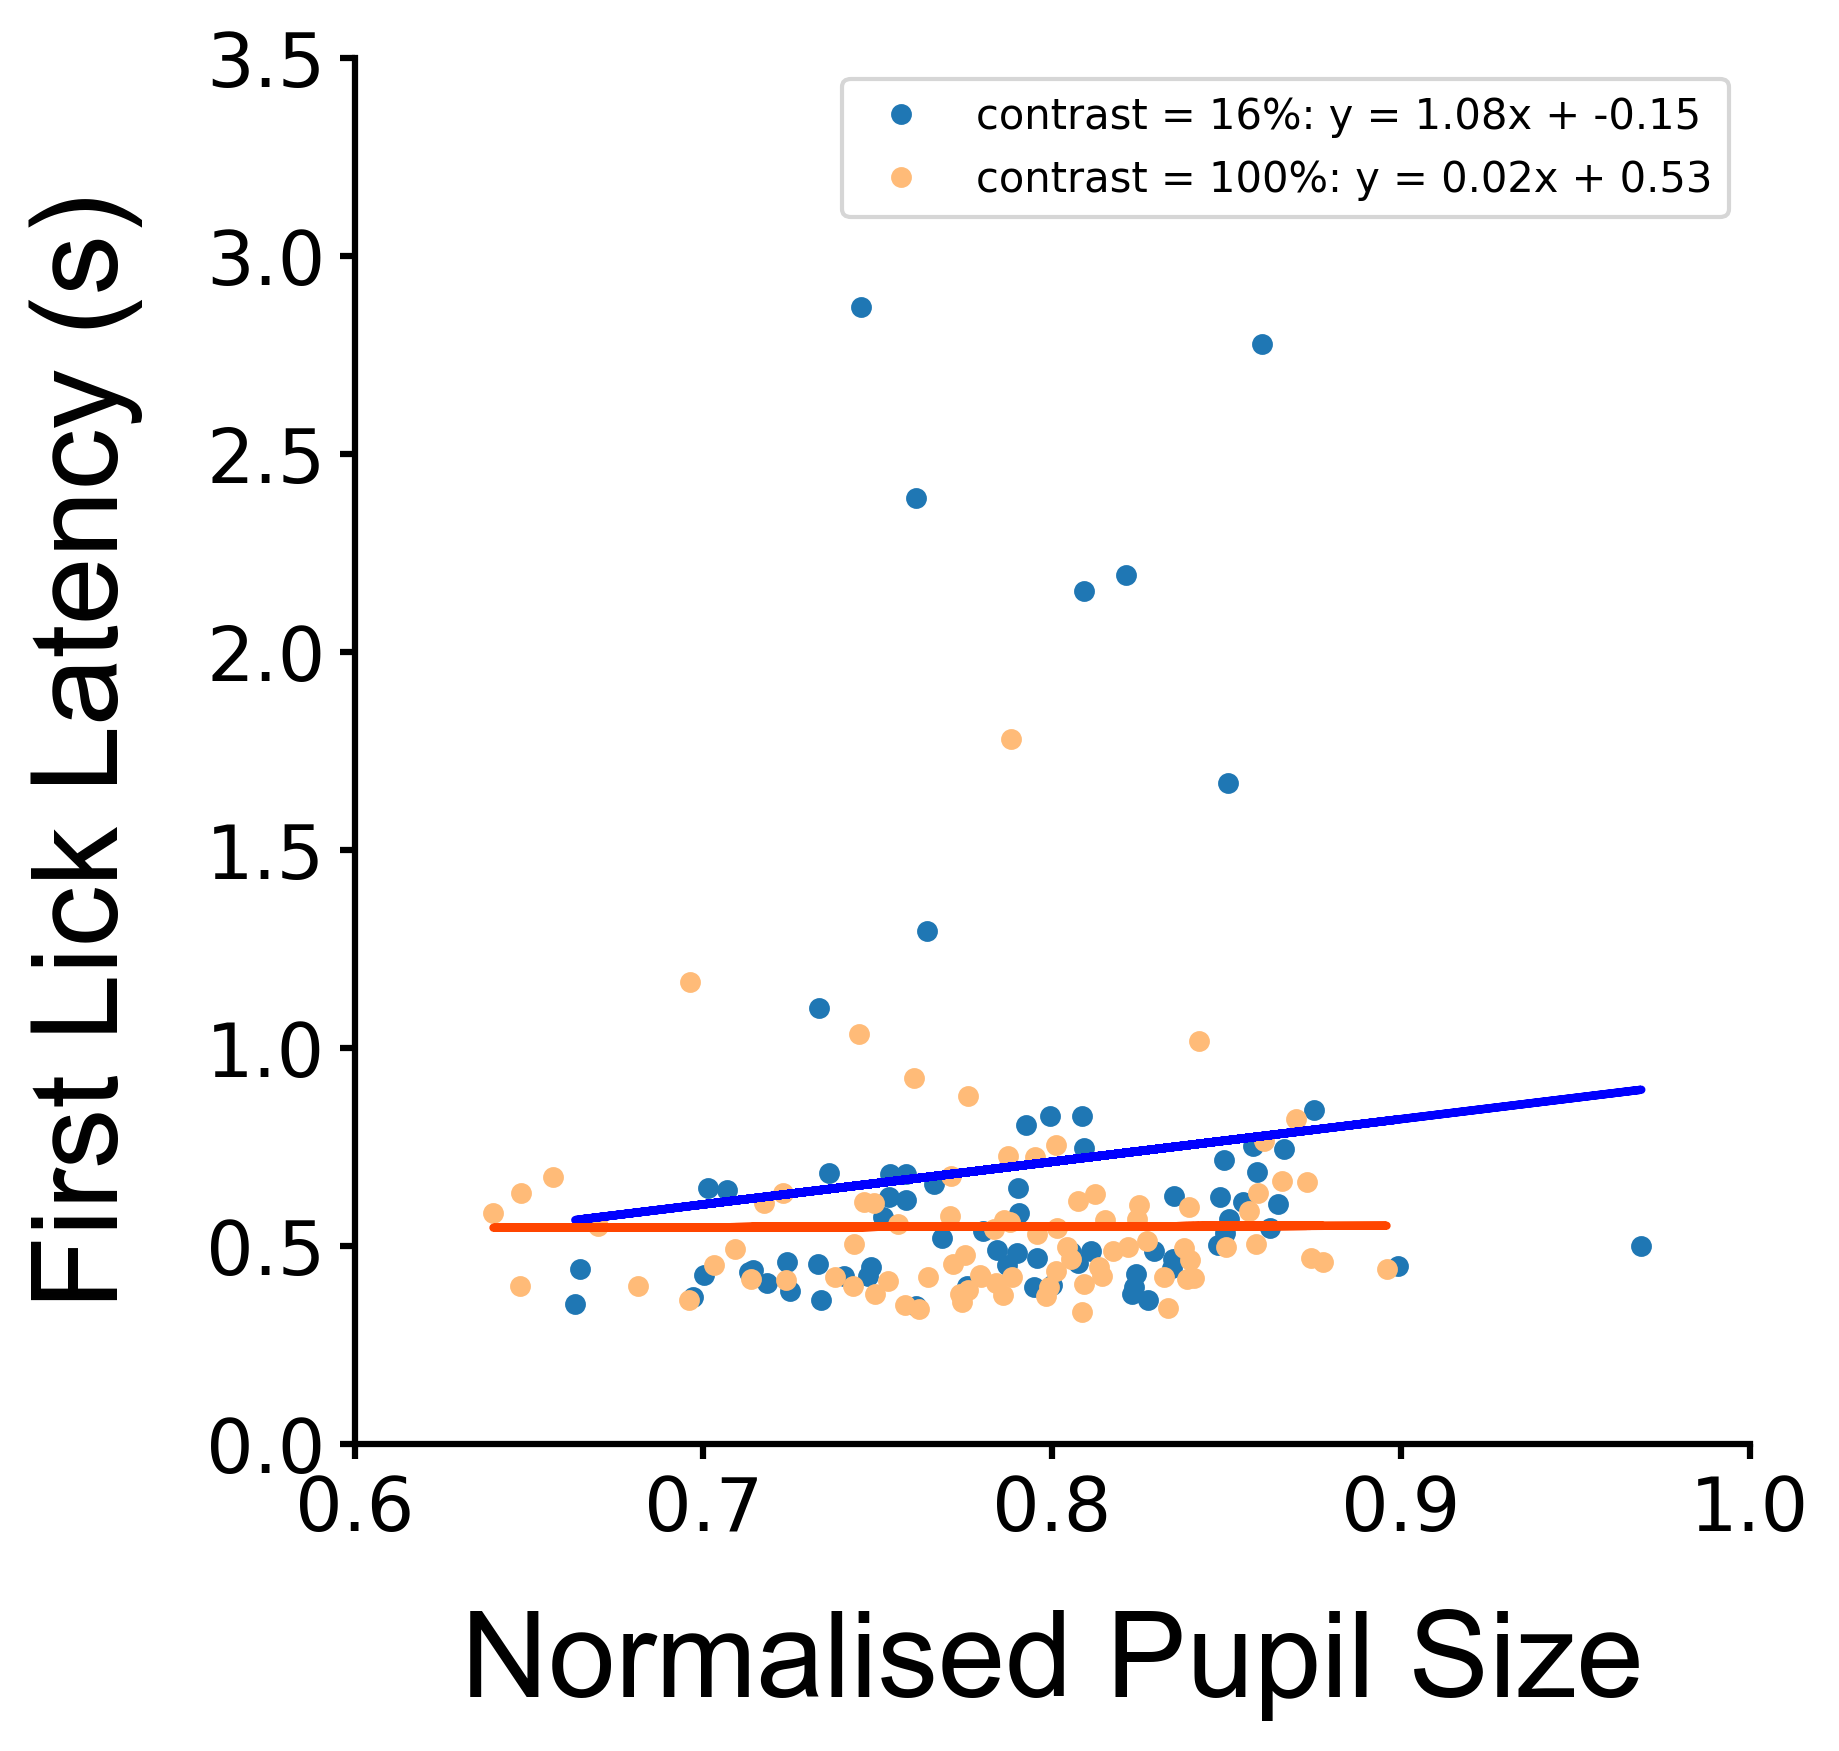

In [20]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


time_before_change = 0.5
duration = 1.5

bin_size = 0.1
time_bins = np.arange(0 - time_before_change, 1.1, bin_size)

individual_low_fl = []
individual_high_fl = []
individual_low_pupil = []
individual_high_pupil = []

for day, date, axi in zip(days, dates, axis):
    directory = f'/Users/zhangpan/MasterProject/{name}/New_Pupil'
    filename_pupil = f'New_Pupil_Data_{date}_Day{day}_{name}.csv'
    file_path = os.path.join(directory, filename_pupil)

    # Read CSV file
    df_pupil = pd.read_csv(file_path)
    df_pupil['x'] = df_pupil['x'] / 100
    df_pupil['y'] = df_pupil['y'] / 100

    if name == 'Cole':
        if day == 9:
            df_pupil = df_pupil[df_pupil['x'] >= 1.3]
        elif day == 10:
            ranges = [(1053.1, 1053.4)]
            for start, end in ranges:
                mask = (df_pupil['timestamp'] >= start) & (df_pupil['timestamp'] <= end)
                df_pupil.loc[mask, 'x'] = np.nan
                df_pupil.loc[mask, 'y'] = np.nan
            df_pupil = df_pupil.dropna(subset=['x'])
        elif day == 12:
            ranges = [
                (79.7, 79.9),
                (410.89, 411.1),
                (338.4, 338.5),
                (1029.2, 1029.6),
                (1487.5, 1487.9)
            ]
            for start, end in ranges:
                mask = (df_pupil['timestamp'] >= start) & (df_pupil['timestamp'] <= end)
                df_pupil.loc[mask, 'x'] = np.nan
                df_pupil.loc[mask, 'y'] = np.nan
            df_pupil = df_pupil.dropna(subset=['x'])

    directory = f'/Users/zhangpan/MasterProject/{name}/New_Trial_Table'
    filename_vstim = f'New_trial_table_Day{day}_{date}_{name}.csv'
    file_path = os.path.join(directory, filename_vstim)
    df = pd.read_csv(file_path)
    day = int(day)

    low_df = df[(df['stim_contrast'] == 0.16) & (df['hit'] == 1)].reset_index(drop=True)
    high_df = df[(df['stim_contrast'] == 1) & (df['hit'] == 1)].reset_index(drop=True)

    low_fl = low_df['fl_latency'] + 0.25
    high_fl = high_df['fl_latency'] + 0.25

    start_times_low = low_df['stim_start_time'] - time_before_change
    end_times_low = start_times_low + duration

    start_times_high = high_df['stim_start_time'] - time_before_change
    end_times_high = start_times_high + duration

    # Align pupil to trial time
    interpolated_pupil_data_low = []
    interpolated_pupil_data_high = []

    # Low contrast
    for start_time, end_time in zip(start_times_low, end_times_low):
        mask = (df_pupil['timestamp'] >= start_time) & (df_pupil['timestamp'] <= end_time)
        filtered_rows = df_pupil.loc[mask].copy()
        filtered_rows['timestamp_diff'] = filtered_rows['timestamp'] - start_time
        filtered_rows['Time from Change'] = filtered_rows['timestamp_diff'] - time_before_change

        if not filtered_rows[axi].empty:
            interpolated_values_low = np.interp(time_bins, filtered_rows['Time from Change'], filtered_rows[axi])
            interpolated_pupil_data_low.append(interpolated_values_low)

    # High contrast
    for start_time, end_time in zip(start_times_high, end_times_high):
        mask = (df_pupil['timestamp'] >= start_time) & (df_pupil['timestamp'] <= end_time)
        filtered_rows = df_pupil.loc[mask].copy()
        filtered_rows['timestamp_diff'] = filtered_rows['timestamp'] - start_time
        filtered_rows['Time from Change'] = filtered_rows['timestamp_diff'] - time_before_change

        if not filtered_rows[axi].empty:
            interpolated_values_high = np.interp(time_bins, filtered_rows['Time from Change'], filtered_rows[axi])
            interpolated_pupil_data_high.append(interpolated_values_high)

    interpolated_pupil_data_low = np.array(interpolated_pupil_data_low)
    interpolated_pupil_data_high = np.array(interpolated_pupil_data_high)

    # Apply normalization
    max_val_low = np.max(interpolated_pupil_data_low)
    max_val_high = np.max(interpolated_pupil_data_high)
    if max_val_low > max_val_high:
        normalized_interpolated_data_low = interpolated_pupil_data_low / max_val_low
        normalized_interpolated_data_high = interpolated_pupil_data_high / max_val_low
    else:
        normalized_interpolated_data_low = interpolated_pupil_data_low / max_val_high
        normalized_interpolated_data_high = interpolated_pupil_data_high / max_val_high

    mean_pupil_low = [np.mean(trial[:5]) for trial in normalized_interpolated_data_low]
    mean_pupil_high = [np.mean(trial[:5]) for trial in normalized_interpolated_data_high]

    # mean spontaneous pupil size over sessions
    mean_pupil_low = np.array(mean_pupil_low)
    mean_pupil_high = np.array(mean_pupil_high)

    # Check minimum length
    min_length_low = min(len(low_fl), len(mean_pupil_low))
    min_length_high = min(len(high_fl), len(mean_pupil_high))

    low_fl = low_fl[:min_length_low]
    mean_pupil_low = mean_pupil_low[:min_length_low]

    high_fl = high_fl[:min_length_high]
    mean_pupil_high = mean_pupil_high[:min_length_high]

    individual_low_fl.append(low_fl)
    individual_high_fl.append(high_fl)

    individual_low_pupil.append(mean_pupil_low)
    individual_high_pupil.append(mean_pupil_high)

fig, ax = plt.subplots(dpi=300)
fig.set_size_inches(6, 6)

all_low_fl = np.concatenate(individual_low_fl)
all_low_pupil = np.concatenate(individual_low_pupil)
all_high_fl = np.concatenate(individual_high_fl)
all_high_pupil = np.concatenate(individual_high_pupil)

# Plot data points
ax.plot(all_low_pupil, all_low_fl, 'o', color='#1f77b4', markersize=4, label='contrast = 16%')
ax.plot(all_high_pupil, all_high_fl, 'o', color='#ffbb78',markersize=4, label='contrast = 100%')

print(len(all_low_pupil))
print(len(all_high_pupil))

# Fit lines
low_fit = np.polyfit(all_low_pupil, all_low_fl, 1)
high_fit = np.polyfit(all_high_pupil, all_high_fl, 1)

# Plot fit lines
ax.plot(all_low_pupil, np.polyval(low_fit, all_low_pupil), color='blue', linewidth=2,  linestyle='-', label=f'contrast = 16% fit')
ax.plot(all_high_pupil, np.polyval(high_fit, all_high_pupil), color='#FF4500',linewidth=2,  linestyle='-', label=f'contrast = 100% fit')

# Legend with equations
low_eq = f'contrast = 16%: y = {low_fit[0]:.2f}x + {low_fit[1]:.2f}'
high_eq = f'contrast = 100%: y = {high_fit[0]:.2f}x + {high_fit[1]:.2f}'

# Set plot details
ax.set_xlim(0.6, 1)
ax.set_ylim(0, 3.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

# ax.set_title(f'Pupil size for 16% vs 100% Vstim {name}')
ax.set_xlabel('Normalised Pupil Size', labelpad=15, size=29, family='Arial')
ax.set_ylabel('First Lick Latency (s)', labelpad=15, size=29, family='Arial')
ax.tick_params(axis='x', labelsize=18, width=1.5)
ax.tick_params(axis='y', labelsize=18, width=1.5)

# Add legend
ax.legend([low_eq, high_eq], loc='best')

print(f'{name} low slope is {low_fit[0]}')
print(f'{name} high slope is {high_fit[0]}')

## Group coefficient

means_low: 0.7858907515671717
means_high: -0.09592676459772943
sem_low is 0.14432799811891311
sem_high is 0.047266843881508536


Text(0.05, 0.95, 'n = 3')

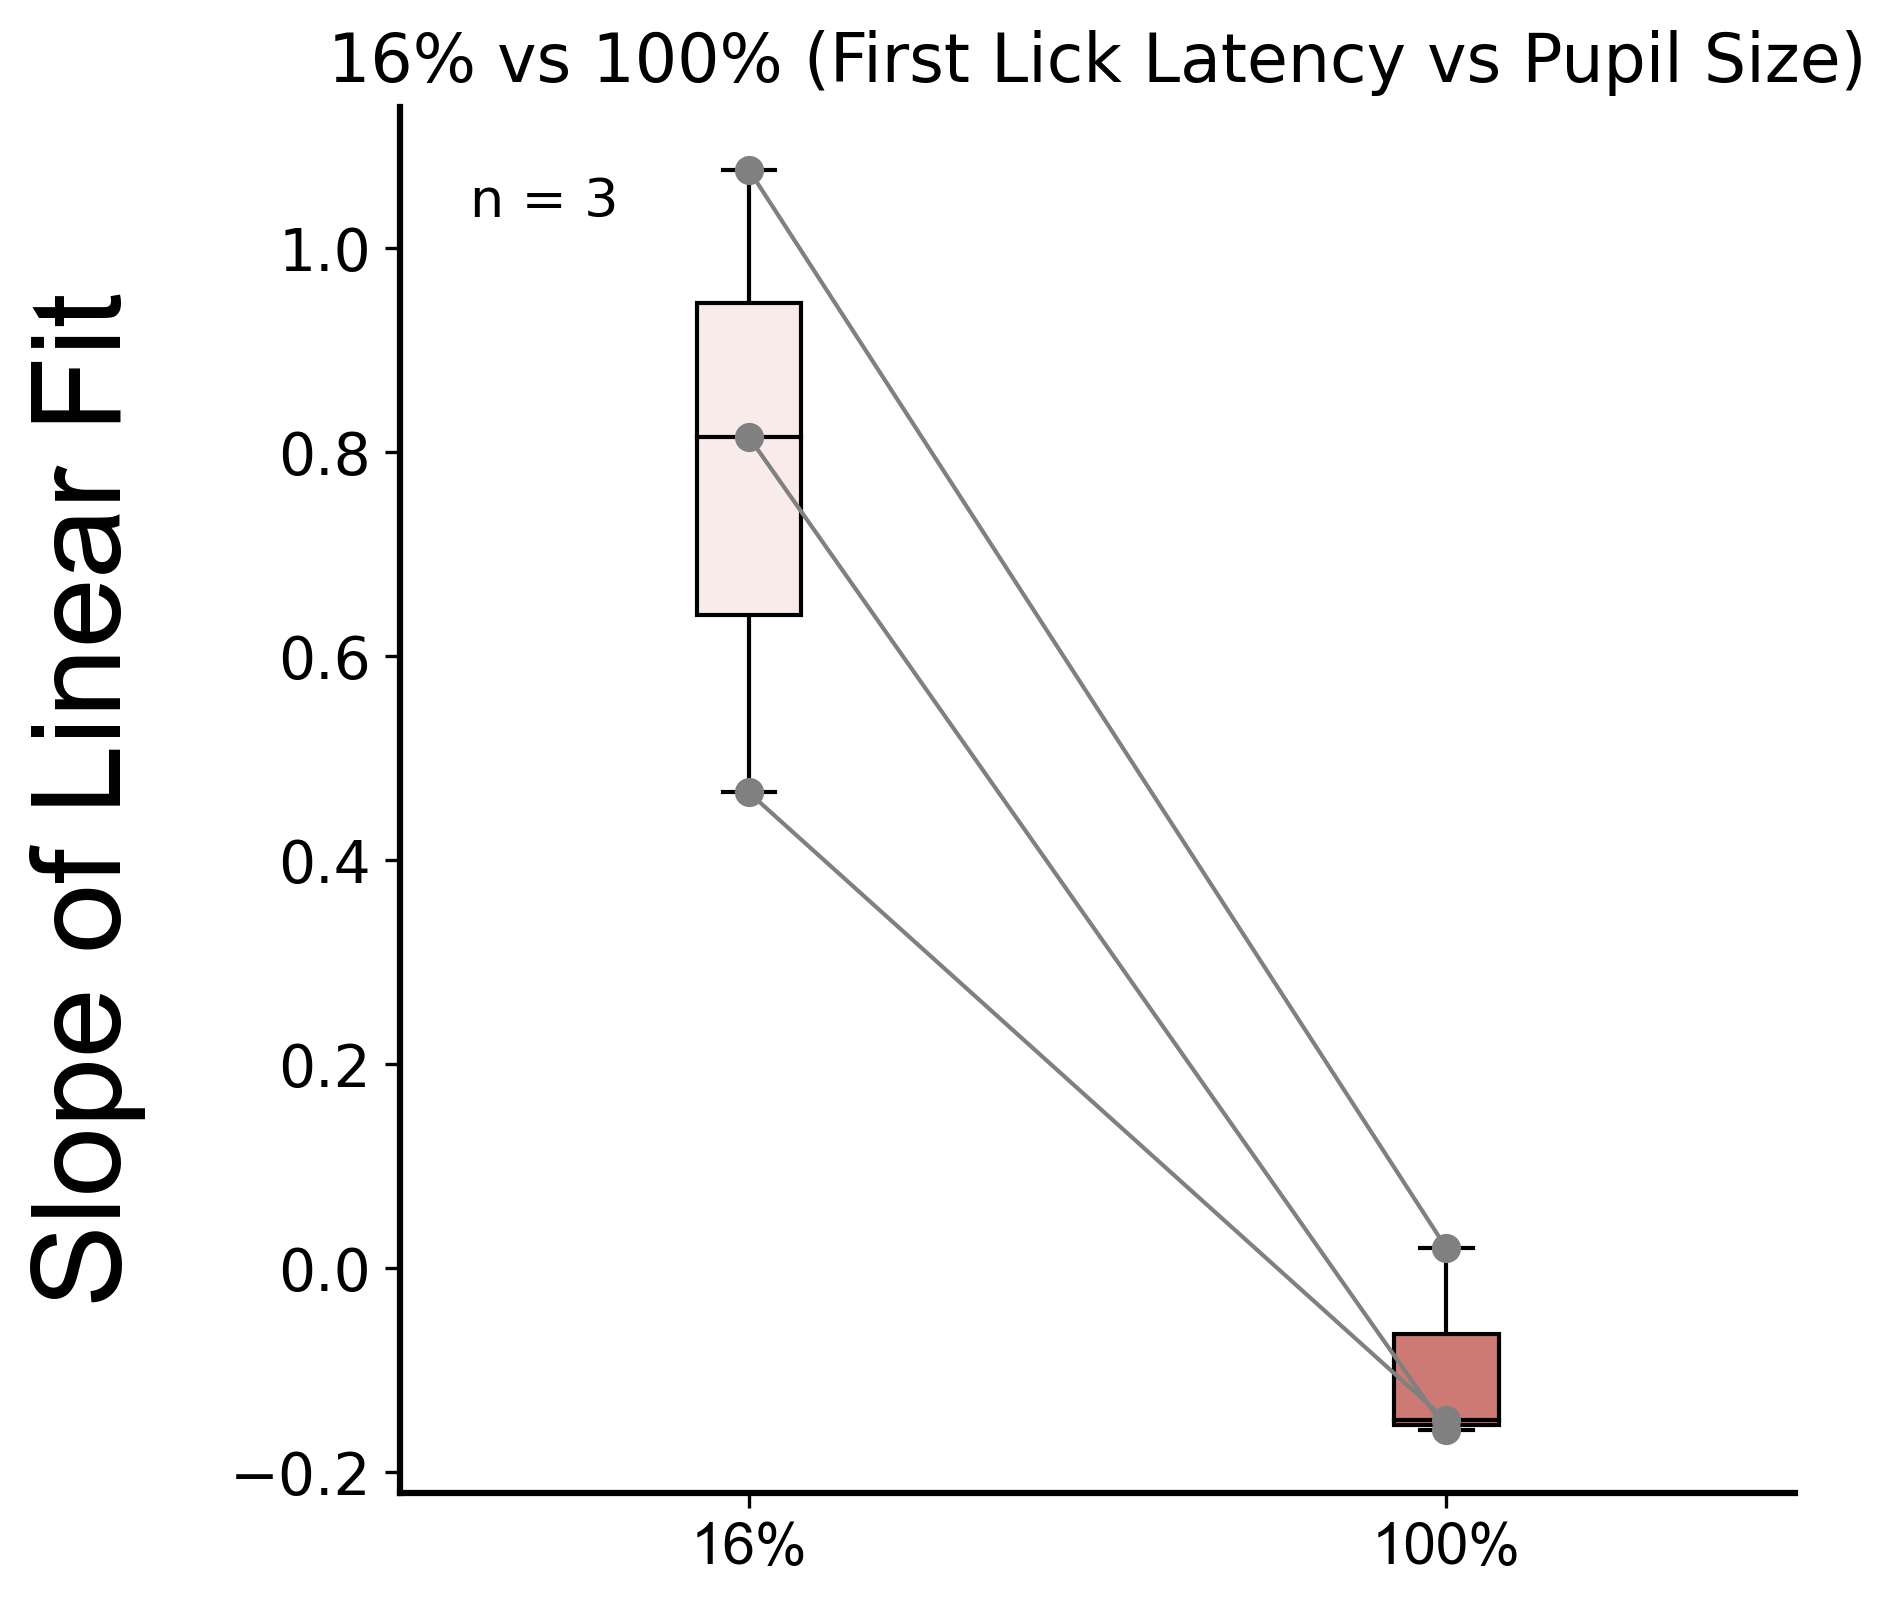

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Coefficient values
group_coeff_low = [1.0766216871556424, 0.8147211849975281,  0.4663293825483444]
group_coeff_high = [0.01972713889363508, -0.15842558350148225, -0.14908184918534115]

# Convert to numpy arrays for easier calculations
group_coeff_low = np.array(group_coeff_low)
group_coeff_high = np.array(group_coeff_high)

# Calculate mean and standard deviation
mean_low = np.mean(group_coeff_low, axis=0)
std_low = np.std(group_coeff_low, axis=0)

mean_high = np.mean(group_coeff_high, axis=0)
std_high = np.std(group_coeff_high, axis=0)

sem_low = std_low / np.sqrt(3)
sem_high = std_high / np.sqrt(3)


print(f'means_low: {mean_low}')
print(f'means_high: {mean_high}')

print(f'sem_low is {sem_low}')
print(f'sem_high is {sem_high}')

# Plotting
fig, ax = plt.subplots(dpi=300)
fig.set_size_inches(6, 6)

# Data for the bar chart
means = [mean_low, mean_high]
errors = [std_low, std_high]
positions = [1, 2]

# Data for the box plot
data = [group_coeff_low, group_coeff_high]
positions = [1, 2]

# Create box plot
bp = ax.boxplot(data, positions=positions,  medianprops=dict(color='black'), patch_artist=True, zorder=1)

# Set colors for the boxes
colors = ['#f9ebea','#cc7a73']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# ax.scatter([1]*len(group_coeff_low), group_coeff_low, color='grey', zorder=2, label='16%')
# ax.scatter([2]*len(group_coeff_high), group_coeff_high, color='grey', zorder=2, label='100%')

# Plot paired dots and connect them
for i, (before, after) in enumerate(zip(group_coeff_low, group_coeff_high)):
    ax.plot(positions, [before, after], marker='o', linestyle='-', color='gray', linewidth=1, zorder=2)

# Customize the plot
ax.set_title('16% vs 100% (First Lick Latency vs Pupil Size)', fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.set_xlabel('', labelpad=20, size=30, family='Arial')
ax.set_ylabel('Slope of Linear Fit', labelpad=20, size=30, family='Arial')

# Set x-ticks
# ax.set_ylim(0, 0.1)
ax.set_xticks(positions)
ax.set_xticklabels(['16%', '100%'], size=14, family='Arial')

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)  # Adjust the width as needed
ax.spines['left'].set_linewidth(1.5)

# Adding n=3 text
ax.text(0.05, 0.95, 'n = 3', fontsize=13, ha='left', va='top', transform=ax.transAxes)

In [12]:
from scipy.stats import wilcoxon

# Perform the Wilcoxon signed-rank test on the normalized data
stat, p_value = wilcoxon(group_coeff_low, group_coeff_high)

# Output the test result
print(f'Wilcoxon signed-rank test statistic: {stat}, p-value: {p_value}')

Wilcoxon signed-rank test statistic: 0.0, p-value: 0.25


In [13]:
from scipy.stats import mannwhitneyu

# Perform the Mann-Whitney U test
u_stat, p_value = mannwhitneyu(group_coeff_low, group_coeff_high)

print(f'U-statistic: {u_stat}')
print(f'P-value: {p_value}')

if p_value < 0.05:
    print('The two groups are significantly different.')
else:
    print('The two groups are not significantly different.')

U-statistic: 9.0
P-value: 0.1
The two groups are not significantly different.
